<a href="https://colab.research.google.com/github/muchlisam17/Machine-Learning-Task-TelU/blob/main/W2/Linear_Models_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

diambil dari https://scikit-learn.org/stable/modules/linear_model.html untuk latihan

#**1. Linear Model**

The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. In mathematical notation, if 
 is the predicted value.

Across the module, we designate the vector w = (w1, ... , wp) as coef_ and w0 as intercept_.

To perform classification with generalized linear models, see [Logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

#**1.1. Ordinary Least Squares**

[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) fits a linear model with coefficients w = (w1, ... , wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:
 
https://scikit-learn.org/stable/_images/sphx_glr_plot_ols_001.png

[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) will take in its fit method arrays X, y and will store the coefficients  of the linear model in its coef_ member:

In [1]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
#LinearRegression()
reg.coef_
#array([0.5, 0.5])

array([0.5, 0.5])

The coefficient estimates for Ordinary Least Squares rely on the independence of the features. When features are correlated and the columns of the design matrix **X** have an approximately linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed target, producing a large variance. This situation of multicollinearity can arise, for example, when data are collected without an experimental design.

**Example**

*   [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)


#Linear Regression Example

The example below uses only the first feature of the diabetes dataset, in order to illustrate the data points within the two-dimensional plot. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

The coefficients, residual sum of squares and the coefficient of determination are also calculated.

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


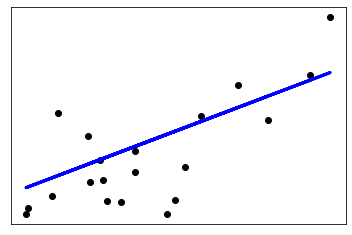

In [2]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

**Total running time of the script:** ( 0 minutes 0.069 seconds)

#**1.1.1. Non-Negative Least Squares**

It is possible to constrain all the coefficients to be non-negative, which may be useful when they represent some physical or naturally non-negative quantities (e.g., frequency counts or prices of goods). LinearRegression accepts a boolean positive parameter: when set to True Non-Negative Least Squares are then applied.

**Example**

*   [Non-Negative Least Squares](https://scikit-learn.org/stable/auto_examples/linear_model/plot_nnls.html#sphx-glr-auto-examples-linear-model-plot-nnls-py)



#Non-Negative Least Squares Example

In this example, we fit a linear model with positive constraints on the regression coefficients and compare the estimated coefficients to a classic linear regression.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Generate some random data

In [4]:
np.random.seed(42)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)

# Add some noise
y += 5 * np.random.normal(size=(n_samples,))

Split the data in train set and test set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Fit the Non-Negative least squares.

In [6]:
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.8225220806196525


Out:

NNLS R2 score 8.225220806196525e-01

Fit an OLS.

In [7]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.7436926291700348


Out:

OLS R2 score 0.7436926291700345

Comparing the regression coefficients between OLS and NNLS, we can observe they are highly correlated (the dashed line is the identity relation), but the non-negative constraint shrinks some to 0. The Non-Negative Least squares inherently yield sparse results.

Text(0, 0.5, 'NNLS regression coefficients')

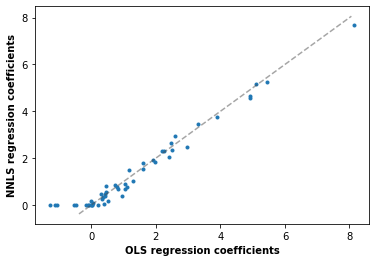

In [8]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

Out:

Text(55.847222222222214, 0.5, 'NNLS regression coefficients')

**Total running time of the script:** ( 0 minutes 0.125 seconds)

#**1.1.2. Ordinary Least Squares Complexity**

The least squares solution is computed using the singular value decomposition of X. If X is a matrix of shape (n_samples, n_features) this method has a cost of 
, assuming that 
.





#**1.2. Ridge regression and classification**

#**1.2.1. Regression**

[Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:

 
The complexity parameter  controls the amount of shrinkage: the larger the value of , the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

https://scikit-learn.org/stable/_images/sphx_glr_plot_ridge_path_001.png

As with other linear models, Ridge will take in its fit method arrays X, y and will store the coefficients  of the linear model in its coef_ member:

In [9]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
#Ridge(alpha=0.5)
reg.coef_
#array([0.34545455, 0.34545455])
reg.intercept_
#0.13636...

0.13636363636363638

#**1.2.2. Classification**

The [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) regressor has a classifier variant: [RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier). This classifier first converts binary targets to {-1, 1} and then treats the problem as a regression task, optimizing the same objective as above. The predicted class corresponds to the sign of the regressor’s prediction. For multiclass classification, the problem is treated as multi-output regression, and the predicted class corresponds to the output with the highest value.

It might seem questionable to use a (penalized) Least Squares loss to fit a classification model instead of the more traditional logistic or hinge losses. However, in practice, all those models can lead to similar cross-validation scores in terms of accuracy or precision/recall, while the penalized least squares loss used by the [RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier) allows for a very different choice of the numerical solvers with distinct computational performance profiles.

The [RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier) can be significantly faster than e.g. [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)  with a high number of classes because it can compute the projection matrix 
 only once.

This classifier is sometimes referred to as a [Least Squares Support Vector Machines](https://en.wikipedia.org/wiki/Least-squares_support-vector_machine) with a linear kernel.

**Examples:**

*   [Plot Ridge coefficients as a function of the regularization](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py)
*   [Classification of text documents using sparse features](https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py)
*   [Common pitfalls in the interpretation of coefficients of linear models](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py)



#Plot Ridge coefficients as a function of the regularization

Shows the effect of collinearity in the coefficients of an estimator.

Ridge Regression is the estimator used in this example. Each color represents a different feature of the coefficient vector, and this is displayed as a function of the regularization parameter.

This example also shows the usefulness of applying Ridge regression to highly ill-conditioned matrices. For such matrices, a slight change in the target variable can cause huge variances in the calculated weights. In such cases, it is useful to set a certain regularization (alpha) to reduce this variation (noise).

When alpha is very large, the regularization effect dominates the squared loss function and the coefficients tend to zero. At the end of the path, as alpha tends toward zero and the solution tends towards the ordinary least squares, coefficients exhibit big oscillations. In practise it is necessary to tune alpha in such a way that a balance is maintained between both.

Ridge coefficients as a function of the regularization

https://scikit-learn.org/stable/_images/sphx_glr_plot_ridge_path_001.png




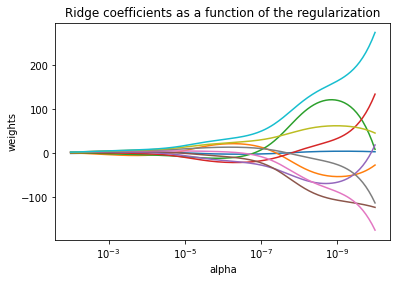

In [10]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

**Total running time of the script:** ( 0 minutes 0.225 seconds)

#Classification of text documents using sparse features

This is an example showing how scikit-learn can be used to classify documents by topics using a bag-of-words approach. This example uses a scipy.sparse matrix to store the features and demonstrates various classifiers that can efficiently handle sparse matrices.

The dataset used in this example is the 20 newsgroups dataset. It will be automatically downloaded, then cached.

In [11]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Olivier Grisel <olivier.grisel@ensta.org>
#         Mathieu Blondel <mathieu@mblondel.org>
#         Lars Buitinck
# License: BSD 3 clause

import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

op = OptionParser()
op.add_option(
    "--report",
    action="store_true",
    dest="print_report",
    help="Print a detailed classification report.",
)
op.add_option(
    "--chi2_select",
    action="store",
    type="int",
    dest="select_chi2",
    help="Select some number of features using a chi-squared test",
)
op.add_option(
    "--confusion_matrix",
    action="store_true",
    dest="print_cm",
    help="Print the confusion matrix.",
)
op.add_option(
    "--top10",
    action="store_true",
    dest="print_top10",
    help="Print ten most discriminative terms per class for every classifier.",
)
op.add_option(
    "--all_categories",
    action="store_true",
    dest="all_categories",
    help="Whether to use all categories or not.",
)
op.add_option("--use_hashing", action="store_true", help="Use a hashing vectorizer.")
op.add_option(
    "--n_features",
    action="store",
    type=int,
    default=2 ** 16,
    help="n_features when using the hashing vectorizer.",
)
op.add_option(
    "--filtered",
    action="store_true",
    help=(
        "Remove newsgroup information that is easily overfit: "
        "headers, signatures, and quoting."
    ),
)


def is_interactive():
    return not hasattr(sys.modules["__main__"], "__file__")


# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)

print(__doc__)
op.print_help()
print()

Automatically created module for IPython interactive environment
Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --report              Print a detailed classification report.
  --chi2_select=SELECT_CHI2
                        Select some number of features using a chi-squared
                        test
  --confusion_matrix    Print the confusion matrix.
  --top10               Print ten most discriminative terms per class for
                        every classifier.
  --all_categories      Whether to use all categories or not.
  --use_hashing         Use a hashing vectorizer.
  --n_features=N_FEATURES
                        n_features when using the hashing vectorizer.
  --filtered            Remove newsgroup information that is easily overfit:
                        headers, signatures, and quoting.



Out:

Usage: plot_document_classification_20newsgroups.py [options]

Options:
  -h, --help            show this help message and exit
  --report              Print a detailed classification report.
  --chi2_select=SELECT_CHI2
                        Select some number of features using a chi-squared
                        test
  --confusion_matrix    Print the confusion matrix.
  --top10               Print ten most discriminative terms per class for
                        every classifier.
  --all_categories      Whether to use all categories or not.
  --use_hashing         Use a hashing vectorizer.
  --n_features=N_FEATURES
                        n_features when using the hashing vectorizer.
  --filtered            Remove newsgroup information that is easily overfit:
                        headers, signatures, and quoting.

***Load data from the training set***

Let’s load data from the newsgroups dataset which comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation).

In [12]:
if opts.all_categories:
    categories = None
else:
    categories = [
        "alt.atheism",
        "talk.religion.misc",
        "comp.graphics",
        "sci.space",
    ]

if opts.filtered:
    remove = ("headers", "footers", "quotes")
else:
    remove = ()

print("Loading 20 newsgroups dataset for categories:")
print(categories if categories else "all")

data_train = fetch_20newsgroups(
    subset="train", categories=categories, shuffle=True, random_state=42, remove=remove
)

data_test = fetch_20newsgroups(
    subset="test", categories=categories, shuffle=True, random_state=42, remove=remove
)
print("data loaded")

# order of labels in `target_names` can be different from `categories`
target_names = data_train.target_names


def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6


data_train_size_mb = size_mb(data_train.data)
data_test_size_mb = size_mb(data_test.data)

print(
    "%d documents - %0.3fMB (training set)" % (len(data_train.data), data_train_size_mb)
)
print("%d documents - %0.3fMB (test set)" % (len(data_test.data), data_test_size_mb))
print("%d categories" % len(target_names))
print()

# split a training set and a test set
y_train, y_test = data_train.target, data_test.target

print("Extracting features from the training data using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    vectorizer = HashingVectorizer(
        stop_words="english", alternate_sign=False, n_features=opts.n_features
    )
    X_train = vectorizer.transform(data_train.data)
else:
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words="english")
    X_train = vectorizer.fit_transform(data_train.data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_train_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_train.shape)
print()

print("Extracting features from the test data using the same vectorizer")
t0 = time()
X_test = vectorizer.transform(data_test.data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_test_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_test.shape)
print()

# mapping from integer feature name to original token string
if opts.use_hashing:
    feature_names = None
else:
    feature_names = vectorizer.get_feature_names_out()

if opts.select_chi2:
    print("Extracting %d best features by a chi-squared test" % opts.select_chi2)
    t0 = time()
    ch2 = SelectKBest(chi2, k=opts.select_chi2)
    X_train = ch2.fit_transform(X_train, y_train)
    X_test = ch2.transform(X_test)
    if feature_names is not None:
        # keep selected feature names
        feature_names = feature_names[ch2.get_support()]
    print("done in %fs" % (time() - t0))
    print()


def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

2021-12-12 06:31:07,414 INFO Downloading 20news dataset. This may take a few minutes.
2021-12-12 06:31:07,416 INFO Downloading dataset from https://ndownloader.figshare.com/files/5975967 (14 MB)


Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
data loaded
2034 documents - 3.980MB (training set)
1353 documents - 2.867MB (test set)
4 categories

Extracting features from the training data using a sparse vectorizer
done in 0.574579s at 6.926MB/s
n_samples: 2034, n_features: 33809

Extracting features from the test data using the same vectorizer
done in 0.363994s at 7.878MB/s
n_samples: 1353, n_features: 33809



Out:

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
data loaded
2034 documents - 3.980MB (training set)
1353 documents - 2.867MB (test set)
4 categories

Extracting features from the training data using a sparse vectorizer
done in 0.646635s at 6.154MB/s
n_samples: 2034, n_features: 33809

Extracting features from the test data using the same vectorizer
done in 0.385261s at 7.443MB/s
n_samples: 1353, n_features: 33809

***Benchmark classifiers***

We train and test the datasets with 15 different classification models and get performance results for each model.

In [13]:
def benchmark(clf):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, "coef_"):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if opts.print_top10 and feature_names is not None:
            print("top 10 keywords per class:")
            for i, label in enumerate(target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
        print()

    if opts.print_report:
        print("classification report:")
        print(metrics.classification_report(y_test, pred, target_names=target_names))

    if opts.print_cm:
        print("confusion matrix:")
        print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split("(")[0]
    return clf_descr, score, train_time, test_time


results = []
for clf, name in (
    (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
    (Perceptron(max_iter=50), "Perceptron"),
    (PassiveAggressiveClassifier(max_iter=50), "Passive-Aggressive"),
    (KNeighborsClassifier(n_neighbors=10), "kNN"),
    (RandomForestClassifier(), "Random forest"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print("=" * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False, tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=0.0001, max_iter=50, penalty=penalty)))

# Train SGD with Elastic Net penalty
print("=" * 80)
print("Elastic-Net penalty")
results.append(
    benchmark(SGDClassifier(alpha=0.0001, max_iter=50, penalty="elasticnet"))
)

# Train NearestCentroid without threshold
print("=" * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print("=" * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=0.01)))
results.append(benchmark(BernoulliNB(alpha=0.01)))
results.append(benchmark(ComplementNB(alpha=0.1)))

print("=" * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(
    benchmark(
        Pipeline(
            [
                (
                    "feature_selection",
                    SelectFromModel(LinearSVC(penalty="l1", dual=False, tol=1e-3)),
                ),
                ("classification", LinearSVC(penalty="l2")),
            ]
        )
    )
)

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(solver='sag', tol=0.01)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:729: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


train time: 0.229s
test time:  0.003s
accuracy:   0.898
dimensionality: 33809
density: 1.000000


Perceptron
________________________________________________________________________________
Training: 
Perceptron(max_iter=50)
train time: 0.031s
test time:  0.003s
accuracy:   0.888
dimensionality: 33809
density: 0.255302


Passive-Aggressive
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier(max_iter=50)
train time: 0.052s
test time:  0.004s
accuracy:   0.908
dimensionality: 33809
density: 0.700775


kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=10)
train time: 0.002s
test time:  0.252s
accuracy:   0.858

Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier()
train time: 1.886s
test time:  0.104s
accuracy:   0.839

L2 penalty
______________________________________

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


train time: 0.282s
test time:  0.004s
accuracy:   0.880



Out:

================================================================================
Ridge Classifier
________________________________________________________________________________
Training:
RidgeClassifier(solver='sag', tol=0.01)
/home/circleci/project/sklearn/linear_model/_ridge.py:728: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
train time: 0.260s
test time:  0.002s
accuracy:   0.898
dimensionality: 33809
density: 1.000000


================================================================================
Perceptron
________________________________________________________________________________
Training:
Perceptron(max_iter=50)
train time: 0.026s
test time:  0.002s
accuracy:   0.888
dimensionality: 33809
density: 0.255302


================================================================================
Passive-Aggressive
________________________________________________________________________________
Training:
PassiveAggressiveClassifier(max_iter=50)
train time: 0.032s
test time:  0.002s
accuracy:   0.902
dimensionality: 33809
density: 0.711867


================================================================================
kNN
________________________________________________________________________________
Training:
KNeighborsClassifier(n_neighbors=10)
train time: 0.001s
test time:  0.243s
accuracy:   0.858

================================================================================
Random forest
________________________________________________________________________________
Training:
RandomForestClassifier()
train time: 2.025s
test time:  0.107s
accuracy:   0.826

================================================================================
L2 penalty
________________________________________________________________________________
Training:
LinearSVC(dual=False, tol=0.001)
train time: 0.118s
test time:  0.002s
accuracy:   0.900
dimensionality: 33809
density: 1.000000


________________________________________________________________________________
Training:
SGDClassifier(max_iter=50)
train time: 0.055s
test time:  0.002s
accuracy:   0.903
dimensionality: 33809
density: 0.579424


================================================================================
L1 penalty
________________________________________________________________________________
Training:
LinearSVC(dual=False, penalty='l1', tol=0.001)
train time: 0.270s
test time:  0.002s
accuracy:   0.873
dimensionality: 33809
density: 0.005553


________________________________________________________________________________
Training:
SGDClassifier(max_iter=50, penalty='l1')
train time: 0.157s
test time:  0.002s
accuracy:   0.880
dimensionality: 33809
density: 0.022509


================================================================================
Elastic-Net penalty
________________________________________________________________________________
Training:
SGDClassifier(max_iter=50, penalty='elasticnet')
train time: 0.235s
test time:  0.002s
accuracy:   0.901
dimensionality: 33809
density: 0.184685


================================================================================
NearestCentroid (aka Rocchio classifier)
________________________________________________________________________________
Training:
NearestCentroid()
train time: 0.006s
test time:  0.003s
accuracy:   0.855

================================================================================
Naive Bayes
________________________________________________________________________________
Training:
MultinomialNB(alpha=0.01)
train time: 0.005s
test time:  0.002s
accuracy:   0.899
/home/circleci/project/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
dimensionality: 33809
density: 1.000000


________________________________________________________________________________
Training:
BernoulliNB(alpha=0.01)
train time: 0.008s
test time:  0.007s
accuracy:   0.884
/home/circleci/project/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
dimensionality: 33809
density: 1.000000


________________________________________________________________________________
Training:
ComplementNB(alpha=0.1)
train time: 0.006s
test time:  0.002s
accuracy:   0.911
/home/circleci/project/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
dimensionality: 33809
density: 1.000000


================================================================================
LinearSVC with L1-based feature selection
________________________________________________________________________________
Training:
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(dual=False, penalty='l1',
                                                     tol=0.001))),
                ('classification', LinearSVC())])
train time: 0.310s
test time:  0.003s
accuracy:   0.879

***Add plots***

The bar plot indicates the accuracy, training time (normalized) and test time (normalized) of each classifier.

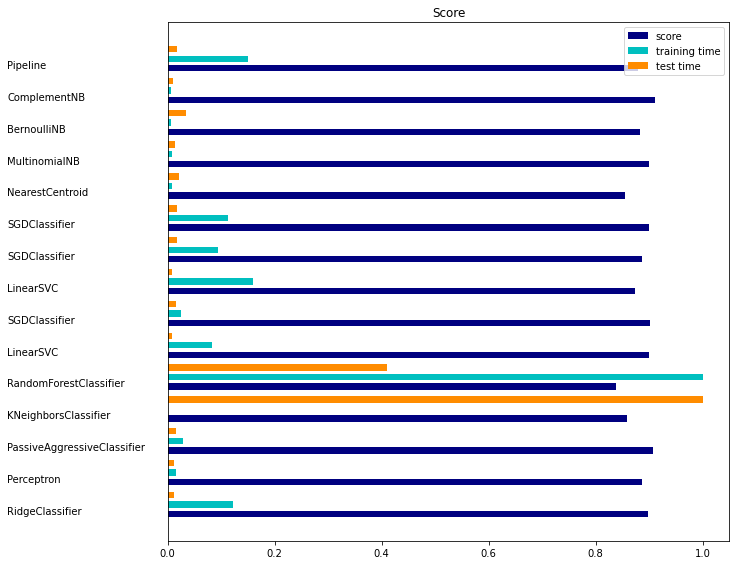

In [14]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, 0.2, label="score", color="navy")
plt.barh(indices + 0.3, training_time, 0.2, label="training time", color="c")
plt.barh(indices + 0.6, test_time, 0.2, label="test time", color="darkorange")
plt.yticks(())
plt.legend(loc="best")
plt.subplots_adjust(left=0.25)
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(bottom=0.05)

for i, c in zip(indices, clf_names):
    plt.text(-0.3, i, c)

plt.show()

https://scikit-learn.org/stable/_images/sphx_glr_plot_document_classification_20newsgroups_001.png

**Total running time of the script:** ( 0 minutes 5.776 seconds)

#Common pitfalls in the interpretation of coefficients of linear models

In linear models, the target value is modeled as a linear combination of the features (see the Linear Models User Guide section for a description of a set of linear models available in scikit-learn). Coefficients in multiple linear models represent the relationship between the given feature,  and the target, , assuming that all the other features remain constant (conditional dependence). This is different from plotting  versus  and fitting a linear relationship: in that case all possible values of the other features are taken into account in the estimation (marginal dependence).

This example will provide some hints in interpreting coefficient in linear models, pointing at problems that arise when either the linear model is not appropriate to describe the dataset, or when features are correlated.

We will use data from the “Current Population Survey” from 1985 to predict wage as a function of various features such as experience, age, or education.



*   [The dataset: wages](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-dataset-wages)
*   [The machine-learning pipeline](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-machine-learning-pipeline)
*   [Processing the dataset](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#processing-the-dataset)
*   [Interpreting coefficients: scale matters](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#interpreting-coefficients-scale-matters)
*   [Checking the variability of the coefficients](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#checking-the-variability-of-the-coefficients)
*   [The problem of correlated variables](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-problem-of-correlated-variables)
*   [Preprocessing numerical variables](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#preprocessing-numerical-variables)
*   [Linear models with regularization](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#linear-models-with-regularization)
*   [Linear models with sparse coefficients](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#linear-models-with-sparse-coefficients)
*   [Lessons learned](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#lessons-learned)







In [15]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**[The dataset: wages](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-dataset-wages)**

We fetch the data from OpenML. Note that setting the parameter as_frame to True will retrieve the data as a pandas dataframe.

In [16]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)

Then, we identify features X and targets y: the column WAGE is our target variable (i.e., the variable which we want to predict).

In [17]:
X = survey.data[survey.feature_names]
X.describe(include="all")

2021-12-12 06:31:30,644 INFO NumExpr defaulting to 2 threads.


,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
count,534.000000,534,534,534.000000,534,534.000000,534,534,534,534
unique,NaN,2,2,NaN,2,NaN,3,6,3,2
top,NaN,no,male,NaN,not_member,NaN,White,Other,Other,Married
freq,NaN,378,289,NaN,438,NaN,440,156,411,350
mean,13.018727,NaN,NaN,17.822097,NaN,36.833333,NaN,NaN,NaN,NaN
std,2.615373,NaN,NaN,12.379710,NaN,11.726573,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN
25%,12.000000,NaN,NaN,8.000000,NaN,28.000000,NaN,NaN,NaN,NaN
50%,12.000000,NaN,NaN,15.000000,NaN,35.000000,NaN,NaN,NaN,NaN
75%,15.000000,NaN,NaN,26.000000,NaN,44.000000,NaN,NaN,NaN,NaN


Note that the dataset contains categorical and numerical variables. We will need to take this into account when preprocessing the dataset thereafter.

In [18]:
X.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8.0,no,female,21.0,not_member,35.0,Hispanic,Other,Manufacturing,Married
1,9.0,no,female,42.0,not_member,57.0,White,Other,Manufacturing,Married
2,12.0,no,male,1.0,not_member,19.0,White,Other,Manufacturing,Unmarried
3,12.0,no,male,4.0,not_member,22.0,White,Other,Other,Unmarried
4,12.0,no,male,17.0,not_member,35.0,White,Other,Other,Married


Our target for prediction: the wage. Wages are described as floating-point number in dollars per hour.

In [19]:
y = survey.target.values.ravel()
survey.target.head()

0    5.10
1    4.95
2    6.67
3    4.00
4    7.50
Name: WAGE, dtype: float64

Out:

0    5.10

1    4.95

2    6.67

3    4.00

4    7.50

Name: WAGE, dtype: float64

We split the sample into a train and a test dataset. Only the train dataset will be used in the following exploratory analysis. This is a way to emulate a real situation where predictions are performed on an unknown target, and we don’t want our analysis and decisions to be biased by our knowledge of the test data.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

First, let’s get some insights by looking at the variable distributions and at the pairwise relationships between them. Only numerical variables will be used. In the following plot, each dot represents a sample.

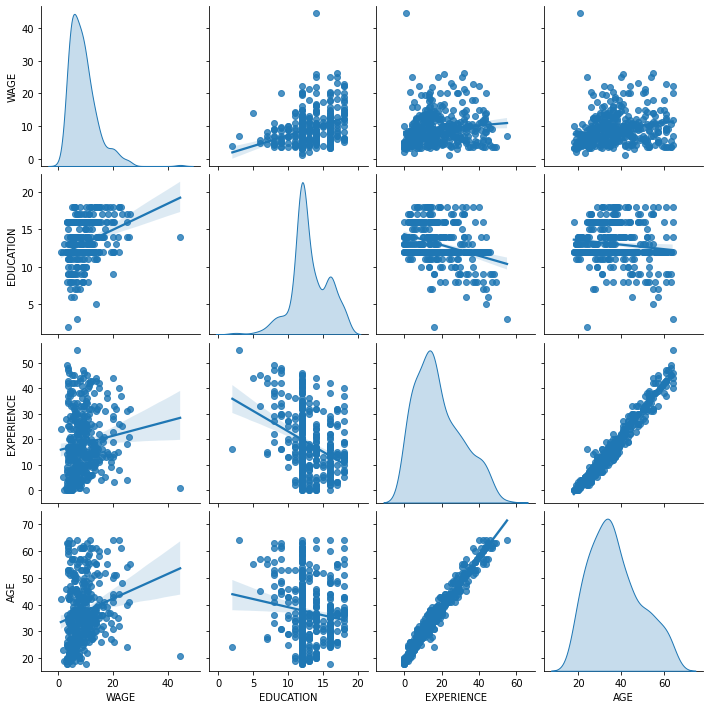

In [21]:
train_dataset = X_train.copy()
train_dataset.insert(0, "WAGE", y_train)
_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

Looking closely at the WAGE distribution reveals that it has a long tail. For this reason, we should take its logarithm to turn it approximately into a normal distribution (linear models such as ridge or lasso work best for a normal distribution of error).

The WAGE is increasing when EDUCATION is increasing. Note that the dependence between WAGE and EDUCATION represented here is a marginal dependence, i.e., it describes the behavior of a specific variable without keeping the others fixed.

Also, the EXPERIENCE and AGE are strongly linearly correlated.

**[The machine-learning pipeline](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-machine-learning-pipeline)**

To design our machine-learning pipeline, we first manually check the type of data that we are dealing with:

In [22]:
survey.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    float64 
 1   SOUTH       534 non-null    category
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    float64 
 4   UNION       534 non-null    category
 5   AGE         534 non-null    float64 
 6   RACE        534 non-null    category
 7   OCCUPATION  534 non-null    category
 8   SECTOR      534 non-null    category
 9   MARR        534 non-null    category
dtypes: category(7), float64(3)
memory usage: 17.1 KB


Out:

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 534 entries, 0 to 533

Data columns (total 10 columns):

 '#'   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   EDUCATION   534 non-null    float64

 1   SOUTH       534 non-null    category

 2   SEX         534 non-null    category

 3   EXPERIENCE  534 non-null    float64

 4   UNION       534 non-null    category

 5   AGE         534 non-null    float64

 6   RACE        534 non-null    category

 7   OCCUPATION  534 non-null    category

 8   SECTOR      534 non-null    category

 9   MARR        534 non-null    category

dtypes: category(7), float64(3)

memory usage: 17.2 KB

As seen previously, the dataset contains columns with different data types and we need to apply a specific preprocessing for each data types. In particular categorical variables cannot be included in linear model if not coded as integers first. In addition, to avoid categorical features to be treated as ordered values, we need to one-hot-encode them. Our pre-processor will

*   one-hot encode (i.e., generate a column by category) the categorical columns;
*   as a first approach (we will see after how the normalisation of numerical values will affect our discussion), keep numerical values as they are.



In [23]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["RACE", "OCCUPATION", "SECTOR", "MARR", "UNION", "SEX", "SOUTH"]
numerical_columns = ["EDUCATION", "EXPERIENCE", "AGE"]

preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,
)

To describe the dataset as a linear model we use a ridge regressor with a very small regularization and to model the logarithm of the WAGE.

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=sp.special.exp10
    ),
)

**[Processing the dataset](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#processing-the-dataset)**

First, we fit the model.

In [25]:
_ = model.fit(X_train, y_train)

Then we check the performance of the computed model plotting its predictions on the test set and computing, for example, the median absolute error of the model.

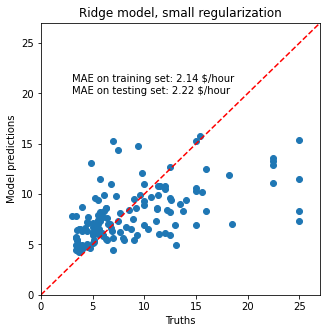

In [26]:
from sklearn.metrics import median_absolute_error

y_pred = model.predict(X_train)

mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} $/hour"
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} $/hour"
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title("Ridge model, small regularization")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

The model learnt is far from being a good model making accurate predictions: this is obvious when looking at the plot above, where good predictions should lie on the red line.

In the following section, we will interpret the coefficients of the model. While we do so, we should keep in mind that any conclusion we draw is about the model that we build, rather than about the true (real-world) generative process of the data.

**[Interpreting coefficients: scale matters](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#interpreting-coefficients-scale-matters)**

First of all, we can take a look to the values of the coefficients of the regressor we have fitted.

In [27]:
feature_names = model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model.named_steps["transformedtargetregressor"].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
RACE_Hispanic,-0.013555
RACE_Other,-0.009111
RACE_White,0.022558
OCCUPATION_Clerical,0.000056
OCCUPATION_Management,0.090539
OCCUPATION_Other,-0.025091
OCCUPATION_Professional,0.071975
OCCUPATION_Sales,-0.046625
OCCUPATION_Service,-0.091042
SECTOR_Construction,-0.000177


The AGE coefficient is expressed in “dollars/hour per living years” while the EDUCATION one is expressed in “dollars/hour per years of education”. This representation of the coefficients has the benefit of making clear the practical predictions of the model: an increase of 1 year in AGE means a decrease of 0.030867 dollars/hour, while an increase of 1 year in EDUCATION means an increase of 0.054699 dollars/hour. On the other hand, categorical variables (as UNION or SEX) are adimensional numbers taking either the value 0 or 1. Their coefficients are expressed in dollars/hour. Then, we cannot compare the magnitude of different coefficients since the features have different natural scales, and hence value ranges, because of their different unit of measure. This is more visible if we plot the coefficients.

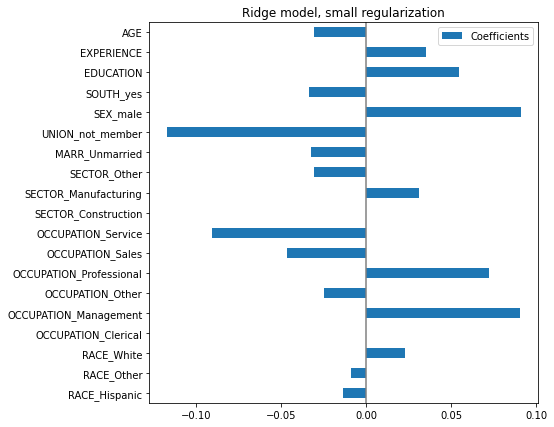

In [28]:
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Indeed, from the plot above the most important factor in determining WAGE appears to be the variable UNION, even if our intuition might tell us that variables like EXPERIENCE should have more impact.

Looking at the coefficient plot to gauge feature importance can be misleading as some of them vary on a small scale, while others, like AGE, varies a lot more, several decades.

This is visible if we compare the standard deviations of different features.

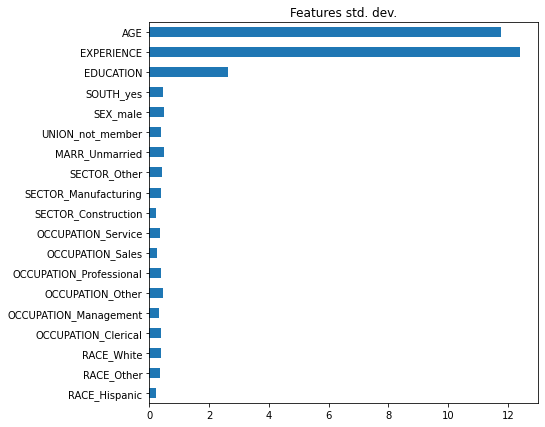

In [29]:
X_train_preprocessed = pd.DataFrame(
    model.named_steps["columntransformer"].transform(X_train), columns=feature_names
)

X_train_preprocessed.std(axis=0).plot(kind="barh", figsize=(9, 7))
plt.title("Features std. dev.")
plt.subplots_adjust(left=0.3)

Multiplying the coefficients by the standard deviation of the related feature would reduce all the coefficients to the same unit of measure. As we will see after this is equivalent to normalize numerical variables to their standard deviation, as y = \sum{coef_i \times X_i} =
\sum{(coef_i \times std_i) \times (X_i / std_i)}.

In that way, we emphasize that the greater the variance of a feature, the larger the weight of the corresponding coefficient on the output, all else being equal.

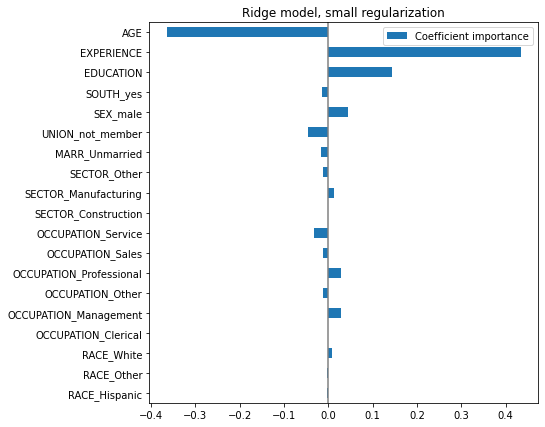

In [30]:
coefs = pd.DataFrame(
    model.named_steps["transformedtargetregressor"].regressor_.coef_
    * X_train_preprocessed.std(axis=0),
    columns=["Coefficient importance"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Now that the coefficients have been scaled, we can safely compare them.

**Warning** : Why does the plot above suggest that an increase in age leads to a decrease in wage? Why the initial pairplot is telling the opposite?

The plot above tells us about dependencies between a specific feature and the target when all other features remain constant, i.e., **conditional dependencies**. An increase of the AGE will induce a decrease of the WAGE when all other features remain constant. On the contrary, an increase of the EXPERIENCE will induce an increase of the WAGE when all other features remain constant. Also, AGE, EXPERIENCE and EDUCATION are the three variables that most influence the model.

**[Checking the variability of the coefficients](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#checking-the-variability-of-the-coefficients)**

We can check the coefficient variability through cross-validation: it is a form of data perturbation (related to resampling).

If coefficients vary significantly when changing the input dataset their robustness is not guaranteed, and they should probably be interpreted with caution.

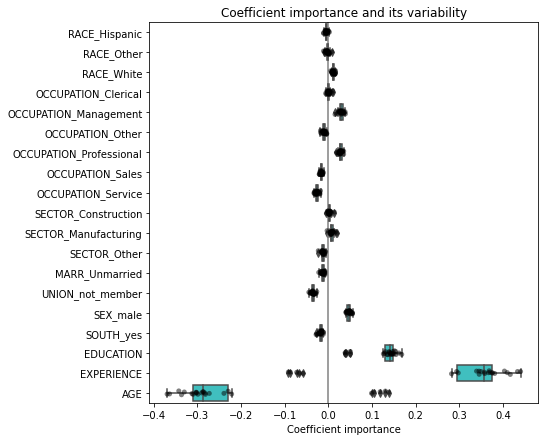

In [31]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

cv_model = cross_validate(
    model,
    X,
    y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True,
    n_jobs=-1,
)
coefs = pd.DataFrame(
    [
        est.named_steps["transformedtargetregressor"].regressor_.coef_
        * X_train_preprocessed.std(axis=0)
        for est in cv_model["estimator"]
    ],
    columns=feature_names,
)
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.subplots_adjust(left=0.3)

**[The problem of correlated variables](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-problem-of-correlated-variables)**

The AGE and EXPERIENCE coefficients are affected by strong variability which might be due to the collinearity between the 2 features: as AGE and EXPERIENCE vary together in the data, their effect is difficult to tease apart.

To verify this interpretation we plot the variability of the AGE and EXPERIENCE coefficient.

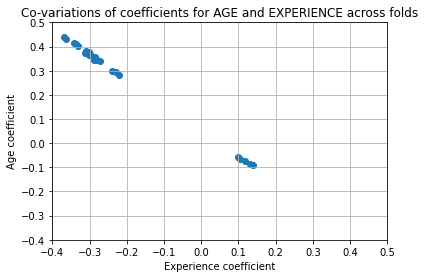

In [32]:
plt.ylabel("Age coefficient")
plt.xlabel("Experience coefficient")
plt.grid(True)
plt.xlim(-0.4, 0.5)
plt.ylim(-0.4, 0.5)
plt.scatter(coefs["AGE"], coefs["EXPERIENCE"])
_ = plt.title("Co-variations of coefficients for AGE and EXPERIENCE across folds")

wo regions are populated: when the EXPERIENCE coefficient is positive the AGE one is negative and vice-versa.

To go further we remove one of the 2 features and check what is the impact on the model stability.

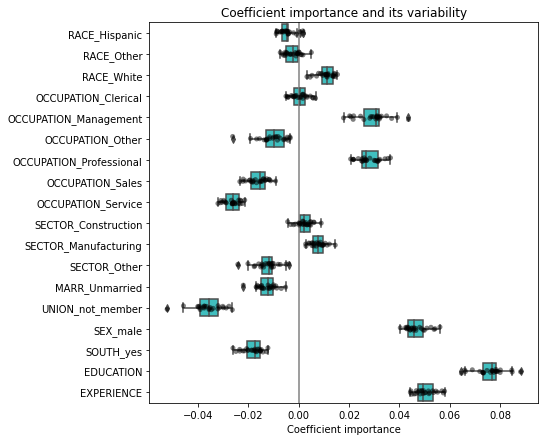

In [33]:
column_to_drop = ["AGE"]

cv_model = cross_validate(
    model,
    X.drop(columns=column_to_drop),
    y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True,
    n_jobs=-1,
)
coefs = pd.DataFrame(
    [
        est.named_steps["transformedtargetregressor"].regressor_.coef_
        * X_train_preprocessed.drop(columns=column_to_drop).std(axis=0)
        for est in cv_model["estimator"]
    ],
    columns=feature_names[:-1],
)
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color=".5")
plt.title("Coefficient importance and its variability")
plt.xlabel("Coefficient importance")
plt.subplots_adjust(left=0.3)

The estimation of the EXPERIENCE coefficient is now less variable and remain important for all models trained during cross-validation.

**[Preprocessing numerical variables](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#preprocessing-numerical-variables)**

As said above (see “[The machine-learning pipeline](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-pipeline)”), we could also choose to scale numerical values before training the model. This can be useful to apply a similar amount regularization to all of them in the Ridge. The preprocessor is redefined in order to subtract the mean and scale variables to unit variance.

In [34]:
from sklearn.preprocessing import StandardScaler

preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), categorical_columns),
    (StandardScaler(), numerical_columns),
    remainder="passthrough",
)

The model will stay unchanged.

In [35]:
model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=sp.special.exp10
    ),
)

_ = model.fit(X_train, y_train)

Again, we check the performance of the computed model using, for example, the median absolute error of the model and the R squared coefficient.

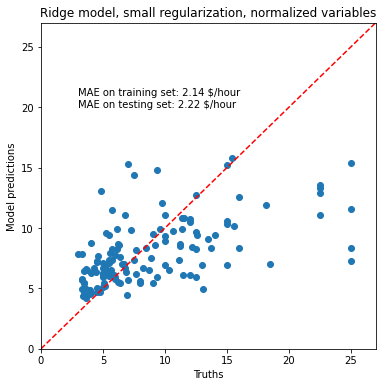

In [36]:
y_pred = model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} $/hour"
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} $/hour"
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(3, 20, string_score)

plt.title("Ridge model, small regularization, normalized variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

For the coefficient analysis, scaling is not needed this time.

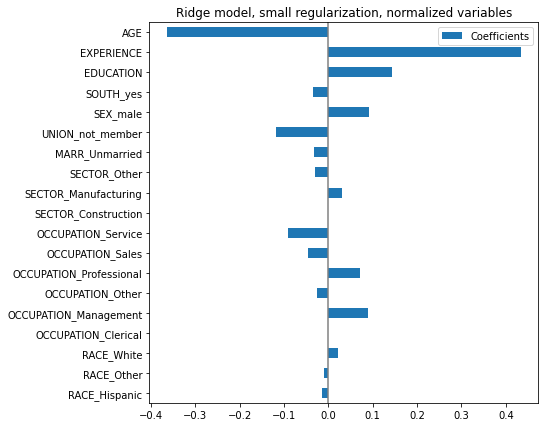

In [37]:
coefs = pd.DataFrame(
    model.named_steps["transformedtargetregressor"].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model, small regularization, normalized variables")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

We now inspect the coefficients across several cross-validation folds.

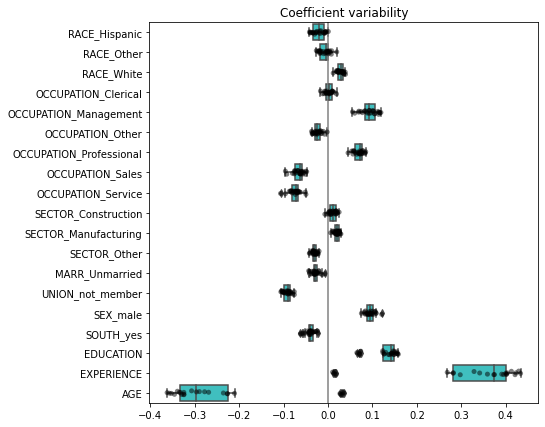

In [38]:
cv_model = cross_validate(
    model,
    X,
    y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True,
    n_jobs=-1,
)
coefs = pd.DataFrame(
    [
        est.named_steps["transformedtargetregressor"].regressor_.coef_
        for est in cv_model["estimator"]
    ],
    columns=feature_names,
)
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color=".5")
plt.title("Coefficient variability")
plt.subplots_adjust(left=0.3)

The result is quite similar to the non-normalized case.

**[Linear models with regularization](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#linear-models-with-regularization)**

In machine-learning practice, Ridge Regression is more often used with non-negligible regularization.

Above, we limited this regularization to a very little amount. Regularization improves the conditioning of the problem and reduces the variance of the estimates. RidgeCV applies cross validation in order to determine which value of the regularization parameter (alpha) is best suited for prediction.

In [39]:
from sklearn.linear_model import RidgeCV

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=RidgeCV(alphas=np.logspace(-10, 10, 21)),
        func=np.log10,
        inverse_func=sp.special.exp10,
    ),
)

_ = model.fit(X_train, y_train)

First we check which value of  has been selected.

In [40]:
model[-1].regressor_.alpha_

10.0

Out:

10.0

Then we check the quality of the predictions.

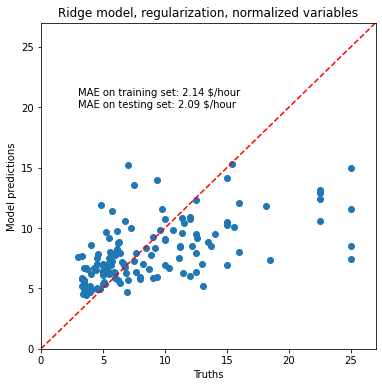

In [41]:
y_pred = model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} $/hour"
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} $/hour"

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(3, 20, string_score)

plt.title("Ridge model, regularization, normalized variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

The ability to reproduce the data of the regularized model is similar to the one of the non-regularized model.

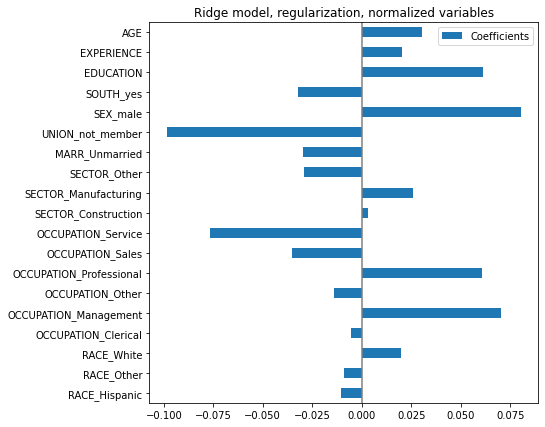

In [42]:
coefs = pd.DataFrame(
    model.named_steps["transformedtargetregressor"].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model, regularization, normalized variables")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

The coefficients are significantly different. AGE and EXPERIENCE coefficients are both positive but they now have less influence on the prediction.

The regularization reduces the influence of correlated variables on the model because the weight is shared between the two predictive variables, so neither alone would have strong weights.

On the other hand, the weights obtained with regularization are more stable (see the [Ridge regression and classification](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression) User Guide section). This increased stability is visible from the plot, obtained from data perturbations, in a cross validation. This plot can be compared with the [previous one](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#covariation).

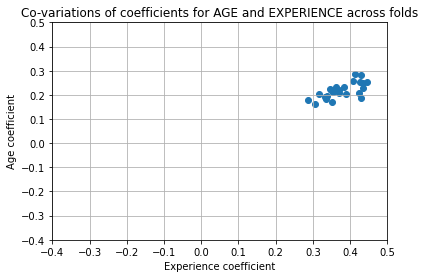

In [43]:
cv_model = cross_validate(
    model,
    X,
    y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True,
    n_jobs=-1,
)
coefs = pd.DataFrame(
    [
        est.named_steps["transformedtargetregressor"].regressor_.coef_
        * X_train_preprocessed.std(axis=0)
        for est in cv_model["estimator"]
    ],
    columns=feature_names,
)

plt.ylabel("Age coefficient")
plt.xlabel("Experience coefficient")
plt.grid(True)
plt.xlim(-0.4, 0.5)
plt.ylim(-0.4, 0.5)
plt.scatter(coefs["AGE"], coefs["EXPERIENCE"])
_ = plt.title("Co-variations of coefficients for AGE and EXPERIENCE across folds")

**[Linear models with sparse coefficients](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#linear-models-with-sparse-coefficients)**

Another possibility to take into account correlated variables in the dataset, is to estimate sparse coefficients. In some way we already did it manually when we dropped the AGE column in a previous Ridge estimation.

Lasso models (see the Lasso User Guide section) estimates sparse coefficients. LassoCV applies cross validation in order to determine which value of the regularization parameter (alpha) is best suited for the model estimation.

In [44]:
from sklearn.linear_model import LassoCV

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=LassoCV(alphas=np.logspace(-10, 10, 21), max_iter=100000),
        func=np.log10,
        inverse_func=sp.special.exp10,
    ),
)

_ = model.fit(X_train, y_train)

First we verify which value of  has been selected.

In [45]:
model[-1].regressor_.alpha_

0.001

Out:

0.001

Then we check the quality of the predictions.

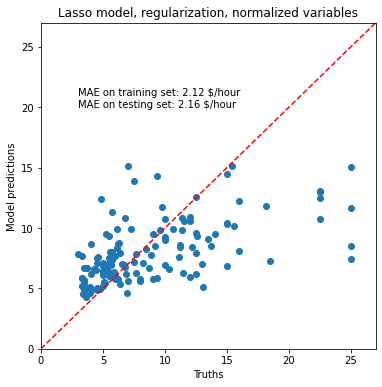

In [46]:
y_pred = model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} $/hour"
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} $/hour"

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(3, 20, string_score)

plt.title("Lasso model, regularization, normalized variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

For our dataset, again the model is not very predictive.

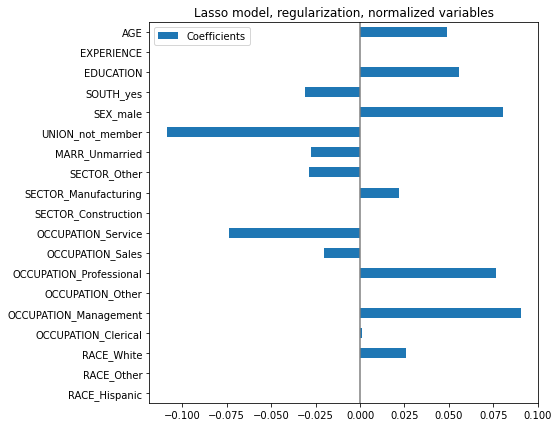

In [47]:
coefs = pd.DataFrame(
    model.named_steps["transformedtargetregressor"].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Lasso model, regularization, normalized variables")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

A Lasso model identifies the correlation between AGE and EXPERIENCE and suppresses one of them for the sake of the prediction.

It is important to keep in mind that the coefficients that have been dropped may still be related to the outcome by themselves: the model chose to suppress them because they bring little or no additional information on top of the other features. Additionally, this selection is unstable for correlated features, and should be interpreted with caution.

**[Lessons learned](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#lessons-learned)**

*   Coefficients must be scaled to the same unit of measure to retrieve feature importance. Scaling them with the standard-deviation of the feature is a useful proxy.
*   Coefficients in multivariate linear models represent the dependency between a given feature and the target, **conditional** on the other features.
*   Correlated features induce instabilities in the coefficients of linear models and their effects cannot be well teased apart.
*   Different linear models respond differently to feature correlation and coefficients could significantly vary from one another.
*   Inspecting coefficients across the folds of a cross-validation loop gives an idea of their stability.



**Total running time of the script:** ( 0 minutes 13.022 seconds)

#**1.2.3. Ridge Complexity**

This method has the same order of complexity as [Ordinary Least Squares](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares).

#**1.2.4. Setting the regularization parameter: leave-one-out Cross-Validation**

[RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) implements ridge regression with built-in cross-validation of the alpha parameter. The object works in the same way as GridSearchCV except that it defaults to Leave-One-Out Cross-Validation:

In [48]:
import numpy as np
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
#RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))
reg.alpha_
#0.01

0.01

Specifying the value of the cv attribute will trigger the use of cross-validation with GridSearchCV, for example cv=10 for 10-fold cross-validation, rather than Leave-One-Out Cross-Validation.

**References**

*   “Notes on Regularized Least Squares”, Rifkin & Lippert ([technical report](http://cbcl.mit.edu/publications/ps/MIT-CSAIL-TR-2007-025.pdf), [course slides](https://www.mit.edu/~9.520/spring07/Classes/rlsslides.pdf)).



#**1.3. Lasso**

The [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. For this reason, Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero coefficients (see [Compressive sensing: tomography reconstruction with L1 prior (Lasso)](https://scikit-learn.org/stable/auto_examples/applications/plot_tomography_l1_reconstruction.html#sphx-glr-auto-examples-applications-plot-tomography-l1-reconstruction-py)).

Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:

\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}

The lasso estimate thus solves the minimization of the least-squares penalty with \alpha ||w||_1 added, where α is a constant and ||w||_1 is the \ell_1 -norm of the coefficient vector.

The implementation in the class Lasso uses coordinate descent as the algorithm to fit the coefficients. See Least Angle Regression for another implementation:



In [49]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])
#Lasso(alpha=0.1)
reg.predict([[1, 1]])
#array([0.8])

array([0.8])

The function [lasso_path](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lasso_path.html#sklearn.linear_model.lasso_path) is useful for lower-level tasks, as it computes the coefficients along the full path of possible values.

**Examples:**

*  [Lasso and Elastic Net for Sparse Signals](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html#sphx-glr-auto-examples-linear-model-plot-lasso-and-elasticnet-py)
*  [Compressive sensing: tomography reconstruction with L1 prior (Lasso)](https://scikit-learn.org/stable/auto_examples/applications/plot_tomography_l1_reconstruction.html#sphx-glr-auto-examples-applications-plot-tomography-l1-reconstruction-py)
*  [Common pitfalls in the interpretation of coefficients of linear models](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py)

**Note: Feature selection with Lasso**
As the Lasso regression yields sparse models, it can thus be used to perform feature selection, as detailed in [L1-based feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#l1-feature-selection).

The following two references explain the iterations used in the coordinate descent solver of scikit-learn, as well as the duality gap computation used for convergence control.

**References**

*  “Regularization Path For Generalized linear Models by Coordinate Descent”, Friedman, Hastie & Tibshirani, J Stat Softw, 2010 ([Paper](https://www.jstatsoft.org/article/view/v033i01/v33i01.pdf)).
*  “An Interior-Point Method for Large-Scale L1-Regularized Least Squares,” S. J. Kim, K. Koh, M. Lustig, S. Boyd and D. Gorinevsky, in IEEE Journal of Selected Topics in Signal Processing, 2007 ([Paper](https://web.stanford.edu/~boyd/papers/pdf/l1_ls.pdf))

#Lasso and Elastic Net for Sparse Signals

Estimates Lasso and Elastic-Net regression models on a manually generated sparse signal corrupted with an additive noise. Estimated coefficients are compared with the ground-truth.

https://scikit-learn.org/stable/_images/sphx_glr_plot_lasso_and_elasticnet_001.png

Out:

Lasso(alpha=0.1)

r^2 on test data : 0.658064

ElasticNet(alpha=0.1, l1_ratio=0.7)

r^2 on test data : 0.642515

Lasso(alpha=0.1)
r^2 on test data : 0.658064
ElasticNet(alpha=0.1, l1_ratio=0.7)
r^2 on test data : 0.642515


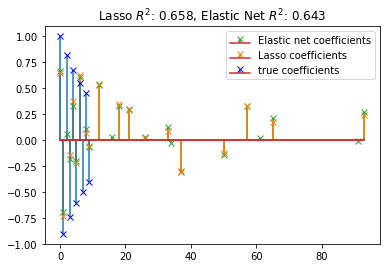

In [50]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

# #############################################################################
# Generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

# Decreasing coef w. alternated signs for visualization
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef
y = np.dot(X, coef)

# Add noise
y += 0.01 * np.random.normal(size=n_samples)

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[: n_samples // 2], y[: n_samples // 2]
X_test, y_test = X[n_samples // 2 :], y[n_samples // 2 :]

# #############################################################################
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

# #############################################################################
# ElasticNet
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

m, s, _ = plt.stem(
    np.where(enet.coef_)[0],
    enet.coef_[enet.coef_ != 0],
    markerfmt="x",
    label="Elastic net coefficients",
    use_line_collection=True,
)
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(
    np.where(lasso.coef_)[0],
    lasso.coef_[lasso.coef_ != 0],
    markerfmt="x",
    label="Lasso coefficients",
    use_line_collection=True,
)
plt.setp([m, s], color="#ff7f0e")
plt.stem(
    np.where(coef)[0],
    coef[coef != 0],
    label="true coefficients",
    markerfmt="bx",
    use_line_collection=True,
)

plt.legend(loc="best")
plt.title(
    "Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f" % (r2_score_lasso, r2_score_enet)
)
plt.show()

**Total running time of the script:** ( 0 minutes 0.168 seconds)

#Compressive sensing: tomography reconstruction with L1 prior (Lasso)

This example shows the reconstruction of an image from a set of parallel projections, acquired along different angles. Such a dataset is acquired in **computed tomography** (CT).

Without any prior information on the sample, the number of projections required to reconstruct the image is of the order of the linear size l of the image (in pixels). For simplicity we consider here a sparse image, where only pixels on the boundary of objects have a non-zero value. Such data could correspond for example to a cellular material. Note however that most images are sparse in a different basis, such as the Haar wavelets. Only l/7 projections are acquired, therefore it is necessary to use prior information available on the sample (its sparsity): this is an example of **compressive sensing**.

The tomography projection operation is a linear transformation. In addition to the data-fidelity term corresponding to a linear regression, we penalize the L1 norm of the image to account for its sparsity. The resulting optimization problem is called the Lasso. We use the class Lasso, that uses the coordinate descent algorithm. Importantly, this implementation is more computationally efficient on a sparse matrix, than the projection operator used here.

The reconstruction with L1 penalization gives a result with zero error (all pixels are successfully labeled with 0 or 1), even if noise was added to the projections. In comparison, an L2 penalization ([Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)) produces a large number of labeling errors for the pixels. Important artifacts are observed on the reconstructed image, contrary to the L1 penalization. Note in particular the circular artifact separating the pixels in the corners, that have contributed to fewer projections than the central disk.

https://scikit-learn.org/stable/_images/sphx_glr_plot_tomography_l1_reconstruction_001.png

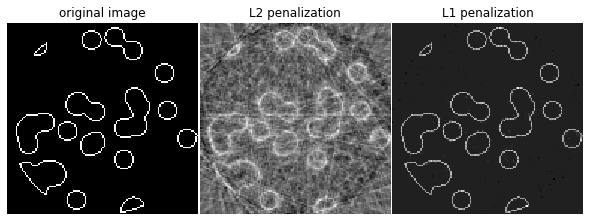

In [51]:
# Author: Emmanuelle Gouillart <emmanuelle.gouillart@nsup.org>
# License: BSD 3 clause

import numpy as np
from scipy import sparse
from scipy import ndimage
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


def _weights(x, dx=1, orig=0):
    x = np.ravel(x)
    floor_x = np.floor((x - orig) / dx).astype(np.int64)
    alpha = (x - orig - floor_x * dx) / dx
    return np.hstack((floor_x, floor_x + 1)), np.hstack((1 - alpha, alpha))


def _generate_center_coordinates(l_x):
    X, Y = np.mgrid[:l_x, :l_x].astype(np.float64)
    center = l_x / 2.0
    X += 0.5 - center
    Y += 0.5 - center
    return X, Y


def build_projection_operator(l_x, n_dir):
    """Compute the tomography design matrix.

    Parameters
    ----------

    l_x : int
        linear size of image array

    n_dir : int
        number of angles at which projections are acquired.

    Returns
    -------
    p : sparse matrix of shape (n_dir l_x, l_x**2)
    """
    X, Y = _generate_center_coordinates(l_x)
    angles = np.linspace(0, np.pi, n_dir, endpoint=False)
    data_inds, weights, camera_inds = [], [], []
    data_unravel_indices = np.arange(l_x ** 2)
    data_unravel_indices = np.hstack((data_unravel_indices, data_unravel_indices))
    for i, angle in enumerate(angles):
        Xrot = np.cos(angle) * X - np.sin(angle) * Y
        inds, w = _weights(Xrot, dx=1, orig=X.min())
        mask = np.logical_and(inds >= 0, inds < l_x)
        weights += list(w[mask])
        camera_inds += list(inds[mask] + i * l_x)
        data_inds += list(data_unravel_indices[mask])
    proj_operator = sparse.coo_matrix((weights, (camera_inds, data_inds)))
    return proj_operator


def generate_synthetic_data():
    """Synthetic binary data"""
    rs = np.random.RandomState(0)
    n_pts = 36
    x, y = np.ogrid[0:l, 0:l]
    mask_outer = (x - l / 2.0) ** 2 + (y - l / 2.0) ** 2 < (l / 2.0) ** 2
    mask = np.zeros((l, l))
    points = l * rs.rand(2, n_pts)
    mask[(points[0]).astype(int), (points[1]).astype(int)] = 1
    mask = ndimage.gaussian_filter(mask, sigma=l / n_pts)
    res = np.logical_and(mask > mask.mean(), mask_outer)
    return np.logical_xor(res, ndimage.binary_erosion(res))


# Generate synthetic images, and projections
l = 128
proj_operator = build_projection_operator(l, l // 7)
data = generate_synthetic_data()
proj = proj_operator @ data.ravel()[:, np.newaxis]
proj += 0.15 * np.random.randn(*proj.shape)

# Reconstruction with L2 (Ridge) penalization
rgr_ridge = Ridge(alpha=0.2)
rgr_ridge.fit(proj_operator, proj.ravel())
rec_l2 = rgr_ridge.coef_.reshape(l, l)

# Reconstruction with L1 (Lasso) penalization
# the best value of alpha was determined using cross validation
# with LassoCV
rgr_lasso = Lasso(alpha=0.001)
rgr_lasso.fit(proj_operator, proj.ravel())
rec_l1 = rgr_lasso.coef_.reshape(l, l)

plt.figure(figsize=(8, 3.3))
plt.subplot(131)
plt.imshow(data, cmap=plt.cm.gray, interpolation="nearest")
plt.axis("off")
plt.title("original image")
plt.subplot(132)
plt.imshow(rec_l2, cmap=plt.cm.gray, interpolation="nearest")
plt.title("L2 penalization")
plt.axis("off")
plt.subplot(133)
plt.imshow(rec_l1, cmap=plt.cm.gray, interpolation="nearest")
plt.title("L1 penalization")
plt.axis("off")

plt.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0, right=1)

plt.show()

**Total running time of the script:** ( 0 minutes 10.429 seconds)

#Common pitfalls in the interpretation of coefficients of linear models

In linear models, the target value is modeled as a linear combination of the features (see the Linear Models User Guide section for a description of a set of linear models available in scikit-learn). Coefficients in multiple linear models represent the relationship between the given feature,  and the target, , assuming that all the other features remain constant (conditional dependence). This is different from plotting  versus  and fitting a linear relationship: in that case all possible values of the other features are taken into account in the estimation (marginal dependence).

This example will provide some hints in interpreting coefficient in linear models, pointing at problems that arise when either the linear model is not appropriate to describe the dataset, or when features are correlated.

We will use data from the “Current Population Survey” from 1985 to predict wage as a function of various features such as experience, age, or education.



*   [The dataset: wages](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-dataset-wages)
*   [The machine-learning pipeline](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-machine-learning-pipeline)
*   [Processing the dataset](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#processing-the-dataset)
*   [Interpreting coefficients: scale matters](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#interpreting-coefficients-scale-matters)
*   [Checking the variability of the coefficients](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#checking-the-variability-of-the-coefficients)
*   [The problem of correlated variables](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-problem-of-correlated-variables)
*   [Preprocessing numerical variables](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#preprocessing-numerical-variables)
*   [Linear models with regularization](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#linear-models-with-regularization)
*   [Linear models with sparse coefficients](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#linear-models-with-sparse-coefficients)
*   [Lessons learned](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#lessons-learned)







In [52]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**[The dataset: wages](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-dataset-wages)**

We fetch the data from OpenML. Note that setting the parameter as_frame to True will retrieve the data as a pandas dataframe.

In [53]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)

Then, we identify features X and targets y: the column WAGE is our target variable (i.e., the variable which we want to predict).

In [54]:
X = survey.data[survey.feature_names]
X.describe(include="all")

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
count,534.000000,534,534,534.000000,534,534.000000,534,534,534,534
unique,NaN,2,2,NaN,2,NaN,3,6,3,2
top,NaN,no,male,NaN,not_member,NaN,White,Other,Other,Married
freq,NaN,378,289,NaN,438,NaN,440,156,411,350
mean,13.018727,NaN,NaN,17.822097,NaN,36.833333,NaN,NaN,NaN,NaN
std,2.615373,NaN,NaN,12.379710,NaN,11.726573,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN
25%,12.000000,NaN,NaN,8.000000,NaN,28.000000,NaN,NaN,NaN,NaN
50%,12.000000,NaN,NaN,15.000000,NaN,35.000000,NaN,NaN,NaN,NaN
75%,15.000000,NaN,NaN,26.000000,NaN,44.000000,NaN,NaN,NaN,NaN


Note that the dataset contains categorical and numerical variables. We will need to take this into account when preprocessing the dataset thereafter.

In [55]:
X.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8.0,no,female,21.0,not_member,35.0,Hispanic,Other,Manufacturing,Married
1,9.0,no,female,42.0,not_member,57.0,White,Other,Manufacturing,Married
2,12.0,no,male,1.0,not_member,19.0,White,Other,Manufacturing,Unmarried
3,12.0,no,male,4.0,not_member,22.0,White,Other,Other,Unmarried
4,12.0,no,male,17.0,not_member,35.0,White,Other,Other,Married


Our target for prediction: the wage. Wages are described as floating-point number in dollars per hour.

In [56]:
y = survey.target.values.ravel()
survey.target.head()

0    5.10
1    4.95
2    6.67
3    4.00
4    7.50
Name: WAGE, dtype: float64

Out:

0    5.10

1    4.95

2    6.67

3    4.00

4    7.50

Name: WAGE, dtype: float64

We split the sample into a train and a test dataset. Only the train dataset will be used in the following exploratory analysis. This is a way to emulate a real situation where predictions are performed on an unknown target, and we don’t want our analysis and decisions to be biased by our knowledge of the test data.

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

First, let’s get some insights by looking at the variable distributions and at the pairwise relationships between them. Only numerical variables will be used. In the following plot, each dot represents a sample.

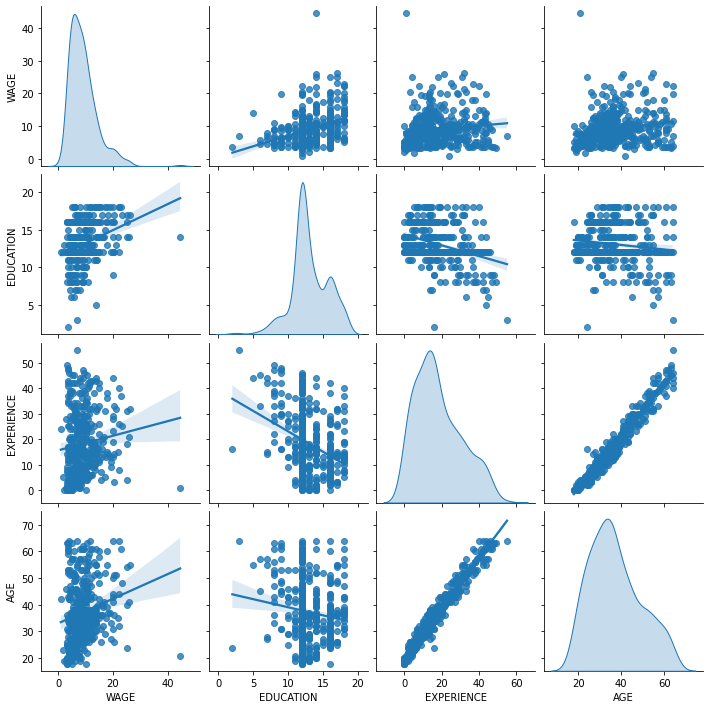

In [58]:
train_dataset = X_train.copy()
train_dataset.insert(0, "WAGE", y_train)
_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

Looking closely at the WAGE distribution reveals that it has a long tail. For this reason, we should take its logarithm to turn it approximately into a normal distribution (linear models such as ridge or lasso work best for a normal distribution of error).

The WAGE is increasing when EDUCATION is increasing. Note that the dependence between WAGE and EDUCATION represented here is a marginal dependence, i.e., it describes the behavior of a specific variable without keeping the others fixed.

Also, the EXPERIENCE and AGE are strongly linearly correlated.

**[The machine-learning pipeline](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-machine-learning-pipeline)**

To design our machine-learning pipeline, we first manually check the type of data that we are dealing with:

In [59]:
survey.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    float64 
 1   SOUTH       534 non-null    category
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    float64 
 4   UNION       534 non-null    category
 5   AGE         534 non-null    float64 
 6   RACE        534 non-null    category
 7   OCCUPATION  534 non-null    category
 8   SECTOR      534 non-null    category
 9   MARR        534 non-null    category
dtypes: category(7), float64(3)
memory usage: 17.1 KB


Out:

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 534 entries, 0 to 533

Data columns (total 10 columns):

 '#'   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   EDUCATION   534 non-null    float64

 1   SOUTH       534 non-null    category

 2   SEX         534 non-null    category

 3   EXPERIENCE  534 non-null    float64

 4   UNION       534 non-null    category

 5   AGE         534 non-null    float64

 6   RACE        534 non-null    category

 7   OCCUPATION  534 non-null    category

 8   SECTOR      534 non-null    category

 9   MARR        534 non-null    category

dtypes: category(7), float64(3)

memory usage: 17.2 KB

As seen previously, the dataset contains columns with different data types and we need to apply a specific preprocessing for each data types. In particular categorical variables cannot be included in linear model if not coded as integers first. In addition, to avoid categorical features to be treated as ordered values, we need to one-hot-encode them. Our pre-processor will

*   one-hot encode (i.e., generate a column by category) the categorical columns;
*   as a first approach (we will see after how the normalisation of numerical values will affect our discussion), keep numerical values as they are.



In [60]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["RACE", "OCCUPATION", "SECTOR", "MARR", "UNION", "SEX", "SOUTH"]
numerical_columns = ["EDUCATION", "EXPERIENCE", "AGE"]

preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,
)

To describe the dataset as a linear model we use a ridge regressor with a very small regularization and to model the logarithm of the WAGE.

In [61]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=sp.special.exp10
    ),
)

**[Processing the dataset](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#processing-the-dataset)**

First, we fit the model.

In [62]:
_ = model.fit(X_train, y_train)

Then we check the performance of the computed model plotting its predictions on the test set and computing, for example, the median absolute error of the model.

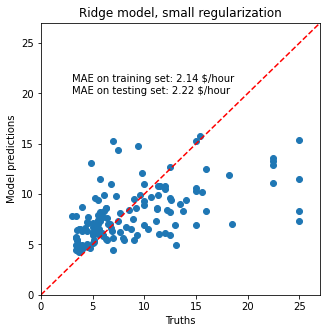

In [63]:
from sklearn.metrics import median_absolute_error

y_pred = model.predict(X_train)

mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} $/hour"
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} $/hour"
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title("Ridge model, small regularization")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

The model learnt is far from being a good model making accurate predictions: this is obvious when looking at the plot above, where good predictions should lie on the red line.

In the following section, we will interpret the coefficients of the model. While we do so, we should keep in mind that any conclusion we draw is about the model that we build, rather than about the true (real-world) generative process of the data.

**[Interpreting coefficients: scale matters](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#interpreting-coefficients-scale-matters)**

First of all, we can take a look to the values of the coefficients of the regressor we have fitted.

In [64]:
feature_names = model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model.named_steps["transformedtargetregressor"].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
RACE_Hispanic,-0.013555
RACE_Other,-0.009111
RACE_White,0.022558
OCCUPATION_Clerical,0.000056
OCCUPATION_Management,0.090539
OCCUPATION_Other,-0.025091
OCCUPATION_Professional,0.071975
OCCUPATION_Sales,-0.046625
OCCUPATION_Service,-0.091042
SECTOR_Construction,-0.000177


The AGE coefficient is expressed in “dollars/hour per living years” while the EDUCATION one is expressed in “dollars/hour per years of education”. This representation of the coefficients has the benefit of making clear the practical predictions of the model: an increase of 1 year in AGE means a decrease of 0.030867 dollars/hour, while an increase of 1 year in EDUCATION means an increase of 0.054699 dollars/hour. On the other hand, categorical variables (as UNION or SEX) are adimensional numbers taking either the value 0 or 1. Their coefficients are expressed in dollars/hour. Then, we cannot compare the magnitude of different coefficients since the features have different natural scales, and hence value ranges, because of their different unit of measure. This is more visible if we plot the coefficients.

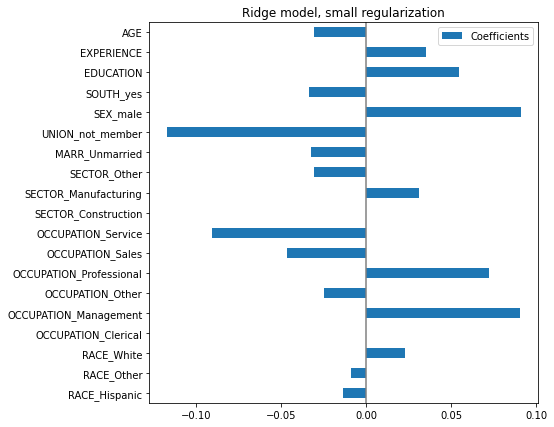

In [65]:
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Indeed, from the plot above the most important factor in determining WAGE appears to be the variable UNION, even if our intuition might tell us that variables like EXPERIENCE should have more impact.

Looking at the coefficient plot to gauge feature importance can be misleading as some of them vary on a small scale, while others, like AGE, varies a lot more, several decades.

This is visible if we compare the standard deviations of different features.

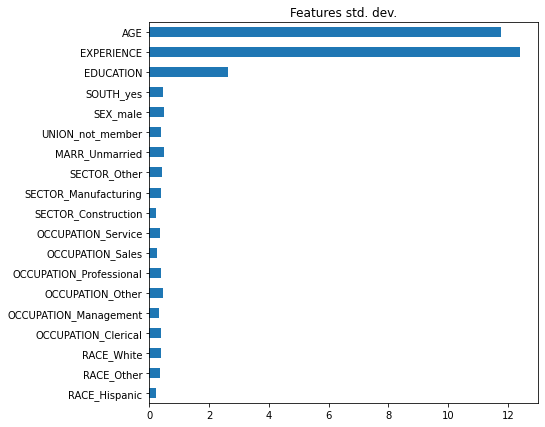

In [66]:
X_train_preprocessed = pd.DataFrame(
    model.named_steps["columntransformer"].transform(X_train), columns=feature_names
)

X_train_preprocessed.std(axis=0).plot(kind="barh", figsize=(9, 7))
plt.title("Features std. dev.")
plt.subplots_adjust(left=0.3)

Multiplying the coefficients by the standard deviation of the related feature would reduce all the coefficients to the same unit of measure. As we will see after this is equivalent to normalize numerical variables to their standard deviation, as y = \sum{coef_i \times X_i} =
\sum{(coef_i \times std_i) \times (X_i / std_i)}.

In that way, we emphasize that the greater the variance of a feature, the larger the weight of the corresponding coefficient on the output, all else being equal.

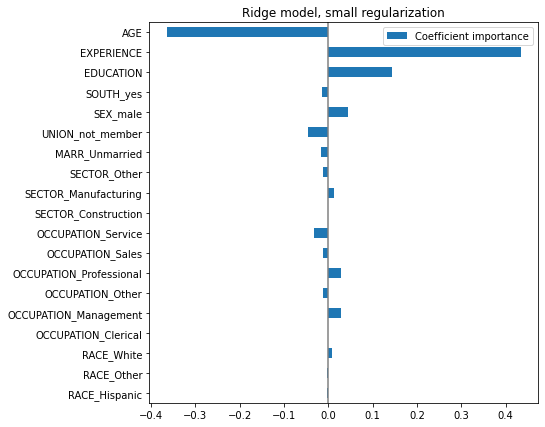

In [67]:
coefs = pd.DataFrame(
    model.named_steps["transformedtargetregressor"].regressor_.coef_
    * X_train_preprocessed.std(axis=0),
    columns=["Coefficient importance"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Now that the coefficients have been scaled, we can safely compare them.

**Warning** : Why does the plot above suggest that an increase in age leads to a decrease in wage? Why the initial pairplot is telling the opposite?

The plot above tells us about dependencies between a specific feature and the target when all other features remain constant, i.e., **conditional dependencies**. An increase of the AGE will induce a decrease of the WAGE when all other features remain constant. On the contrary, an increase of the EXPERIENCE will induce an increase of the WAGE when all other features remain constant. Also, AGE, EXPERIENCE and EDUCATION are the three variables that most influence the model.

**[Checking the variability of the coefficients](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#checking-the-variability-of-the-coefficients)**

We can check the coefficient variability through cross-validation: it is a form of data perturbation (related to resampling).

If coefficients vary significantly when changing the input dataset their robustness is not guaranteed, and they should probably be interpreted with caution.

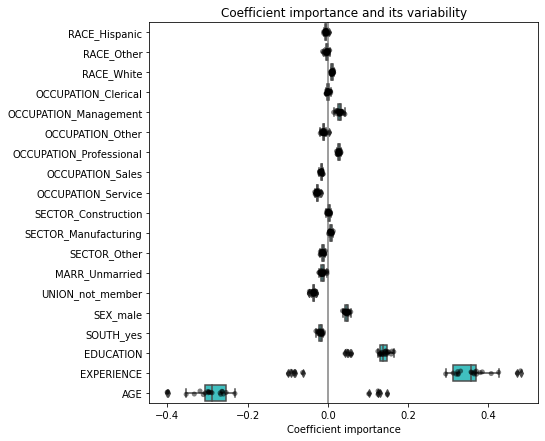

In [68]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

cv_model = cross_validate(
    model,
    X,
    y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True,
    n_jobs=-1,
)
coefs = pd.DataFrame(
    [
        est.named_steps["transformedtargetregressor"].regressor_.coef_
        * X_train_preprocessed.std(axis=0)
        for est in cv_model["estimator"]
    ],
    columns=feature_names,
)
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.subplots_adjust(left=0.3)

**[The problem of correlated variables](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-problem-of-correlated-variables)**

The AGE and EXPERIENCE coefficients are affected by strong variability which might be due to the collinearity between the 2 features: as AGE and EXPERIENCE vary together in the data, their effect is difficult to tease apart.

To verify this interpretation we plot the variability of the AGE and EXPERIENCE coefficient.

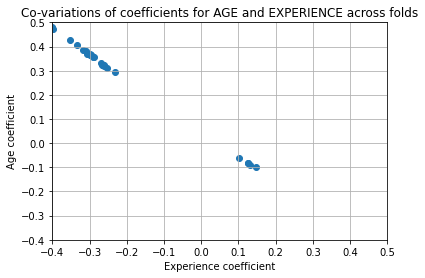

In [69]:
plt.ylabel("Age coefficient")
plt.xlabel("Experience coefficient")
plt.grid(True)
plt.xlim(-0.4, 0.5)
plt.ylim(-0.4, 0.5)
plt.scatter(coefs["AGE"], coefs["EXPERIENCE"])
_ = plt.title("Co-variations of coefficients for AGE and EXPERIENCE across folds")

wo regions are populated: when the EXPERIENCE coefficient is positive the AGE one is negative and vice-versa.

To go further we remove one of the 2 features and check what is the impact on the model stability.

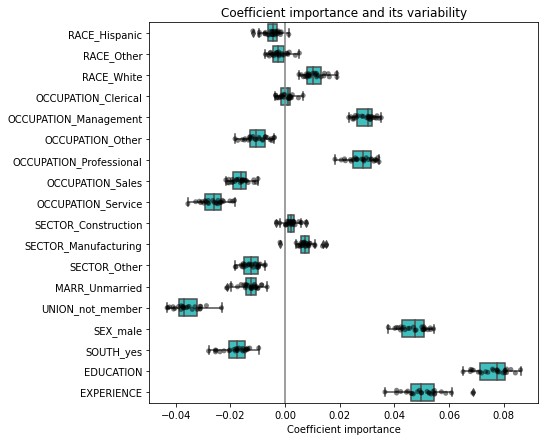

In [70]:
column_to_drop = ["AGE"]

cv_model = cross_validate(
    model,
    X.drop(columns=column_to_drop),
    y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True,
    n_jobs=-1,
)
coefs = pd.DataFrame(
    [
        est.named_steps["transformedtargetregressor"].regressor_.coef_
        * X_train_preprocessed.drop(columns=column_to_drop).std(axis=0)
        for est in cv_model["estimator"]
    ],
    columns=feature_names[:-1],
)
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color=".5")
plt.title("Coefficient importance and its variability")
plt.xlabel("Coefficient importance")
plt.subplots_adjust(left=0.3)

The estimation of the EXPERIENCE coefficient is now less variable and remain important for all models trained during cross-validation.

**[Preprocessing numerical variables](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#preprocessing-numerical-variables)**

As said above (see “[The machine-learning pipeline](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-pipeline)”), we could also choose to scale numerical values before training the model. This can be useful to apply a similar amount regularization to all of them in the Ridge. The preprocessor is redefined in order to subtract the mean and scale variables to unit variance.

In [71]:
from sklearn.preprocessing import StandardScaler

preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), categorical_columns),
    (StandardScaler(), numerical_columns),
    remainder="passthrough",
)

The model will stay unchanged.

In [72]:
model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=sp.special.exp10
    ),
)

_ = model.fit(X_train, y_train)

Again, we check the performance of the computed model using, for example, the median absolute error of the model and the R squared coefficient.

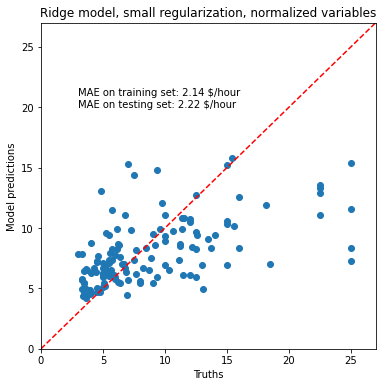

In [73]:
y_pred = model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} $/hour"
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} $/hour"
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(3, 20, string_score)

plt.title("Ridge model, small regularization, normalized variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

For the coefficient analysis, scaling is not needed this time.

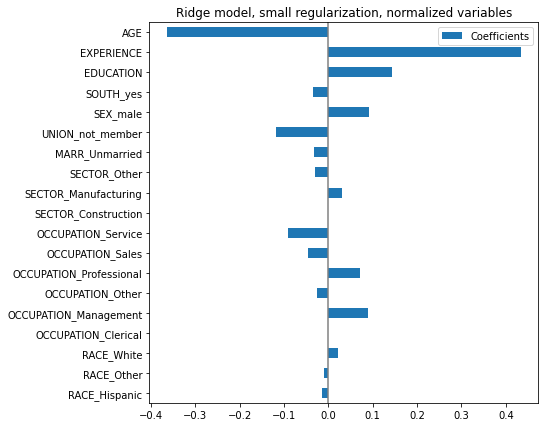

In [74]:
coefs = pd.DataFrame(
    model.named_steps["transformedtargetregressor"].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model, small regularization, normalized variables")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

We now inspect the coefficients across several cross-validation folds.

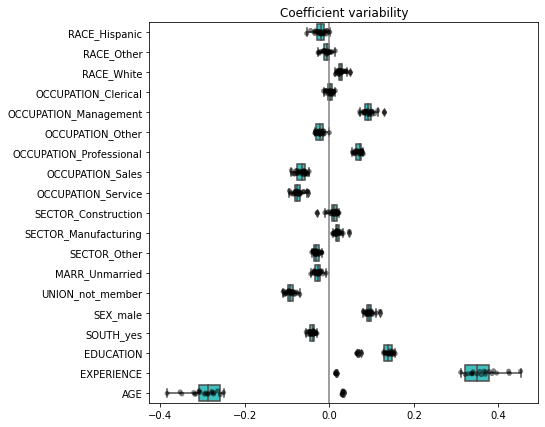

In [75]:
cv_model = cross_validate(
    model,
    X,
    y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True,
    n_jobs=-1,
)
coefs = pd.DataFrame(
    [
        est.named_steps["transformedtargetregressor"].regressor_.coef_
        for est in cv_model["estimator"]
    ],
    columns=feature_names,
)
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color=".5")
plt.title("Coefficient variability")
plt.subplots_adjust(left=0.3)

The result is quite similar to the non-normalized case.

**[Linear models with regularization](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#linear-models-with-regularization)**

In machine-learning practice, Ridge Regression is more often used with non-negligible regularization.

Above, we limited this regularization to a very little amount. Regularization improves the conditioning of the problem and reduces the variance of the estimates. RidgeCV applies cross validation in order to determine which value of the regularization parameter (alpha) is best suited for prediction.

In [76]:
from sklearn.linear_model import RidgeCV

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=RidgeCV(alphas=np.logspace(-10, 10, 21)),
        func=np.log10,
        inverse_func=sp.special.exp10,
    ),
)

_ = model.fit(X_train, y_train)

First we check which value of  has been selected.

In [77]:
model[-1].regressor_.alpha_

10.0

Out:

10.0

Then we check the quality of the predictions.

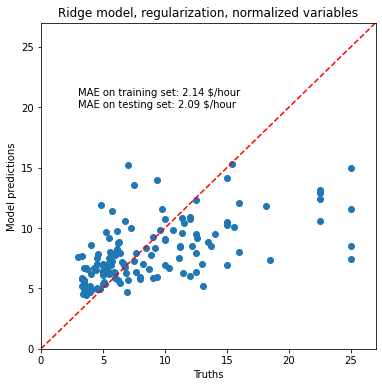

In [78]:
y_pred = model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} $/hour"
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} $/hour"

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(3, 20, string_score)

plt.title("Ridge model, regularization, normalized variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

The ability to reproduce the data of the regularized model is similar to the one of the non-regularized model.

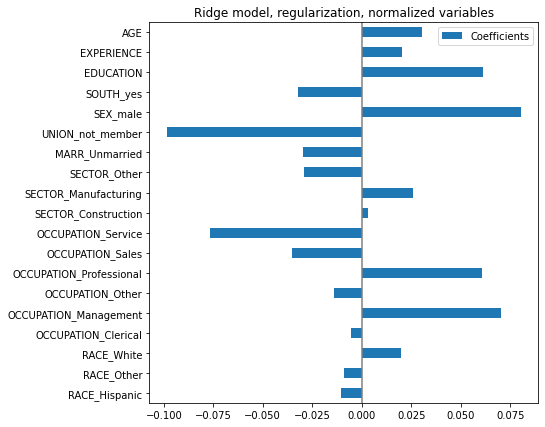

In [79]:
coefs = pd.DataFrame(
    model.named_steps["transformedtargetregressor"].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model, regularization, normalized variables")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

The coefficients are significantly different. AGE and EXPERIENCE coefficients are both positive but they now have less influence on the prediction.

The regularization reduces the influence of correlated variables on the model because the weight is shared between the two predictive variables, so neither alone would have strong weights.

On the other hand, the weights obtained with regularization are more stable (see the [Ridge regression and classification](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression) User Guide section). This increased stability is visible from the plot, obtained from data perturbations, in a cross validation. This plot can be compared with the [previous one](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#covariation).

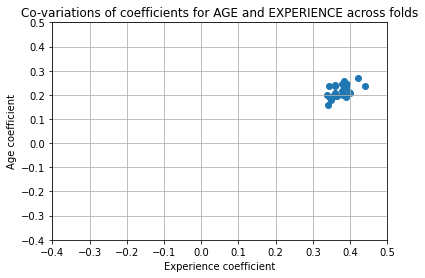

In [80]:
cv_model = cross_validate(
    model,
    X,
    y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True,
    n_jobs=-1,
)
coefs = pd.DataFrame(
    [
        est.named_steps["transformedtargetregressor"].regressor_.coef_
        * X_train_preprocessed.std(axis=0)
        for est in cv_model["estimator"]
    ],
    columns=feature_names,
)

plt.ylabel("Age coefficient")
plt.xlabel("Experience coefficient")
plt.grid(True)
plt.xlim(-0.4, 0.5)
plt.ylim(-0.4, 0.5)
plt.scatter(coefs["AGE"], coefs["EXPERIENCE"])
_ = plt.title("Co-variations of coefficients for AGE and EXPERIENCE across folds")

**[Linear models with sparse coefficients](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#linear-models-with-sparse-coefficients)**

Another possibility to take into account correlated variables in the dataset, is to estimate sparse coefficients. In some way we already did it manually when we dropped the AGE column in a previous Ridge estimation.

Lasso models (see the Lasso User Guide section) estimates sparse coefficients. LassoCV applies cross validation in order to determine which value of the regularization parameter (alpha) is best suited for the model estimation.

In [81]:
from sklearn.linear_model import LassoCV

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=LassoCV(alphas=np.logspace(-10, 10, 21), max_iter=100000),
        func=np.log10,
        inverse_func=sp.special.exp10,
    ),
)

_ = model.fit(X_train, y_train)

First we verify which value of  has been selected.

In [82]:
model[-1].regressor_.alpha_

0.001

Out:

0.001

Then we check the quality of the predictions.

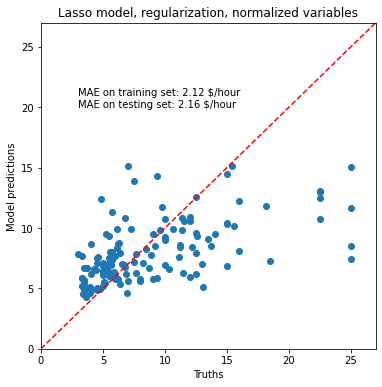

In [83]:
y_pred = model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} $/hour"
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} $/hour"

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(3, 20, string_score)

plt.title("Lasso model, regularization, normalized variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

For our dataset, again the model is not very predictive.

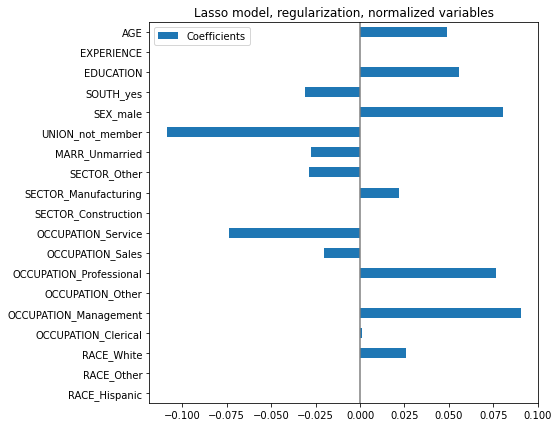

In [84]:
coefs = pd.DataFrame(
    model.named_steps["transformedtargetregressor"].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Lasso model, regularization, normalized variables")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

A Lasso model identifies the correlation between AGE and EXPERIENCE and suppresses one of them for the sake of the prediction.

It is important to keep in mind that the coefficients that have been dropped may still be related to the outcome by themselves: the model chose to suppress them because they bring little or no additional information on top of the other features. Additionally, this selection is unstable for correlated features, and should be interpreted with caution.

**[Lessons learned](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#lessons-learned)**

*   Coefficients must be scaled to the same unit of measure to retrieve feature importance. Scaling them with the standard-deviation of the feature is a useful proxy.
*   Coefficients in multivariate linear models represent the dependency between a given feature and the target, **conditional** on the other features.
*   Correlated features induce instabilities in the coefficients of linear models and their effects cannot be well teased apart.
*   Different linear models respond differently to feature correlation and coefficients could significantly vary from one another.
*   Inspecting coefficients across the folds of a cross-validation loop gives an idea of their stability.



**Total running time of the script:** ( 0 minutes 13.022 seconds)

#**1.3.1. Setting regularization parameter**

The alpha parameter controls the degree of sparsity of the estimated coefficients.

#**1.3.1.1. Using cross-validation**

scikit-learn exposes objects that set the Lasso alpha parameter by cross-validation: [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV) and [LassoLarsCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsCV.html#sklearn.linear_model.LassoLarsCV). [LassoLarsCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsCV.html#sklearn.linear_model.LassoLarsCV) is based on the [Least Angle Regression](https://scikit-learn.org/stable/modules/linear_model.html#least-angle-regression) algorithm explained below.

For high-dimensional datasets with many collinear features, [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV) is most often preferable. However, [LassoLarsCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsCV.html#sklearn.linear_model.LassoLarsCV) has the advantage of exploring more relevant values of alpha parameter, and if the number of samples is very small compared to the number of features, it is often faster than [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV).

https://scikit-learn.org/stable/_images/sphx_glr_plot_lasso_model_selection_002.png https://scikit-learn.org/stable/_images/sphx_glr_plot_lasso_model_selection_003.png



#**1.3.1.2. Information-criteria based model selection**

Alternatively, the estimator [LassoLarsIC](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsIC.html#sklearn.linear_model.LassoLarsIC) proposes to use the Akaike information criterion (AIC) and the Bayes Information criterion (BIC). It is a computationally cheaper alternative to find the optimal value of alpha as the regularization path is computed only once instead of k+1 times when using k-fold cross-validation. However, such criteria needs a proper estimation of the degrees of freedom of the solution, are derived for large samples (asymptotic results) and assume the model is correct, i.e. that the data are generated by this model. They also tend to break when the problem is badly conditioned (more features than samples).

https://scikit-learn.org/stable/_images/sphx_glr_plot_lasso_model_selection_001.png

#**1.4. Multi-task Lasso**

The [MultiTaskLasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskLasso.html#sklearn.linear_model.MultiTaskLasso) is a linear model that estimates sparse coefficients for multiple regression problems jointly: y is a 2D array, of shape (n_samples, n_tasks). The constraint is that the selected features are the same for all the regression problems, also called tasks.

The following figure compares the location of the non-zero entries in the coefficient matrix W obtained with a simple Lasso or a MultiTaskLasso. The Lasso estimates yield scattered non-zeros while the non-zeros of the MultiTaskLasso are full columns.

https://scikit-learn.org/stable/_images/sphx_glr_plot_multi_task_lasso_support_001.png https://scikit-learn.org/stable/_images/sphx_glr_plot_multi_task_lasso_support_002.png

**Fitting a time-series model, imposing that any active feature be active at all times.**

**Examples:**

*  [Joint feature selection with multi-task Lasso](https://scikit-learn.org/stable/auto_examples/linear_model/plot_multi_task_lasso_support.html#sphx-glr-auto-examples-linear-model-plot-multi-task-lasso-support-py)



#Joint feature selection with multi-task Lasso

The multi-task lasso allows to fit multiple regression problems jointly enforcing the selected features to be the same across tasks. This example simulates sequential measurements, each task is a time instant, and the relevant features vary in amplitude over time while being the same. The multi-task lasso imposes that features that are selected at one time point are select for all time point. This makes feature selection by the Lasso more stable.

https://scikit-learn.org/stable/_images/sphx_glr_plot_multi_task_lasso_support_001.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_multi_task_lasso_support_002.png


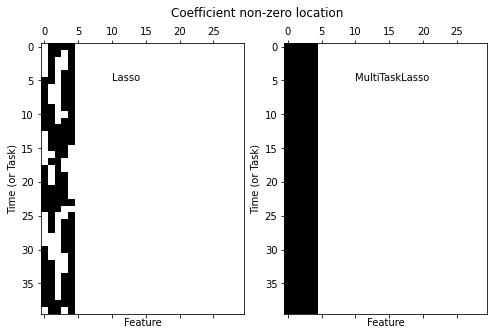

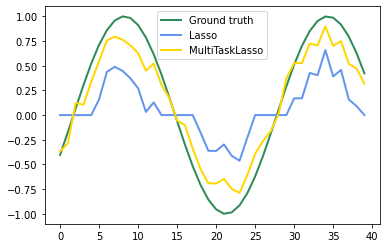

In [85]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import MultiTaskLasso, Lasso

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1.0 + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.0).fit(X, Y).coef_

# #############################################################################
# Plot support and time series
fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "Lasso")
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "MultiTaskLasso")
fig.suptitle("Coefficient non-zero location")

feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color="seagreen", linewidth=lw, label="Ground truth")
plt.plot(
    coef_lasso_[:, feature_to_plot], color="cornflowerblue", linewidth=lw, label="Lasso"
)
plt.plot(
    coef_multi_task_lasso_[:, feature_to_plot],
    color="gold",
    linewidth=lw,
    label="MultiTaskLasso",
)
plt.legend(loc="upper center")
plt.axis("tight")
plt.ylim([-1.1, 1.1])
plt.show()

**Total running time of the script:** ( 0 minutes 0.390 seconds)



Mathematically, it consists of a linear model trained with a mixed \ell_1 \ell_2 -norm for regularization. The objective function to minimize is:

\min_{W} { \frac{1}{2n_{\text{samples}}} ||X W - Y||_{\text{Fro}} ^ 2 + \alpha ||W||_{21}}
 
where \text{Fro} indicates the Frobenius norm

||A||_{\text{Fro}} = \sqrt{\sum_{ij} a_{ij}^2}

and \ell_1 \ell_2 reads

||A||_{2 1} = \sum_i \sqrt{\sum_j a_{ij}^2}.
 
The implementation in the class [MultiTaskLasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskLasso.html#sklearn.linear_model.MultiTaskLasso) uses coordinate descent as the algorithm to fit the coefficients.

#**1.5. Elastic-Net**

[ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) is a linear regression model trained with both \ell_1 and \ell_2 -norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like [Lasso,](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) while still maintaining the regularization properties of [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge). We control the convex combination of \ell_1 and \ell_2 using the l1_ratio parameter.

Elastic-net is useful when there are multiple features that are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is that it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

The objective function to minimize is in this case

\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}
 
https://scikit-learn.org/stable/_images/sphx_glr_plot_lasso_coordinate_descent_path_001.png

The class [ElasticNetCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV) can be used to set the parameters alpha (\alpha) and l1_ratio (\rho) by cross-validation.

**Examples:**

*  [Lasso and Elastic Net for Sparse Signals](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html#sphx-glr-auto-examples-linear-model-plot-lasso-and-elasticnet-py)
*  [Lasso and Elastic Net](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py)

The following two references explain the iterations used in the coordinate descent solver of scikit-learn, as well as the duality gap computation used for convergence control.

**References**

*  “Regularization Path For Generalized linear Models by Coordinate Descent”, Friedman, Hastie & Tibshirani, J Stat Softw, 2010 ([Paper](https://www.jstatsoft.org/article/view/v033i01/v33i01.pdf)).
*  “An Interior-Point Method for Large-Scale L1-Regularized Least Squares,” S. J. Kim, K. Koh, M. Lustig, S. Boyd and D. Gorinevsky, in IEEE Journal of Selected Topics in Signal Processing, 2007 ([Paper](https://web.stanford.edu/~boyd/papers/pdf/l1_ls.pdf))

#Lasso and Elastic Net for Sparse Signals

Estimates Lasso and Elastic-Net regression models on a manually generated sparse signal corrupted with an additive noise. Estimated coefficients are compared with the ground-truth.

https://scikit-learn.org/stable/_images/sphx_glr_plot_lasso_and_elasticnet_001.png



Out:

Lasso(alpha=0.1)

r^2 on test data : 0.658064

ElasticNet(alpha=0.1, l1_ratio=0.7)

r^2 on test data : 0.642515

Lasso(alpha=0.1)
r^2 on test data : 0.658064
ElasticNet(alpha=0.1, l1_ratio=0.7)
r^2 on test data : 0.642515


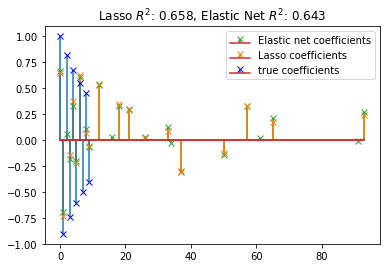

In [86]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

# #############################################################################
# Generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

# Decreasing coef w. alternated signs for visualization
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef
y = np.dot(X, coef)

# Add noise
y += 0.01 * np.random.normal(size=n_samples)

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[: n_samples // 2], y[: n_samples // 2]
X_test, y_test = X[n_samples // 2 :], y[n_samples // 2 :]

# #############################################################################
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

# #############################################################################
# ElasticNet
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

m, s, _ = plt.stem(
    np.where(enet.coef_)[0],
    enet.coef_[enet.coef_ != 0],
    markerfmt="x",
    label="Elastic net coefficients",
    use_line_collection=True,
)
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(
    np.where(lasso.coef_)[0],
    lasso.coef_[lasso.coef_ != 0],
    markerfmt="x",
    label="Lasso coefficients",
    use_line_collection=True,
)
plt.setp([m, s], color="#ff7f0e")
plt.stem(
    np.where(coef)[0],
    coef[coef != 0],
    label="true coefficients",
    markerfmt="bx",
    use_line_collection=True,
)

plt.legend(loc="best")
plt.title(
    "Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f" % (r2_score_lasso, r2_score_enet)
)
plt.show()

**Total running time of the script:** ( 0 minutes 0.168 seconds)

#Lasso and Elastic Net

Lasso and elastic net (L1 and L2 penalisation) implemented using a coordinate descent.

The coefficients can be forced to be positive.

https://scikit-learn.org/stable/_images/sphx_glr_plot_lasso_coordinate_descent_path_001.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_lasso_coordinate_descent_path_002.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_lasso_coordinate_descent_path_003.png

Out:

Computing regularization path using the lasso...

Computing regularization path using the positive lasso...

Computing regularization path using the elastic net...

Computing regularization path using the positive elastic net...


Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


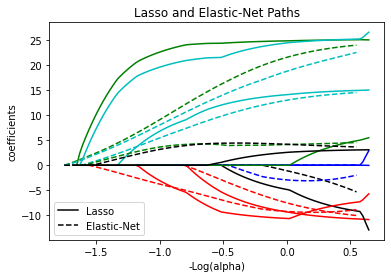

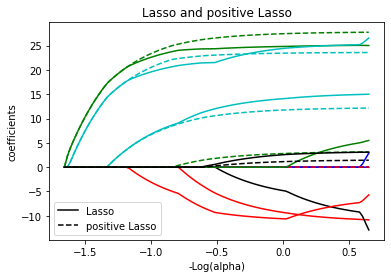

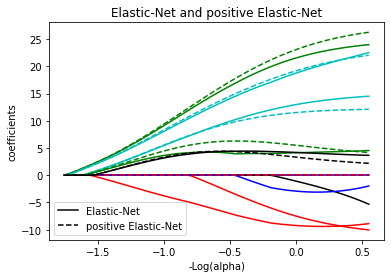

In [87]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets


X, y = datasets.load_diabetes(return_X_y=True)


X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True
)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True
)

# Display results

plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="lower left")
plt.axis("tight")


plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and positive Lasso")
plt.legend((l1[-1], l2[-1]), ("Lasso", "positive Lasso"), loc="lower left")
plt.axis("tight")


plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Elastic-Net and positive Elastic-Net")
plt.legend((l1[-1], l2[-1]), ("Elastic-Net", "positive Elastic-Net"), loc="lower left")
plt.axis("tight")
plt.show()

**Total running time of the script:** ( 0 minutes 0.494 seconds)

#**1.6. Multi-task Elastic-Net**

The [MultiTaskElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskElasticNet.html#sklearn.linear_model.MultiTaskElasticNet) is an elastic-net model that estimates sparse coefficients for multiple regression problems jointly: Y is a 2D array of shape (n_samples, n_tasks). The constraint is that the selected features are the same for all the regression problems, also called tasks.

Mathematically, it consists of a linear model trained with a mixed \ell_1 \ell_2 -norm and \ell_2 -norm for regularization. The objective function to minimize is:

\min_{W} { \frac{1}{2n_{\text{samples}}} ||X W - Y||_{\text{Fro}}^2 + \alpha \rho ||W||_{2 1} +
\frac{\alpha(1-\rho)}{2} ||W||_{\text{Fro}}^2}
 
The implementation in the class [MultiTaskElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskElasticNet.html#sklearn.linear_model.MultiTaskElasticNet) uses coordinate descent as the algorithm to fit the coefficients.

The class [MultiTaskElasticNetCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskElasticNetCV.html#sklearn.linear_model.MultiTaskElasticNetCV) can be used to set the parameters alpha (\alpha) and l1_ratio (\rho) by cross-validation.

#**1.7. Least Angle Regression**

Least-angle regression (LARS) is a regression algorithm for high-dimensional data, developed by Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani. LARS is similar to forward stepwise regression. At each step, it finds the feature most correlated with the target. When there are multiple features having equal correlation, instead of continuing along the same feature, it proceeds in a direction equiangular between the features.

The advantages of LARS are:

*  It is numerically efficient in contexts where the number of features is significantly greater than the number of samples.
*  It is computationally just as fast as forward selection and has the same order of complexity as ordinary least squares.
*  It produces a full piecewise linear solution path, which is useful in cross-validation or similar attempts to tune the model.
*  If two features are almost equally correlated with the target, then their coefficients should increase at approximately the same rate. The algorithm thus behaves as intuition would expect, and also is more stable.
*  It is easily modified to produce solutions for other estimators, like the Lasso.

The disadvantages of the LARS method include:

*  Because LARS is based upon an iterative refitting of the residuals, it would appear to be especially sensitive to the effects of noise. This problem is discussed in detail by Weisberg in the discussion section of the Efron et al. (2004) Annals of Statistics article.

The LARS model can be used using via the estimator [Lars](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lars.html#sklearn.linear_model.Lars), or its low-level implementation [lars_path](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lars_path.html#sklearn.linear_model.lars_path) or [lars_path_gram](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lars_path_gram.html#sklearn.linear_model.lars_path_gram).



#**1.8. LARS Lasso**

[LassoLars](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html#sklearn.linear_model.LassoLars) is a lasso model implemented using the LARS algorithm, and unlike the implementation based on coordinate descent, this yields the exact solution, which is piecewise linear as a function of the norm of its coefficients.

https://scikit-learn.org/stable/_images/sphx_glr_plot_lasso_lars_001.png



In [88]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1, normalize=False)
reg.fit([[0, 0], [1, 1]], [0, 1])
#LassoLars(alpha=0.1, normalize=False)
reg.coef_
#array([0.6..., 0.        ])

array([0.6, 0. ])

**Examples:**

*  [Lasso path using LARS](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html#sphx-glr-auto-examples-linear-model-plot-lasso-lars-py)

The Lars algorithm provides the full path of the coefficients along the regularization parameter almost for free, thus a common operation is to retrieve the path with one of the functions [lars_path](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lars_path.html#sklearn.linear_model.lars_path) or [lars_path_gram](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lars_path_gram.html#sklearn.linear_model.lars_path_gram).

#Lasso path using LARS

Computes Lasso Path along the regularization parameter using the LARS algorithm on the diabetes dataset. Each color represents a different feature of the coefficient vector, and this is displayed as a function of the regularization parameter.

https://scikit-learn.org/stable/_images/sphx_glr_plot_lasso_lars_001.png

Out:

Computing regularization path using the LARS ...

.

Computing regularization path using the LARS ...
.

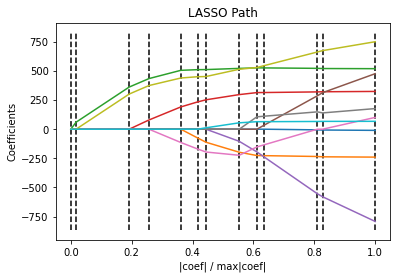

In [89]:
# Author: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True)

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method="lasso", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.show()

**Total running time of the script:** ( 0 minutes 0.126 seconds)

#**1.8.1. Mathematical formulation**

The algorithm is similar to forward stepwise regression, but instead of including features at each step, the estimated coefficients are increased in a direction equiangular to each one’s correlations with the residual.

Instead of giving a vector result, the LARS solution consists of a curve denoting the solution for each value of the \ell_1 norm of the parameter vector. The full coefficients path is stored in the array coef_path_ of shape (n_features, max_features + 1). The first column is always zero.

**References:**

*  Original Algorithm is detailed in the paper [Least Angle Regression](https://www-stat.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf) by Hastie et al.

#**1.9. Orthogonal Matching Pursuit (OMP)**

[OrthogonalMatchingPursuit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.OrthogonalMatchingPursuit.html#sklearn.linear_model.OrthogonalMatchingPursuit) and [orthogonal_mp](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.orthogonal_mp.html#sklearn.linear_model.orthogonal_mp) implements the OMP algorithm for approximating the fit of a linear model with constraints imposed on the number of non-zero coefficients (ie. the \ell_0 pseudo-norm).

Being a forward feature selection method like [Least Angle Regression](https://scikit-learn.org/stable/modules/linear_model.html#least-angle-regression), orthogonal matching pursuit can approximate the optimum solution vector with a fixed number of non-zero elements:

\underset{w}{\operatorname{arg\,min\,}}  ||y - Xw||_2^2 \text{ subject to } ||w||_0 \leq n_{\text{nonzero\_coefs}}

Alternatively, orthogonal matching pursuit can target a specific error instead of a specific number of non-zero coefficients. This can be expressed as:

\underset{w}{\operatorname{arg\,min\,}} ||w||_0 \text{ subject to } ||y-Xw||_2^2 \leq \text{tol}

OMP is based on a greedy algorithm that includes at each step the atom most highly correlated with the current residual. It is similar to the simpler matching pursuit (MP) method, but better in that at each iteration, the residual is recomputed using an orthogonal projection on the space of the previously chosen dictionary elements.

**Examples:**

*  [Orthogonal Matching Pursuit](https://scikit-learn.org/stable/auto_examples/linear_model/plot_omp.html#sphx-glr-auto-examples-linear-model-plot-omp-py)

**References:**

*  [https://www.cs.technion.ac.il/~ronrubin/Publications/KSVD-OMP-v2.pdf](https://www.cs.technion.ac.il/~ronrubin/Publications/KSVD-OMP-v2.pdf)
*  [Matching pursuits with time-frequency dictionaries](http://blanche.polytechnique.fr/~mallat/papiers/MallatPursuit93.pdf), S. G. Mallat, Z. Zhang,

#Orthogonal Matching Pursuit

Using orthogonal matching pursuit for recovering a sparse signal from a noisy measurement encoded with a dictionary

https://scikit-learn.org/stable/_images/sphx_glr_plot_omp_001.png

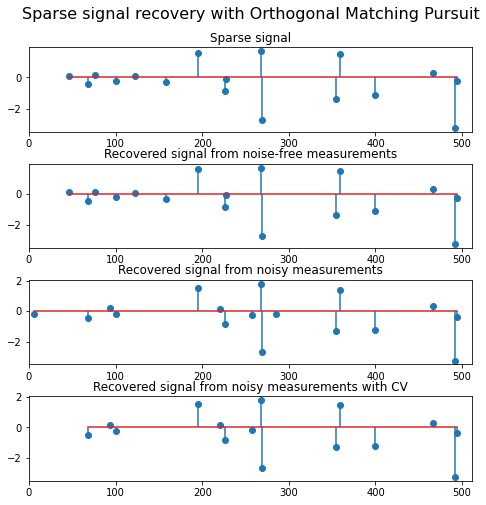

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

n_components, n_features = 512, 100
n_nonzero_coefs = 17

# generate the data

# y = Xw
# |x|_0 = n_nonzero_coefs

y, X, w = make_sparse_coded_signal(
    n_samples=1,
    n_components=n_components,
    n_features=n_features,
    n_nonzero_coefs=n_nonzero_coefs,
    random_state=0,
)

(idx,) = w.nonzero()

# distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

# plot the sparse signal
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx], use_line_collection=True)

# plot the noise-free reconstruction
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs, normalize=False)
omp.fit(X, y)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

# plot the noisy reconstruction
omp.fit(X, y_noisy)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

# plot the noisy reconstruction with number of non-zeros set by CV
omp_cv = OrthogonalMatchingPursuitCV(normalize=False)
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle("Sparse signal recovery with Orthogonal Matching Pursuit", fontsize=16)
plt.show()

**Total running time of the script:** ( 0 minutes 0.421 seconds)

#**1.10. Bayesian Regression**

Bayesian regression techniques can be used to include regularization parameters in the estimation procedure: the regularization parameter is not set in a hard sense but tuned to the data at hand.

This can be done by introducing [uninformative priors](https://en.wikipedia.org/wiki/Non-informative_prior#Uninformative_priors) over the hyper parameters of the model. The \ell_{2} regularization used in [Ridge regression and classification](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression) is equivalent to finding a maximum a posteriori estimation under a Gaussian prior over the coefficients  with precision \lambda^{-1}. Instead of setting lambda manually, it is possible to treat it as a random variable to be estimated from the data.

To obtain a fully probabilistic model, the output  is assumed to be Gaussian distributed around 𝑋𝑤:

p(y|X,w,\alpha) = \mathcal{N}(y|X w,\alpha)

where α is again treated as a random variable that is to be estimated from the data.

The advantages of Bayesian Regression are:

*  It adapts to the data at hand.
*  It can be used to include regularization parameters in the estimation procedure.

The disadvantages of Bayesian regression include:

*  Inference of the model can be time consuming.

**References**

*  A good introduction to Bayesian methods is given in C. Bishop: Pattern Recognition and Machine learning
*  Original Algorithm is detailed in the book Bayesian learning for neural networks by Radford M. Neal

#**1.10.1. Bayesian Ridge Regression**

[BayesianRidge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge) estimates a probabilistic model of the regression problem as described above. The prior for the coefficient 𝑤 is given by a spherical Gaussian:

p(w|\lambda) =
\mathcal{N}(w|0,\lambda^{-1}\mathbf{I}_{p})

The priors over α and λ are chosen to be [gamma distributions](https://en.wikipedia.org/wiki/Gamma_distribution), the conjugate prior for the precision of the Gaussian. The resulting model is called *Bayesian Ridge Regression*, and is similar to the classical [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge).

The parameters 𝑤, α and λ are estimated jointly during the fit of the model, the regularization parameters α and λ being estimated by maximizing the *log marginal likelihood*. The scikit-learn implementation is based on the algorithm described in Appendix A of (Tipping, 2001) where the update of the parameters α and λ is done as suggested in (MacKay, 1992). The initial value of the maximization procedure can be set with the hyperparameters alpha_init and lambda_init.

There are four more hyperparameters, \alpha_1, \alpha_2, \lambda_1, and \lambda_2 of the gamma prior distributions over α and λ. These are usually chosen to be *non-informative*. By default \alpha_1 = \alpha_2 =  \lambda_1 = \lambda_2 = 10^{-6}.

https://scikit-learn.org/stable/_images/sphx_glr_plot_bayesian_ridge_001.png

Bayesian Ridge Regression is used for regression:

In [91]:
from sklearn import linear_model
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
reg.fit(X, Y)
#BayesianRidge()

BayesianRidge()

After being fitted, the model can then be used to predict new values:

In [92]:
reg.predict([[1, 0.]])
#array([0.50000013])

array([0.50000013])

The coefficients 𝑤 of the model can be accessed:

In [93]:
reg.coef_
#array([0.49999993, 0.49999993])

array([0.49999993, 0.49999993])

Due to the Bayesian framework, the weights found are slightly different to the ones found by [Ordinary Least Squares](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares). However, Bayesian Ridge Regression is more robust to ill-posed problems.

**Examples:**

*  [Bayesian Ridge Regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html#sphx-glr-auto-examples-linear-model-plot-bayesian-ridge-py)
*  [Curve Fitting with Bayesian Ridge Regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge_curvefit.html#sphx-glr-auto-examples-linear-model-plot-bayesian-ridge-curvefit-py)

**References:**

*  Section 3.3 in Christopher M. Bishop: Pattern Recognition and Machine Learning, 2006
*  David J. C. MacKay, [Bayesian Interpolation](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.27.9072&rep=rep1&type=pdf), 1992.
*  Michael E. Tipping, [Sparse Bayesian Learning and the Relevance Vector Machine](http://www.jmlr.org/papers/volume1/tipping01a/tipping01a.pdf), 2001.

#Bayesian Ridge Regression

Computes a Bayesian Ridge Regression on a synthetic dataset.

See [Bayesian Ridge Regression](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-ridge-regression) for more information on the regressor.

Compared to the OLS (ordinary least squares) estimator, the coefficient weights are slightly shifted toward zeros, which stabilises them.

As the prior on the weights is a Gaussian prior, the histogram of the estimated weights is Gaussian.

The estimation of the model is done by iteratively maximizing the marginal log-likelihood of the observations.

We also plot predictions and uncertainties for Bayesian Ridge Regression for one dimensional regression using polynomial feature expansion. Note the uncertainty starts going up on the right side of the plot. This is because these test samples are outside of the range of the training samples.

https://scikit-learn.org/stable/_images/sphx_glr_plot_bayesian_ridge_001.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_bayesian_ridge_002.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_bayesian_ridge_003.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_bayesian_ridge_004.png



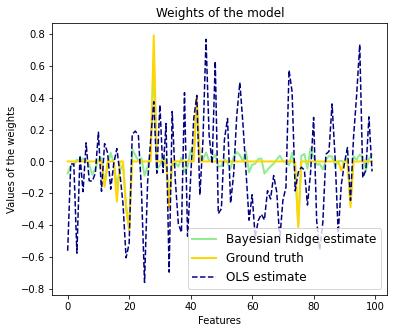

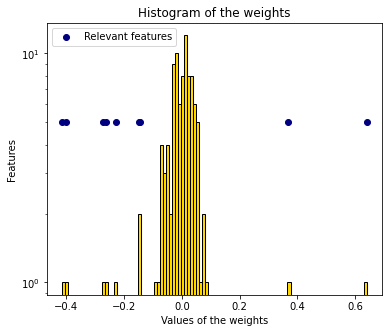

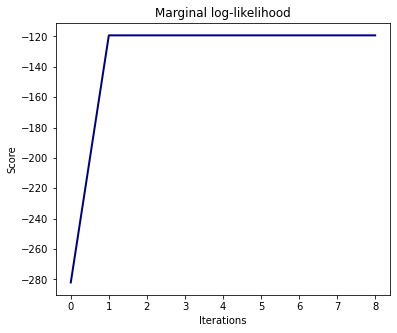

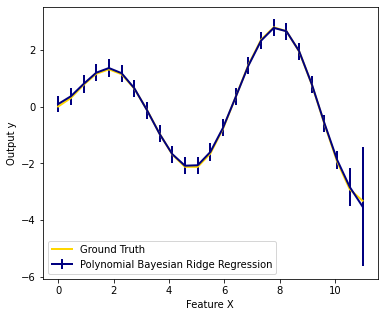

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

# #############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weights with a precision lambda_ of 4.
lambda_ = 4.0
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1.0 / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.0
noise = stats.norm.rvs(loc=0, scale=1.0 / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color="lightgreen", linewidth=lw, label="Bayesian Ridge estimate")
plt.plot(w, color="gold", linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color="navy", linestyle="--", label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color="gold", log=True, edgecolor="black")
plt.scatter(
    clf.coef_[relevant_features],
    np.full(len(relevant_features), 5.0),
    color="navy",
    label="Relevant features",
)
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color="navy", linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(
    X_plot,
    y_mean,
    y_std,
    color="navy",
    label="Polynomial Bayesian Ridge Regression",
    linewidth=lw,
)
plt.plot(X_plot, y_plot, color="gold", linewidth=lw, label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

**Total running time of the script:** ( 0 minutes 0.706 seconds)

#Curve Fitting with Bayesian Ridge Regression

Computes a Bayesian Ridge Regression of Sinusoids.

See [Bayesian Ridge Regression](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-ridge-regression) for more information on the regressor.

In general, when fitting a curve with a polynomial by Bayesian ridge regression, the selection of initial values of the regularization parameters (alpha, lambda) may be important. This is because the regularization parameters are determined by an iterative procedure that depends on initial values.

In this example, the sinusoid is approximated by a polynomial using different pairs of initial values.

When starting from the default values (alpha_init = 1.90, lambda_init = 1.), the bias of the resulting curve is large, and the variance is small. So, lambda_init should be relatively small (1.e-3) so as to reduce the bias.

Also, by evaluating log marginal likelihood (L) of these models, we can determine which one is better. It can be concluded that the model with larger L is more likely.

https://scikit-learn.org/stable/_images/sphx_glr_plot_bayesian_ridge_curvefit_001.png https://scikit-learn.org/stable/_images/sphx_glr_plot_bayesian_ridge_curvefit_001.png



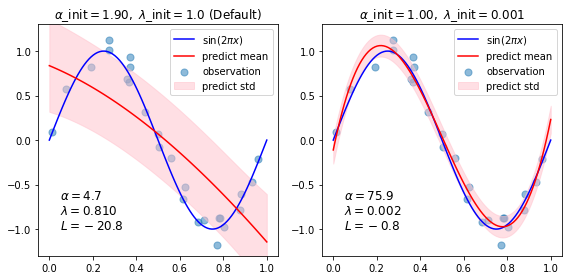

In [95]:
# Author: Yoshihiro Uchida <nimbus1after2a1sun7shower@gmail.com>

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import BayesianRidge


def func(x):
    return np.sin(2 * np.pi * x)


# #############################################################################
# Generate sinusoidal data with noise
size = 25
rng = np.random.RandomState(1234)
x_train = rng.uniform(0.0, 1.0, size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0.0, 1.0, 100)


# #############################################################################
# Fit by cubic polynomial
n_order = 3
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)

# #############################################################################
# Plot the true and predicted curves with log marginal likelihood (L)
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.0]  # Default values
    elif i == 1:
        init = [1.0, 1e-3]
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)

    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(
        x_test, ymean - ystd, ymean + ystd, color="pink", alpha=0.5, label="predict std"
    )
    ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
        reg.alpha_, reg.lambda_, reg.scores_[-1]
    )
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()

**Total running time of the script:** ( 0 minutes 0.313 seconds)

#**1.10.2. Automatic Relevance Determination - ARD**

[ARDRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html#sklearn.linear_model.ARDRegression) is very similar to [Bayesian Ridge Regression](https://scikit-learn.org/stable/modules/linear_model.html#id10), but can lead to sparser coefficients 𝑤 [[1](https://scikit-learn.org/stable/modules/linear_model.html#id15)] [[2](https://scikit-learn.org/stable/modules/linear_model.html#id16)]. [ARDRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html#sklearn.linear_model.ARDRegression) poses a different prior over 𝑤, by dropping the assumption of the Gaussian being spherical.

Instead, the distribution over 𝑤 is assumed to be an axis-parallel, elliptical Gaussian distribution.

This means each coefficient w_{i} is drawn from a Gaussian distribution, centered on zero and with a precision \lambda_{i}:

p(w|\lambda) = \mathcal{N}(w|0,A^{-1})

with 
\text{diag}(A) = \lambda = \{\lambda_{1},...,\lambda_{p}\}.

In contrast to [Bayesian Ridge Regression](https://scikit-learn.org/stable/modules/linear_model.html#id10), each coordinate of \w_{i} has its own standard deviation \lambda_i. The prior over all \lambda_i is chosen to be the same gamma distribution given by hyperparameters \lambda_1 and \lambda_2.

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ard.html

ARD is also known in the literature as *Sparse Bayesian Learning and Relevance Vector Machine* [[3](https://scikit-learn.org/stable/modules/linear_model.html#id17)] [[4](https://scikit-learn.org/stable/modules/linear_model.html#id19)].

**Examples:**

*  [Automatic Relevance Determination Regression (ARD)](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ard.html#sphx-glr-auto-examples-linear-model-plot-ard-py)

**References:**

[[1](https://scikit-learn.org/stable/modules/linear_model.html#id11)] Christopher M. Bishop: Pattern Recognition and Machine Learning, Chapter 7.2.1

[[2](https://scikit-learn.org/stable/modules/linear_model.html#id12)] David Wipf and Srikantan Nagarajan: [A new view of automatic relevance determination](https://papers.nips.cc/paper/3372-a-new-view-of-automatic-relevance-determination.pdf)

[[3](https://scikit-learn.org/stable/modules/linear_model.html#id13)] Michael E. Tipping: [Sparse Bayesian Learning and the Relevance Vector Machine](http://www.jmlr.org/papers/volume1/tipping01a/tipping01a.pdf)

[[4](https://scikit-learn.org/stable/modules/linear_model.html#id14)] Tristan Fletcher: [Relevance Vector Machines explained](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.651.8603&rep=rep1&type=pdf)

#Automatic Relevance Determination Regression (ARD)

Fit regression model with Bayesian Ridge Regression.

See [Bayesian Ridge Regression](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-ridge-regression) for more information on the regressor.

Compared to the OLS (ordinary least squares) estimator, the coefficient weights are slightly shifted toward zeros, which stabilises them.

The histogram of the estimated weights is very peaked, as a sparsity-inducing prior is implied on the weights.

The estimation of the model is done by iteratively maximizing the marginal log-likelihood of the observations.

We also plot predictions and uncertainties for ARD for one dimensional regression using polynomial feature expansion. Note the uncertainty starts going up on the right side of the plot. This is because these test samples are outside of the range of the training samples.

https://scikit-learn.org/stable/_images/sphx_glr_plot_ard_001.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_ard_002.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_ard_003.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_ard_004.png



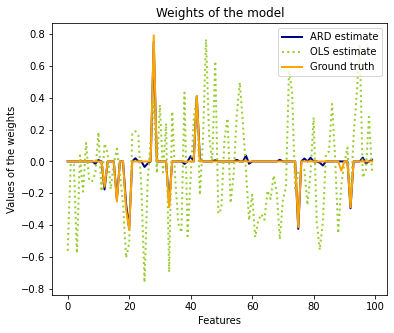

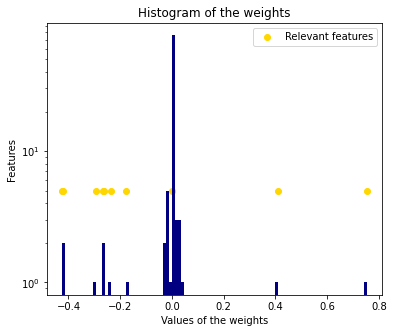

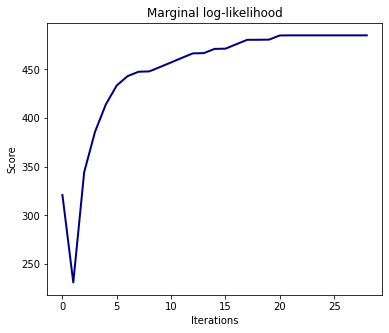

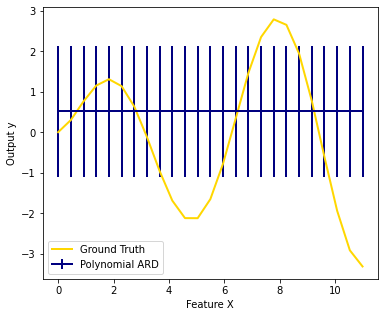

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import ARDRegression, LinearRegression

# #############################################################################
# Generating simulated data with Gaussian weights

# Parameters of the example
np.random.seed(0)
n_samples, n_features = 100, 100
# Create Gaussian data
X = np.random.randn(n_samples, n_features)
# Create weights with a precision lambda_ of 4.
lambda_ = 4.0
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1.0 / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.0
noise = stats.norm.rvs(loc=0, scale=1.0 / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

# #############################################################################
# Fit the ARD Regression
clf = ARDRegression(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

# #############################################################################
# Plot the true weights, the estimated weights, the histogram of the
# weights, and predictions with standard deviations
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color="darkblue", linestyle="-", linewidth=2, label="ARD estimate")
plt.plot(
    ols.coef_, color="yellowgreen", linestyle=":", linewidth=2, label="OLS estimate"
)
plt.plot(w, color="orange", linestyle="-", linewidth=2, label="Ground truth")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc=1)

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color="navy", log=True)
plt.scatter(
    clf.coef_[relevant_features],
    np.full(len(relevant_features), 5.0),
    color="gold",
    marker="o",
    label="Relevant features",
)
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc=1)

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color="navy", linewidth=2)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=1)
clf_poly = ARDRegression(threshold_lambda=1e5)
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color="navy", label="Polynomial ARD", linewidth=2)
plt.plot(X_plot, y_plot, color="gold", linewidth=2, label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

**Total running time of the script:** ( 0 minutes 0.695 seconds)

#**1.11. Logistic Regression**

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a [logistic function](https://en.wikipedia.org/wiki/Logistic_function).

Logistic regression is implemented in [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression). This implementation can fit binary, One-vs-Rest, or multinomial logistic regression with optional \ell_1, \ell_2 or Elastic-Net regularization.

**Note:** Regularization is applied by default, which is common in machine learning but not in statistics. Another advantage of regularization is that it improves numerical stability. No regularization amounts to setting C to a very high value.

As an optimization problem, binary class \ell_2 penalized logistic regression minimizes the following cost function:

\min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) .

Similarly, \ell_1 regularized logistic regression solves the following optimization problem:

\min_{w, c} \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1).

Elastic-Net regularization is a combination of \ell_1 and \ell_2, and minimizes the following cost function:

\min_{w, c} \frac{1 - \rho}{2}w^T w + \rho \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1),

where \rho controls the strength of \ell_1 regularization vs. \ell_2 regularization (it corresponds to the l1_ratio parameter).

Note that, in this notation, it’s assumed that the target y_i takes values in the set {-1, 1} at trial i. We can also see that Elastic-Net is equivalent to \ell_1 when \rho = 1 and equivalent to \ell_2 when \rho = 0.

The solvers implemented in the class [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) are “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”:

The solver “liblinear” uses a coordinate descent (CD) algorithm, and relies on the excellent C++ [LIBLINEAR library](https://www.csie.ntu.edu.tw/~cjlin/liblinear/), which is shipped with scikit-learn. However, the CD algorithm implemented in liblinear cannot learn a true multinomial (multiclass) model; instead, the optimization problem is decomposed in a “one-vs-rest” fashion so separate binary classifiers are trained for all classes. This happens under the hood, so [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) instances using this solver behave as multiclass classifiers. For \ell_1 regularization [sklearn.svm.l1_min_c](https://scikit-learn.org/stable/modules/generated/sklearn.svm.l1_min_c.html#sklearn.svm.l1_min_c) allows to calculate the lower bound for C in order to get a non “null” (all feature weights to zero) model.

The “lbfgs”, “sag” and “newton-cg” solvers only support \ell_2 regularization or no regularization, and are found to converge faster for some high-dimensional data. Setting multi_class to “multinomial” with these solvers learns a true multinomial logistic regression model [[5](https://scikit-learn.org/stable/modules/linear_model.html#id26)], which means that its probability estimates should be better calibrated than the default “one-vs-rest” setting.

The “sag” solver uses Stochastic Average Gradient descent [[6](https://scikit-learn.org/stable/modules/linear_model.html#id27)]. It is faster than other solvers for large datasets, when both the number of samples and the number of features are large.

The “saga” solver [[7](https://scikit-learn.org/stable/modules/linear_model.html#id28)] is a variant of “sag” that also supports the non-smooth penalty="l1". This is therefore the solver of choice for sparse multinomial logistic regression. It is also the only solver that supports penalty="elasticnet".

The “lbfgs” is an optimization algorithm that approximates the Broyden–Fletcher–Goldfarb–Shanno algorithm [[8](https://scikit-learn.org/stable/modules/linear_model.html#id29)], which belongs to quasi-Newton methods. The “lbfgs” solver is recommended for use for small data-sets but for larger datasets its performance suffers. [[9](https://scikit-learn.org/stable/modules/linear_model.html#id30)]

The following table summarizes the penalties supported by each solver:

See the table at https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

The “lbfgs” solver is used by default for its robustness. For large datasets the “saga” solver is usually faster. For large dataset, you may also consider using [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) with ‘log’ loss, which might be even faster but requires more tuning.

**Examples:**

*  [L1 Penalty and Sparsity in Logistic Regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#sphx-glr-auto-examples-linear-model-plot-logistic-l1-l2-sparsity-py)
*  [Regularization path of L1- Logistic Regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_path.html#sphx-glr-auto-examples-linear-model-plot-logistic-path-py)
*  [Plot multinomial and One-vs-Rest Logistic Regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html#sphx-glr-auto-examples-linear-model-plot-logistic-multinomial-py)
*  [Multiclass sparse logistic regression on 20newgroups](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_20newsgroups.html#sphx-glr-auto-examples-linear-model-plot-sparse-logistic-regression-20newsgroups-py)
*  [MNIST classification using multinomial logistic + L1](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html#sphx-glr-auto-examples-linear-model-plot-sparse-logistic-regression-mnist-py)

**Differences from liblinear:**

There might be a difference in the scores obtained between [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) with solver=liblinear or LinearSVC and the external liblinear library directly, when fit_intercept=False and the fit coef_ (or) the data to be predicted are zeroes. This is because for the sample(s) with decision_function zero, [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) and LinearSVC predict the negative class, while liblinear predicts the positive class. Note that a model with fit_intercept=False and having many samples with decision_function zero, is likely to be a underfit, bad model and you are advised to set fit_intercept=True and increase the intercept_scaling.

**Note: Feature selection with sparse logistic regression**

A logistic regression with \ell_1 penalty yields sparse models, and can thus be used to perform feature selection, as detailed in [L1-based feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#l1-feature-selection).

**Note: P-value estimation**

It is possible to obtain the p-values and confidence intervals for coefficients in cases of regression without penalization. The statsmodels package <https://pypi.org/project/statsmodels/> natively supports this. Within sklearn, one could use bootstrapping instead as well.

[LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV) implements Logistic Regression with built-in cross-validation support, to find the optimal C and l1_ratio parameters according to the scoring attribute. The “newton-cg”, “sag”, “saga” and “lbfgs” solvers are found to be faster for high-dimensional dense data, due to warm-starting (see [Glossary](https://scikit-learn.org/stable/glossary.html#term-warm_start)).



**References:**

[[5](https://scikit-learn.org/stable/modules/linear_model.html#id21)] Christopher M. Bishop: Pattern Recognition and Machine Learning, Chapter 4.3.4

[[6](https://scikit-learn.org/stable/modules/linear_model.html#id22)] Mark Schmidt, Nicolas Le Roux, and Francis Bach: [Minimizing Finite Sums with the Stochastic Average Gradient](https://hal.inria.fr/hal-00860051/document).

[[7](https://scikit-learn.org/stable/modules/linear_model.html#id23)] Aaron Defazio, Francis Bach, Simon Lacoste-Julien: [SAGA: A Fast Incremental Gradient Method With Support for Non-Strongly Convex Composite Objectives](https://arxiv.org/abs/1407.0202).

[[8]()] https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm

[[9]()] [“Performance Evaluation of Lbfgs vs other solvers”](http://www.fuzihao.org/blog/2016/01/16/Comparison-of-Gradient-Descent-Stochastic-Gradient-Descent-and-L-BFGS/)

#L1 Penalty and Sparsity in Logistic Regression

Comparison of the sparsity (percentage of zero coefficients) of solutions when L1, L2 and Elastic-Net penalty are used for different values of C. We can see that large values of C give more freedom to the model. Conversely, smaller values of C constrain the model more. In the L1 penalty case, this leads to sparser solutions. As expected, the Elastic-Net penalty sparsity is between that of L1 and L2.

We classify 8x8 images of digits into two classes: 0-4 against 5-9. The visualization shows coefficients of the models for varying C.

https://scikit-learn.org/stable/_images/sphx_glr_plot_logistic_l1_l2_sparsity_001.png


Out:

C=1.00

Sparsity with L1 penalty:                6.25%

Sparsity with Elastic-Net penalty:       4.69%

Sparsity with L2 penalty:                4.69%

Score with L1 penalty:                   0.90

Score with Elastic-Net penalty:          0.90

Score with L2 penalty:                   0.90

C=0.10

Sparsity with L1 penalty:                29.69%

Sparsity with Elastic-Net penalty:       12.50%

Sparsity with L2 penalty:                4.69%

Score with L1 penalty:                   0.90

Score with Elastic-Net penalty:          0.90

Score with L2 penalty:                   0.90

C=0.01

Sparsity with L1 penalty:                84.38%

Sparsity with Elastic-Net penalty:       68.75%

Sparsity with L2 penalty:                4.69%

Score with L1 penalty:                   0.86

Score with Elastic-Net penalty:          0.88

Score with L2 penalty:                   0.89


C=1.00
Sparsity with L1 penalty:                4.69%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.10
Sparsity with L1 penalty:                31.25%
Sparsity with Elastic-Net penalty:       10.94%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                84.38%
Sparsity with Elastic-Net penalty:       68.75%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.89


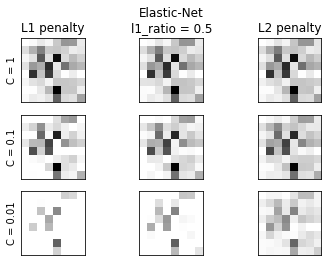

In [97]:
# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

X, y = datasets.load_digits(return_X_y=True)

X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(int)

l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(
        C=C, penalty="elasticnet", solver="saga", l1_ratio=l1_ratio, tol=0.01
    )
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Elastic-Net penalty:", sparsity_en_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))
    print("{:<40} {:.2f}".format("Score with L1 penalty:", clf_l1_LR.score(X, y)))
    print(
        "{:<40} {:.2f}".format("Score with Elastic-Net penalty:", clf_en_LR.score(X, y))
    )
    print("{:<40} {:.2f}".format("Score with L2 penalty:", clf_l2_LR.score(X, y)))

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel("C = %s" % C)

plt.show()

**Total running time of the script:** ( 0 minutes 0.872 seconds)

#Regularization path of L1- Logistic Regression

Train l1-penalized logistic regression models on a binary classification problem derived from the Iris dataset.

The models are ordered from strongest regularized to least regularized. The 4 coefficients of the models are collected and plotted as a “regularization path”: on the left-hand side of the figure (strong regularizers), all the coefficients are exactly 0. When regularization gets progressively looser, coefficients can get non-zero values one after the other.

Here we choose the liblinear solver because it can efficiently optimize for the Logistic Regression loss with a non-smooth, sparsity inducing l1 penalty.

Also note that we set a low value for the tolerance to make sure that the model has converged before collecting the coefficients.

We also use warm_start=True which means that the coefficients of the models are reused to initialize the next model fit to speed-up the computation of the full-path.

https://scikit-learn.org/stable/_images/sphx_glr_plot_logistic_path_001.png



Out:

Computing regularization path ...

This took 0.053s

Computing regularization path ...
This took 0.070s


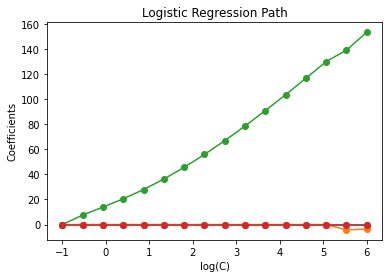

In [98]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2]
y = y[y != 2]

X /= X.max()  # Normalize X to speed-up convergence

# #############################################################################
# Demo path functions

cs = l1_min_c(X, y, loss="log") * np.logspace(0, 7, 16)


print("Computing regularization path ...")
start = time()
clf = linear_model.LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took %0.3fs" % (time() - start))

coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.show()

**Total running time of the script:** ( 0 minutes 0.187 seconds)

#Plot multinomial and One-vs-Rest Logistic Regression

Plot decision surface of multinomial and One-vs-Rest Logistic Regression. The hyperplanes corresponding to the three One-vs-Rest (OVR) classifiers are represented by the dashed lines.

https://scikit-learn.org/stable/_images/sphx_glr_plot_logistic_multinomial_001.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_logistic_multinomial_002.png



Out:

training score : 0.995 (multinomial)

training score : 0.976 (ovr)

training score : 0.995 (multinomial)
training score : 0.976 (ovr)


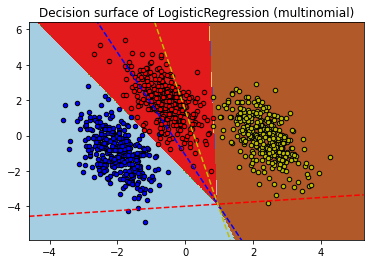

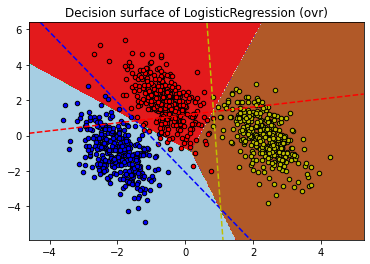

In [99]:
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ("multinomial", "ovr"):
    clf = LogisticRegression(
        solver="sag", max_iter=100, random_state=42, multi_class=multi_class
    ).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis("tight")

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

**Total running time of the script:** ( 0 minutes 0.451 seconds)

#Multiclass sparse logistic regression on 20newgroups

Comparison of multinomial logistic L1 vs one-versus-rest L1 logistic regression to classify documents from the newgroups20 dataset. Multinomial logistic regression yields more accurate results and is faster to train on the larger scale dataset.

Here we use the l1 sparsity that trims the weights of not informative features to zero. This is good if the goal is to extract the strongly discriminative vocabulary of each class. If the goal is to get the best predictive accuracy, it is better to use the non sparsity-inducing l2 penalty instead.

A more traditional (and possibly better) way to predict on a sparse subset of input features would be to use univariate feature selection followed by a traditional (l2-penalised) logistic regression model.

https://scikit-learn.org/stable/_images/sphx_glr_plot_sparse_logistic_regression_20newsgroups_001.png



Out:

Dataset 20newsgroup, train_samples=9000, n_features=130107, n_classes=20

[model=One versus Rest, solver=saga] Number of epochs: 1

[model=One versus Rest, solver=saga] Number of epochs: 2
[model=One versus Rest, solver=saga] Number of epochs: 4

Test accuracy for model ovr: 0.7510

% non-zero coefficients for model ovr, per class:

 [0.34740637 0.37200151 0.42042319 0.46346469 0.24672001 0.42272898

 0.29898468 0.27746393 0.58951478 0.34663777 0.4173488  0.29360449

 0.42349758 0.40658842 0.60411815 0.31819964 0.31589384 0.28207552

 0.36124113 0.26747216]

Run time (4 epochs) for model ovr:4.96

[model=Multinomial, solver=saga] Number of epochs: 1

[model=Multinomial, solver=saga] Number of epochs: 3

[model=Multinomial, solver=saga] Number of epochs: 7

Test accuracy for model multinomial: 0.7450

% non-zero coefficients for model multinomial, per class:

 [0.12912449 0.11528972 0.13066169 0.13450468 0.11990131 0.15756262

 0.13527328 0.09223178 0.07685982 0.12066991 0.14065346 0.10606655

 0.17985197 0.12066991 0.17908337 0.21597608 0.10990954 0.07762841

 0.07301682 0.14295926]

Run time (7 epochs) for model multinomial:3.87

Example run in 17.032 s

Dataset 20newsgroup, train_samples=9000, n_features=130107, n_classes=20
[model=One versus Rest, solver=saga] Number of epochs: 1
[model=One versus Rest, solver=saga] Number of epochs: 2
[model=One versus Rest, solver=saga] Number of epochs: 4
Test accuracy for model ovr: 0.7510
% non-zero coefficients for model ovr, per class:
 [0.34740637 0.37200151 0.42042319 0.46346469 0.24672001 0.42272898
 0.29898468 0.27746393 0.58951478 0.34663777 0.4173488  0.29360449
 0.42349758 0.40658842 0.60411815 0.31819964 0.31589384 0.28207552
 0.36124113 0.26747216]
Run time (4 epochs) for model ovr:4.33
[model=Multinomial, solver=saga] Number of epochs: 1
[model=Multinomial, solver=saga] Number of epochs: 3
[model=Multinomial, solver=saga] Number of epochs: 7
Test accuracy for model multinomial: 0.7450
% non-zero coefficients for model multinomial, per class:
 [0.12912449 0.11528972 0.13066169 0.13450468 0.11990131 0.15756262
 0.13527328 0.09223178 0.07685982 0.12066991 0.14065346 0.10606655
 0.179851

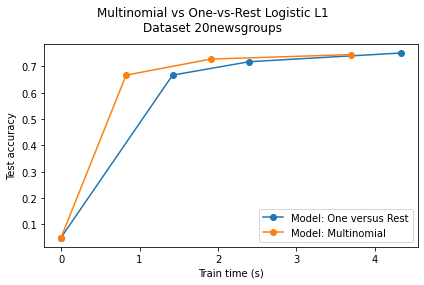

In [100]:
# Author: Arthur Mensch

import timeit
import warnings

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
t0 = timeit.default_timer()

# We use SAGA solver
solver = "saga"

# Turn down for faster run time
n_samples = 10000

X, y = fetch_20newsgroups_vectorized(subset="all", return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y, test_size=0.1
)
train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

print(
    "Dataset 20newsgroup, train_samples=%i, n_features=%i, n_classes=%i"
    % (train_samples, n_features, n_classes)
)

models = {
    "ovr": {"name": "One versus Rest", "iters": [1, 2, 4]},
    "multinomial": {"name": "Multinomial", "iters": [1, 3, 7]},
}

for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]

    # Small number of epochs for fast runtime
    for this_max_iter in model_params["iters"]:
        print(
            "[model=%s, solver=%s] Number of epochs: %s"
            % (model_params["name"], solver, this_max_iter)
        )
        lr = LogisticRegression(
            solver=solver,
            multi_class=model,
            penalty="l1",
            max_iter=this_max_iter,
            random_state=42,
        )
        t1 = timeit.default_timer()
        lr.fit(X_train, y_train)
        train_time = timeit.default_timer() - t1

        y_pred = lr.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
    models[model]["times"] = times
    models[model]["densities"] = densities
    models[model]["accuracies"] = accuracies
    print("Test accuracy for model %s: %.4f" % (model, accuracies[-1]))
    print(
        "%% non-zero coefficients for model %s, per class:\n %s"
        % (model, densities[-1])
    )
    print(
        "Run time (%i epochs) for model %s:%.2f"
        % (model_params["iters"][-1], model, times[-1])
    )

fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]["name"]
    times = models[model]["times"]
    accuracies = models[model]["accuracies"]
    ax.plot(times, accuracies, marker="o", label="Model: %s" % name)
    ax.set_xlabel("Train time (s)")
    ax.set_ylabel("Test accuracy")
ax.legend()
fig.suptitle("Multinomial vs One-vs-Rest Logistic L1\nDataset %s" % "20newsgroups")
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print("Example run in %.3f s" % run_time)
plt.show()

**Total running time of the script:** ( 0 minutes 17.103 seconds)

#MNIST classification using multinomial logistic + L1

Here we fit a multinomial logistic regression with L1 penalty on a subset of the MNIST digits classification task. We use the SAGA algorithm for this purpose: this a solver that is fast when the number of samples is significantly larger than the number of features and is able to finely optimize non-smooth objective functions which is the case with the l1-penalty. Test accuracy reaches > 0.8, while weight vectors remains sparse and therefore more easily interpretable.

Note that this accuracy of this l1-penalized linear model is significantly below what can be reached by an l2-penalized linear model or a non-linear multi-layer perceptron model on this dataset.

https://scikit-learn.org/stable/_images/sphx_glr_plot_sparse_logistic_regression_mnist_001.png



Out:

Sparsity with L1 penalty: 79.95%

Test score with L1 penalty: 0.8322

Example run in 40.231 s

Sparsity with L1 penalty: 78.09%
Test score with L1 penalty: 0.8389
Example run in 36.635 s


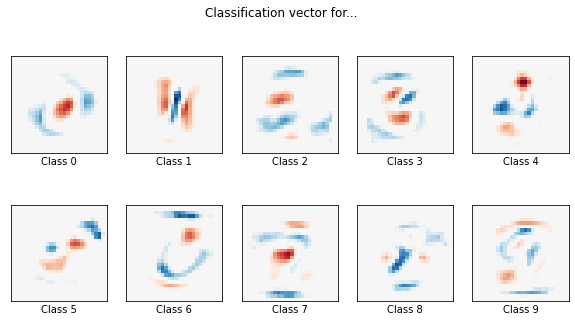

In [101]:
# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

**Total running time of the script:** ( 0 minutes 40.336 seconds)

#**1.12. Generalized Linear Regression**

Generalized Linear Models (GLM) extend linear models in two ways [[10](https://scikit-learn.org/stable/modules/linear_model.html#id34)]. First, the predicted values \hat{y} are linked to a linear combination of the input variables X via an inverse link function h as 

\hat{y}(w, X) = h(Xw).

Secondly, the squared loss function is replaced by the unit deviance d of a distribution in the exponential family (or more precisely, a reproductive exponential dispersion model (EDM) [[11](https://scikit-learn.org/stable/modules/linear_model.html#id35)).

The minimization problem becomes:

\min_{w} \frac{1}{2 n_{\text{samples}}} \sum_i d(y_i, \hat{y}_i) + \frac{\alpha}{2} ||w||_2,

where \alpha is the L2 regularization penalty. When sample weights are provided, the average becomes a weighted average.

The following table lists some specific EDMs and their unit deviance (all of these are instances of the Tweedie family):

See the table at https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-regression

The Probability Density Functions (PDF) of these distributions are illustrated in the following figure,

https://scikit-learn.org/stable/_images/poisson_gamma_tweedie_distributions.png https://scikit-learn.org/stable/_images/poisson_gamma_tweedie_distributions.png https://scikit-learn.org/stable/_images/poisson_gamma_tweedie_distributions.png

PDF of a random variable Y following Poisson, Tweedie (power=1.5) and Gamma distributions with different mean values (\mu). Observe the point mass at Y=0 for the Poisson distribution and the Tweedie (power=1.5) distribution, but not for the Gamma distribution which has a strictly positive target domain.

The choice of the distribution depends on the problem at hand:

*  If the target values y are counts (non-negative integer valued) or relative frequencies (non-negative), you might use a Poisson deviance with log-link.
*  If the target values are positive valued and skewed, you might try a Gamma deviance with log-link.
*  If the target values seem to be heavier tailed than a Gamma distribution, you might try an Inverse Gaussian deviance (or even higher variance powers of the Tweedie family).

Examples of use cases include:

*  Agriculture / weather modeling: number of rain events per year (Poisson), amount of rainfall per event (Gamma), total rainfall per year (Tweedie / Compound Poisson Gamma).
*  Risk modeling / insurance policy pricing: number of claim events / policyholder per year (Poisson), cost per event (Gamma), total cost per policyholder per year (Tweedie / Compound Poisson Gamma).
*  Predictive maintenance: number of production interruption events per year (Poisson), duration of interruption (Gamma), total interruption time per year (Tweedie / Compound Poisson Gamma).

**References:**

[[10](https://scikit-learn.org/stable/modules/linear_model.html#id32)] McCullagh, Peter; Nelder, John (1989). Generalized Linear Models, Second Edition. Boca Raton: Chapman and Hall/CRC. ISBN 0-412-31760-5.

[[11](https://scikit-learn.org/stable/modules/linear_model.html#id33)] Jørgensen, B. (1992). The theory of exponential dispersion models and analysis of deviance. Monografias de matemática, no. 51. See also [Exponential dispersion model](https://en.wikipedia.org/wiki/Exponential_dispersion_model).

#**1.12.1. Usage**

[TweedieRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TweedieRegressor.html#sklearn.linear_model.TweedieRegressor) implements a generalized linear model for the Tweedie distribution, that allows to model any of the above mentioned distributions using the appropriate power parameter. In particular:

*  power = 0: Normal distribution. Specific estimators such as [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) are generally more appropriate in this case.
*  power = 1: Poisson distribution. [PoissonRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html#sklearn.linear_model.PoissonRegressor) is exposed for convenience. However, it is strictly equivalent to TweedieRegressor(power=1, link='log').
*  power = 2: Gamma distribution. [GammaRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.GammaRegressor.html#sklearn.linear_model.GammaRegressor) is exposed for convenience. However, it is strictly equivalent to TweedieRegressor(power=2, link='log').
*  power = 3: Inverse Gaussian distribution.

The link function is determined by the link parameter.

Usage example:

In [102]:
from sklearn.linear_model import TweedieRegressor
reg = TweedieRegressor(power=1, alpha=0.5, link='log')
reg.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2])
#TweedieRegressor(alpha=0.5, link='log', power=1)
reg.coef_
#array([0.2463..., 0.4337...])
reg.intercept_
#-0.7638...

-0.7638091359123445

**Examples:**

*  [Poisson regression and non-normal loss](https://scikit-learn.org/stable/auto_examples/linear_model/plot_poisson_regression_non_normal_loss.html#sphx-glr-auto-examples-linear-model-plot-poisson-regression-non-normal-loss-py)
*  [Tweedie regression on insurance claims](https://scikit-learn.org/stable/auto_examples/linear_model/plot_tweedie_regression_insurance_claims.html#sphx-glr-auto-examples-linear-model-plot-tweedie-regression-insurance-claims-py)

# Poisson regression and non-normal loss

This example illustrates the use of log-linear Poisson regression on the [French Motor Third-Party Liability Claims dataset](https://www.openml.org/d/41214) from [[1](https://scikit-learn.org/stable/auto_examples/linear_model/plot_poisson_regression_non_normal_loss.html#id2)] and compares it with a linear model fitted with the usual least squared error and a non-linear GBRT model fitted with the Poisson loss (and a log-link).

A few definitions:
*  A **policy** is a contract between an insurance company and an individual: the **policyholder**, that is, the vehicle driver in this case.
*  A **claim** is the request made by a policyholder to the insurer to compensate for a loss covered by the insurance.
*  The **exposure** is the duration of the insurance coverage of a given policy, in years.
*  The claim frequency is the number of claims divided by the **exposure**, typically measured in number of claims per year.

In this dataset, each sample corresponds to an insurance policy. Available features include driver age, vehicle age, vehicle power, etc.

Our goal is to predict the expected frequency of claims following car accidents for a new policyholder given the historical data over a population of policyholders.

[[1](https://scikit-learn.org/stable/auto_examples/linear_model/plot_poisson_regression_non_normal_loss.html#id1)]
A. Noll, R. Salzmann and M.V. Wuthrich, Case Study: French Motor Third-Party Liability Claims (November 8, 2018). [doi:10.2139/ssrn.3164764](http://dx.doi.org/10.2139/ssrn.3164764)

In [103]:
# Authors: Christian Lorentzen <lorentzen.ch@gmail.com>
#          Roman Yurchak <rth.yurchak@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

***The French Motor Third-Party Liability Claims dataset***

Let’s load the motor claim dataset from OpenML: https://www.openml.org/d/41214

In [104]:
from sklearn.datasets import fetch_openml


df = fetch_openml(data_id=41214, as_frame=True).frame
df

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10000,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82
1,3.0,1.0,0.77000,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82
2,5.0,1.0,0.75000,B,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22
3,10.0,1.0,0.09000,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72
4,11.0,1.0,0.84000,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72
...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0.0,0.00274,E,4.0,0.0,54.0,50.0,B12,Regular,3317.0,R93
678009,6114327.0,0.0,0.00274,E,4.0,0.0,41.0,95.0,B12,Regular,9850.0,R11
678010,6114328.0,0.0,0.00274,D,6.0,2.0,45.0,50.0,B12,Diesel,1323.0,R82
678011,6114329.0,0.0,0.00274,B,4.0,0.0,60.0,50.0,B12,Regular,95.0,R26


    IDpol	ClaimNb	Exposure	Area	VehPower	VehAge	DrivAge	BonusMalus	VehBrand	VehGas	Density	Region

    0	1.0	1.0	0.10000	D	5.0	0.0	55.0	50.0	B12	Regular	1217.0	R82

    1	3.0	1.0	0.77000	D	5.0	0.0	55.0	50.0	B12	Regular	1217.0	R82

    2	5.0	1.0	0.75000	B	6.0	2.0	52.0	50.0	B12	Diesel	54.0	R22

    3	10.0	1.0	0.09000	B	7.0	0.0	46.0	50.0	B12	Diesel	76.0	R72

    4	11.0	1.0	0.84000	B	7.0	0.0	46.0	50.0	B12	Diesel	76.0	R72

    ...	...	...	...	...	...	...	...	...	...	...	...	...

    678008	6114326.0	0.0	0.00274	E	4.0	0.0	54.0	50.0	B12	Regular	3317.0	R93

    678009	6114327.0	0.0	0.00274	E	4.0	0.0	41.0	95.0	B12	Regular	9850.0	R11
    
    678010	6114328.0	0.0	0.00274	D	6.0	2.0	45.0	50.0	B12	Diesel	1323.0	R82

    678011	6114329.0	0.0	0.00274	B	4.0	0.0	60.0	50.0	B12	Regular	95.0	R26
    
    678012	6114330.0	0.0	0.00274	B	7.0	6.0	29.0	54.0	B12	Diesel	65.0	R72

678013 rows × 12 columns

The number of claims (ClaimNb) is a positive integer that can be modeled as a Poisson distribution. It is then assumed to be the number of discrete events occurring with a constant rate in a given time interval (Exposure, in units of years).

Here we want to model the frequency y = ClaimNb / Exposure conditionally on X via a (scaled) Poisson distribution, and use Exposure as sample_weight.

Average Frequency = 0.10070308464041304
Fraction of exposure with zero claims = 93.9%


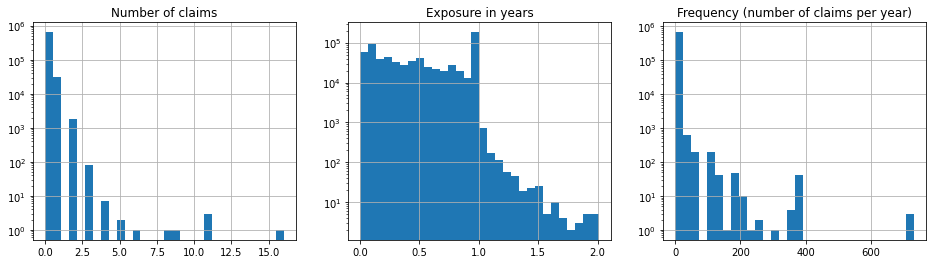

In [105]:
df["Frequency"] = df["ClaimNb"] / df["Exposure"]

print(
    "Average Frequency = {}".format(np.average(df["Frequency"], weights=df["Exposure"]))
)

print(
    "Fraction of exposure with zero claims = {0:.1%}".format(
        df.loc[df["ClaimNb"] == 0, "Exposure"].sum() / df["Exposure"].sum()
    )
)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(16, 4))
ax0.set_title("Number of claims")
_ = df["ClaimNb"].hist(bins=30, log=True, ax=ax0)
ax1.set_title("Exposure in years")
_ = df["Exposure"].hist(bins=30, log=True, ax=ax1)
ax2.set_title("Frequency (number of claims per year)")
_ = df["Frequency"].hist(bins=30, log=True, ax=ax2)

https://scikit-learn.org/stable/_images/sphx_glr_plot_poisson_regression_non_normal_loss_001.png

Out:

Average Frequency = 0.10070308464041304

Fraction of exposure with zero claims = 93.9%

The remaining columns can be used to predict the frequency of claim events. Those columns are very heterogeneous with a mix of categorical and numeric variables with different scales, possibly very unevenly distributed.

In order to fit linear models with those predictors it is therefore necessary to perform standard feature transformations as follows:

In [106]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer


log_scale_transformer = make_pipeline(
    FunctionTransformer(np.log, validate=False), StandardScaler()
)

linear_model_preprocessor = ColumnTransformer(
    [
        ("passthrough_numeric", "passthrough", ["BonusMalus"]),
        ("binned_numeric", KBinsDiscretizer(n_bins=10), ["VehAge", "DrivAge"]),
        ("log_scaled_numeric", log_scale_transformer, ["Density"]),
        (
            "onehot_categorical",
            OneHotEncoder(),
            ["VehBrand", "VehPower", "VehGas", "Region", "Area"],
        ),
    ],
    remainder="drop",
)

***A constant prediction baseline***

It is worth noting that more than 93% of policyholders have zero claims. If we were to convert this problem into a binary classification task, it would be significantly imbalanced, and even a simplistic model that would only predict mean can achieve an accuracy of 93%.

To evaluate the pertinence of the used metrics, we will consider as a baseline a “dummy” estimator that constantly predicts the mean frequency of the training sample.

In [107]:
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.33, random_state=0)

dummy = Pipeline(
    [
        ("preprocessor", linear_model_preprocessor),
        ("regressor", DummyRegressor(strategy="mean")),
    ]
).fit(df_train, df_train["Frequency"], regressor__sample_weight=df_train["Exposure"])

Let’s compute the performance of this constant prediction baseline with 3 different regression metrics:

In [108]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_poisson_deviance


def score_estimator(estimator, df_test):
    """Score an estimator on the test set."""
    y_pred = estimator.predict(df_test)

    print(
        "MSE: %.3f"
        % mean_squared_error(
            df_test["Frequency"], y_pred, sample_weight=df_test["Exposure"]
        )
    )
    print(
        "MAE: %.3f"
        % mean_absolute_error(
            df_test["Frequency"], y_pred, sample_weight=df_test["Exposure"]
        )
    )

    # Ignore non-positive predictions, as they are invalid for
    # the Poisson deviance.
    mask = y_pred > 0
    if (~mask).any():
        n_masked, n_samples = (~mask).sum(), mask.shape[0]
        print(
            "WARNING: Estimator yields invalid, non-positive predictions "
            f" for {n_masked} samples out of {n_samples}. These predictions "
            "are ignored when computing the Poisson deviance."
        )

    print(
        "mean Poisson deviance: %.3f"
        % mean_poisson_deviance(
            df_test["Frequency"][mask],
            y_pred[mask],
            sample_weight=df_test["Exposure"][mask],
        )
    )


print("Constant mean frequency evaluation:")
score_estimator(dummy, df_test)

Constant mean frequency evaluation:
MSE: 0.564
MAE: 0.189
mean Poisson deviance: 0.625


Out:

Constant mean frequency evaluation:

MSE: 0.564

MAE: 0.189

mean Poisson deviance: 0.625



***(Generalized) linear models***

We start by modeling the target variable with the (l2 penalized) least squares linear regression model, more comonly known as Ridge regression. We use a low penalization alpha, as we expect such a linear model to under-fit on such a large dataset.

In [109]:
from sklearn.linear_model import Ridge


ridge_glm = Pipeline(
    [
        ("preprocessor", linear_model_preprocessor),
        ("regressor", Ridge(alpha=1e-6)),
    ]
).fit(df_train, df_train["Frequency"], regressor__sample_weight=df_train["Exposure"])

The Poisson deviance cannot be computed on non-positive values predicted by the model. For models that do return a few non-positive predictions (e.g. [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)) we ignore the corresponding samples, meaning that the obtained Poisson deviance is approximate. An alternative approach could be to use [TransformedTargetRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html#sklearn.compose.TransformedTargetRegressor) meta-estimator to map y_pred to a strictly positive domain.

In [110]:
print("Ridge evaluation:")
score_estimator(ridge_glm, df_test)

Ridge evaluation:
MSE: 0.560
MAE: 0.187
mean Poisson deviance: 0.599


Out:

Ridge evaluation:

MSE: 0.560

MAE: 0.187

WARNING: Estimator yields invalid, non-positive predictions  for 600 samples out of 223745. These predictions are ignored when computing the Poisson deviance.

mean Poisson deviance: 0.599



Next we fit the Poisson regressor on the target variable. We set the regularization strength alpha to approximately 1e-6 over number of samples (i.e. 1e-12) in order to mimic the Ridge regressor whose L2 penalty term scales differently with the number of samples.

Since the Poisson regressor internally models the log of the expected target value instead of the expected value directly (log vs identity link function), the relationship between X and y is not exactly linear anymore. Therefore the Poisson regressor is called a Generalized Linear Model (GLM) rather than a vanilla linear model as is the case for Ridge regression.

In [111]:
from sklearn.linear_model import PoissonRegressor

n_samples = df_train.shape[0]

poisson_glm = Pipeline(
    [
        ("preprocessor", linear_model_preprocessor),
        ("regressor", PoissonRegressor(alpha=1e-12, max_iter=300)),
    ]
)
poisson_glm.fit(
    df_train, df_train["Frequency"], regressor__sample_weight=df_train["Exposure"]
)

print("PoissonRegressor evaluation:")
score_estimator(poisson_glm, df_test)

PoissonRegressor evaluation:
MSE: 0.560
MAE: 0.186
mean Poisson deviance: 0.594


Out:

PoissonRegressor evaluation:

MSE: 0.560

MAE: 0.186

mean Poisson deviance: 0.594



***Gradient Boosting Regression Trees for Poisson regression***

Finally, we will consider a non-linear model, namely Gradient Boosting Regression Trees. Tree-based models do not require the categorical data to be one-hot encoded: instead, we can encode each category label with an arbitrary integer using OrdinalEncoder. With this encoding, the trees will treat the categorical features as ordered features, which might not be always a desired behavior. However this effect is limited for deep enough trees which are able to recover the categorical nature of the features. The main advantage of the [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder) over the [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) is that it will make training faster.

Gradient Boosting also gives the possibility to fit the trees with a Poisson loss (with an implicit log-link function) instead of the default least-squares loss. Here we only fit trees with the Poisson loss to keep this example concise.

In [112]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder


tree_preprocessor = ColumnTransformer(
    [
        (
            "categorical",
            OrdinalEncoder(),
            ["VehBrand", "VehPower", "VehGas", "Region", "Area"],
        ),
        ("numeric", "passthrough", ["VehAge", "DrivAge", "BonusMalus", "Density"]),
    ],
    remainder="drop",
)
poisson_gbrt = Pipeline(
    [
        ("preprocessor", tree_preprocessor),
        (
            "regressor",
            HistGradientBoostingRegressor(loss="poisson", max_leaf_nodes=128),
        ),
    ]
)
poisson_gbrt.fit(
    df_train, df_train["Frequency"], regressor__sample_weight=df_train["Exposure"]
)

print("Poisson Gradient Boosted Trees evaluation:")
score_estimator(poisson_gbrt, df_test)

Poisson Gradient Boosted Trees evaluation:
MSE: 0.560
MAE: 0.183
mean Poisson deviance: 0.574


Out:

Poisson Gradient Boosted Trees evaluation:

MSE: 0.563

MAE: 0.183

mean Poisson deviance: 0.574



Like the Poisson GLM above, the gradient boosted trees model minimizes the Poisson deviance. However, because of a higher predictive power, it reaches lower values of Poisson deviance.

Evaluating models with a single train / test split is prone to random fluctuations. If computing resources allow, it should be verified that cross-validated performance metrics would lead to similar conclusions.

The qualitative difference between these models can also be visualized by comparing the histogram of observed target values with that of predicted values:

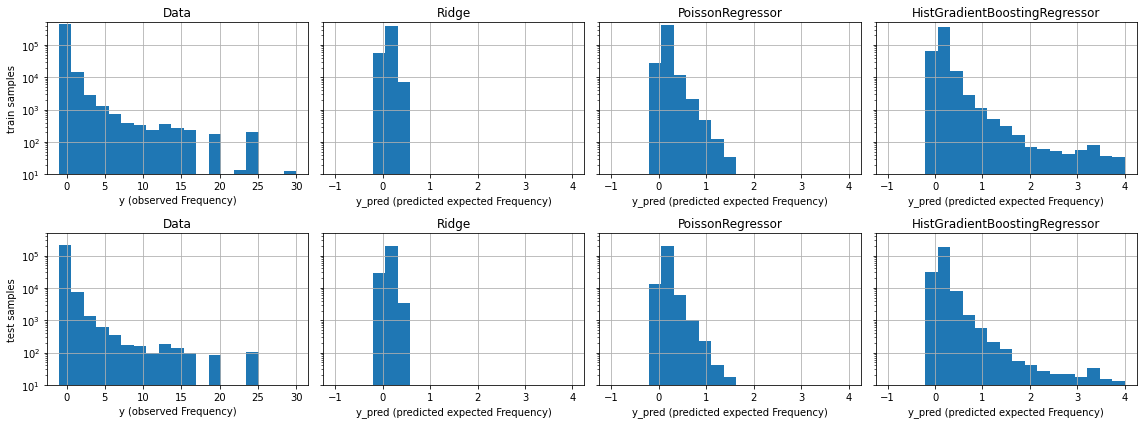

In [113]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 6), sharey=True)
fig.subplots_adjust(bottom=0.2)
n_bins = 20
for row_idx, label, df in zip(range(2), ["train", "test"], [df_train, df_test]):
    df["Frequency"].hist(bins=np.linspace(-1, 30, n_bins), ax=axes[row_idx, 0])

    axes[row_idx, 0].set_title("Data")
    axes[row_idx, 0].set_yscale("log")
    axes[row_idx, 0].set_xlabel("y (observed Frequency)")
    axes[row_idx, 0].set_ylim([1e1, 5e5])
    axes[row_idx, 0].set_ylabel(label + " samples")

    for idx, model in enumerate([ridge_glm, poisson_glm, poisson_gbrt]):
        y_pred = model.predict(df)

        pd.Series(y_pred).hist(
            bins=np.linspace(-1, 4, n_bins), ax=axes[row_idx, idx + 1]
        )
        axes[row_idx, idx + 1].set(
            title=model[-1].__class__.__name__,
            yscale="log",
            xlabel="y_pred (predicted expected Frequency)",
        )
plt.tight_layout()

https://scikit-learn.org/stable/_images/sphx_glr_plot_poisson_regression_non_normal_loss_002.png

The experimental data presents a long tail distribution for y. In all models, we predict the expected frequency of a random variable, so we will have necessarily fewer extreme values than for the observed realizations of that random variable. This explains that the mode of the histograms of model predictions doesn’t necessarily correspond to the smallest value. Additionally, the normal distribution used in Ridge has a constant variance, while for the Poisson distribution used in PoissonRegressor and HistGradientBoostingRegressor, the variance is proportional to the predicted expected value.

Thus, among the considered estimators, PoissonRegressor and HistGradientBoostingRegressor are a-priori better suited for modeling the long tail distribution of the non-negative data as compared to the Ridge model which makes a wrong assumption on the distribution of the target variable.

The HistGradientBoostingRegressor estimator has the most flexibility and is able to predict higher expected values.

Note that we could have used the least squares loss for the HistGradientBoostingRegressor model. This would wrongly assume a normal distributed response variable as does the Ridge model, and possibly also lead to slightly negative predictions. However the gradient boosted trees would still perform relatively well and in particular better than PoissonRegressor thanks to the flexibility of the trees combined with the large number of training samples.

***Evaluation of the calibration of predictions***

To ensure that estimators yield reasonable predictions for different policyholder types, we can bin test samples according to y_pred returned by each model. Then for each bin, we compare the mean predicted y_pred, with the mean observed target:

Actual number of claims: 11935.0
Predicted number of claims by Ridge(alpha=1e-06): 11940.4
Predicted number of claims by PoissonRegressor(alpha=1e-12, max_iter=300): 11930.8
Predicted number of claims by HistGradientBoostingRegressor(loss='poisson', max_leaf_nodes=128): 12153.1
Predicted number of claims by DummyRegressor(): 11931.2


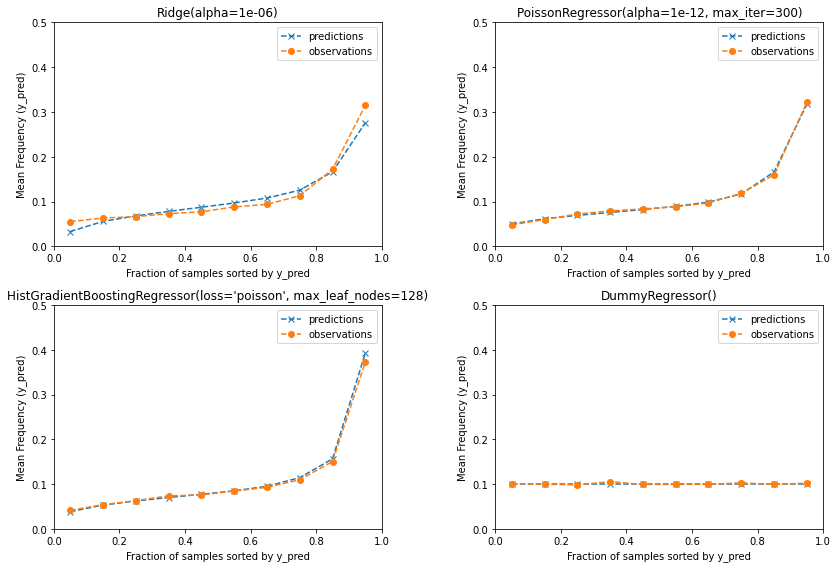

In [114]:
from sklearn.utils import gen_even_slices


def _mean_frequency_by_risk_group(y_true, y_pred, sample_weight=None, n_bins=100):
    """Compare predictions and observations for bins ordered by y_pred.

    We order the samples by ``y_pred`` and split it in bins.
    In each bin the observed mean is compared with the predicted mean.

    Parameters
    ----------
    y_true: array-like of shape (n_samples,)
        Ground truth (correct) target values.
    y_pred: array-like of shape (n_samples,)
        Estimated target values.
    sample_weight : array-like of shape (n_samples,)
        Sample weights.
    n_bins: int
        Number of bins to use.

    Returns
    -------
    bin_centers: ndarray of shape (n_bins,)
        bin centers
    y_true_bin: ndarray of shape (n_bins,)
        average y_pred for each bin
    y_pred_bin: ndarray of shape (n_bins,)
        average y_pred for each bin
    """
    idx_sort = np.argsort(y_pred)
    bin_centers = np.arange(0, 1, 1 / n_bins) + 0.5 / n_bins
    y_pred_bin = np.zeros(n_bins)
    y_true_bin = np.zeros(n_bins)

    for n, sl in enumerate(gen_even_slices(len(y_true), n_bins)):
        weights = sample_weight[idx_sort][sl]
        y_pred_bin[n] = np.average(y_pred[idx_sort][sl], weights=weights)
        y_true_bin[n] = np.average(y_true[idx_sort][sl], weights=weights)
    return bin_centers, y_true_bin, y_pred_bin


print(f"Actual number of claims: {df_test['ClaimNb'].sum()}")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.3)

for axi, model in zip(ax.ravel(), [ridge_glm, poisson_glm, poisson_gbrt, dummy]):
    y_pred = model.predict(df_test)
    y_true = df_test["Frequency"].values
    exposure = df_test["Exposure"].values
    q, y_true_seg, y_pred_seg = _mean_frequency_by_risk_group(
        y_true, y_pred, sample_weight=exposure, n_bins=10
    )

    # Name of the model after the estimator used in the last step of the
    # pipeline.
    print(f"Predicted number of claims by {model[-1]}: {np.sum(y_pred * exposure):.1f}")

    axi.plot(q, y_pred_seg, marker="x", linestyle="--", label="predictions")
    axi.plot(q, y_true_seg, marker="o", linestyle="--", label="observations")
    axi.set_xlim(0, 1.0)
    axi.set_ylim(0, 0.5)
    axi.set(
        title=model[-1],
        xlabel="Fraction of samples sorted by y_pred",
        ylabel="Mean Frequency (y_pred)",
    )
    axi.legend()
plt.tight_layout()

https://scikit-learn.org/stable/_images/sphx_glr_plot_poisson_regression_non_normal_loss_003.png

Out:

Actual number of claims: 11935.0

Predicted number of claims by Ridge(alpha=1e-06): 11940.4

Predicted number of claims by PoissonRegressor(alpha=1e-12, max_iter=300): 11936.4

Predicted number of claims by HistGradientBoostingRegressor(loss='poisson', max_leaf_nodes=128): 12093.7

Predicted number of claims by DummyRegressor(): 11931.2

The dummy regression model predicts a constant frequency. This model does not attribute the same tied rank to all samples but is none-the-less globally well calibrated (to estimate the mean frequency of the entire population).

The Ridge regression model can predict very low expected frequencies that do not match the data. It can therefore severely under-estimate the risk for some policyholders.

PoissonRegressor and HistGradientBoostingRegressor show better consistency between predicted and observed targets, especially for low predicted target values.

The sum of all predictions also confirms the calibration issue of the Ridge model: it under-estimates by more than 3% the total number of claims in the test set while the other three models can approximately recover the total number of claims of the test portfolio.

***Evaluation of the ranking power***

For some business applications, we are interested in the ability of the model to rank the riskiest from the safest policyholders, irrespective of the absolute value of the prediction. In this case, the model evaluation would cast the problem as a ranking problem rather than a regression problem.

To compare the 3 models from this perspective, one can plot the cumulative proportion of claims vs the cumulative proportion of exposure for the test samples order by the model predictions, from safest to riskiest according to each model.

This plot is called a Lorenz curve and can be summarized by the Gini index:

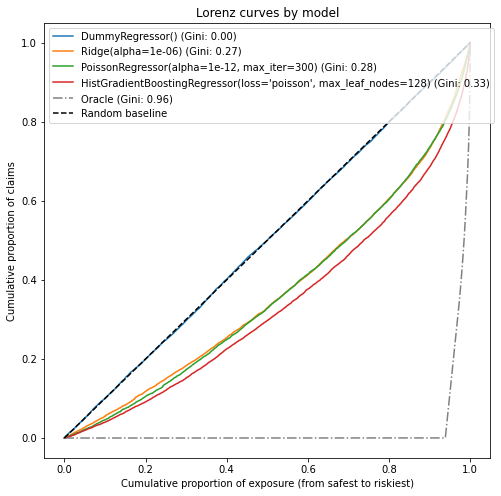

In [115]:
from sklearn.metrics import auc


def lorenz_curve(y_true, y_pred, exposure):
    y_true, y_pred = np.asarray(y_true), np.asarray(y_pred)
    exposure = np.asarray(exposure)

    # order samples by increasing predicted risk:
    ranking = np.argsort(y_pred)
    ranked_frequencies = y_true[ranking]
    ranked_exposure = exposure[ranking]
    cumulated_claims = np.cumsum(ranked_frequencies * ranked_exposure)
    cumulated_claims /= cumulated_claims[-1]
    cumulated_exposure = np.cumsum(ranked_exposure)
    cumulated_exposure /= cumulated_exposure[-1]
    return cumulated_exposure, cumulated_claims


fig, ax = plt.subplots(figsize=(8, 8))

for model in [dummy, ridge_glm, poisson_glm, poisson_gbrt]:
    y_pred = model.predict(df_test)
    cum_exposure, cum_claims = lorenz_curve(
        df_test["Frequency"], y_pred, df_test["Exposure"]
    )
    gini = 1 - 2 * auc(cum_exposure, cum_claims)
    label = "{} (Gini: {:.2f})".format(model[-1], gini)
    ax.plot(cum_exposure, cum_claims, linestyle="-", label=label)

# Oracle model: y_pred == y_test
cum_exposure, cum_claims = lorenz_curve(
    df_test["Frequency"], df_test["Frequency"], df_test["Exposure"]
)
gini = 1 - 2 * auc(cum_exposure, cum_claims)
label = "Oracle (Gini: {:.2f})".format(gini)
ax.plot(cum_exposure, cum_claims, linestyle="-.", color="gray", label=label)

# Random Baseline
ax.plot([0, 1], [0, 1], linestyle="--", color="black", label="Random baseline")
ax.set(
    title="Lorenz curves by model",
    xlabel="Cumulative proportion of exposure (from safest to riskiest)",
    ylabel="Cumulative proportion of claims",
)
ax.legend(loc="upper left")

https://scikit-learn.org/stable/_images/sphx_glr_plot_poisson_regression_non_normal_loss_004.png

Out:

<matplotlib.legend.Legend object at 0x7f26f3280fd0>

As expected, the dummy regressor is unable to correctly rank the samples and therefore performs the worst on this plot.

The tree-based model is significantly better at ranking policyholders by risk while the two linear models perform similarly.

All three models are significantly better than chance but also very far from making perfect predictions.

This last point is expected due to the nature of the problem: the occurrence of accidents is mostly dominated by circumstantial causes that are not captured in the columns of the dataset and can indeed be considered as purely random.

The linear models assume no interactions between the input variables which likely causes under-fitting. Inserting a polynomial feature extractor (PolynomialFeatures) indeed increases their discrimative power by 2 points of Gini index. In particular it improves the ability of the models to identify the top 5% riskiest profiles.

***Main takeaways***

*  The performance of the models can be evaluated by their ability to yield well-calibrated predictions and a good ranking.
*  The calibration of the model can be assessed by plotting the mean observed value vs the mean predicted value on groups of test samples binned by predicted risk.
*  The least squares loss (along with the implicit use of the identity link function) of the Ridge regression model seems to cause this model to be badly calibrated. In particular, it tends to underestimate the risk and can even predict invalid negative frequencies.
*  Using the Poisson loss with a log-link can correct these problems and lead to a well-calibrated linear model.
*  The Gini index reflects the ability of a model to rank predictions irrespective of their absolute values, and therefore only assess their ranking power.
*  Despite the improvement in calibration, the ranking power of both linear models are comparable and well below the ranking power of the Gradient Boosting Regression Trees.

*  The Poisson deviance computed as an evaluation metric reflects both the calibration and the ranking power of the model. It also makes a linear assumption on the ideal relationship between the expected value and the variance of the response variable. For the sake of conciseness we did not check whether this assumption holds.

*  Traditional regression metrics such as Mean Squared Error and Mean Absolute Error are hard to meaningfully interpret on count values with many zeros.





In [116]:
plt.show()

**Total running time of the script:** ( 1 minutes 10.606 seconds)

#Tweedie regression on insurance claims

This example illustrates the use of Poisson, Gamma and Tweedie regression on the [French Motor Third-Party Liability Claims dataset](hhttps://www.openml.org/d/41214), and is inspired by an R tutorial [[1](https://scikit-learn.org/stable/auto_examples/linear_model/plot_tweedie_regression_insurance_claims.html#id2)].

In this dataset, each sample corresponds to an insurance policy, i.e. a contract within an insurance company and an individual (policyholder). Available features include driver age, vehicle age, vehicle power, etc.

A few definitions: a *claim* is the request made by a policyholder to the insurer to compensate for a loss covered by the insurance. The *claim amount* is the amount of money that the insurer must pay. The *exposure* is the duration of the insurance coverage of a given policy, in years.

Here our goal is to predict the expected value, i.e. the mean, of the total claim amount per exposure unit also referred to as the pure premium.

There are several possibilities to do that, two of which are:
1.  Model the number of claims with a Poisson distribution, and the average claim amount per claim, also known as severity, as a Gamma distribution and multiply the predictions of both in order to get the total claim amount.
2.  Model the total claim amount per exposure directly, typically with a Tweedie distribution of Tweedie power p \in (1, 2).

In this example we will illustrate both approaches. We start by defining a few helper functions for loading the data and visualizing results.

[[1](https://scikit-learn.org/stable/auto_examples/linear_model/plot_tweedie_regression_insurance_claims.html#id1)] A. Noll, R. Salzmann and M.V. Wuthrich, Case Study: French Motor Third-Party Liability Claims (November 8, 2018). [doi:10.2139/ssrn.3164764](http://dx.doi.org/10.2139/ssrn.3164764)



In [117]:
# Authors: Christian Lorentzen <lorentzen.ch@gmail.com>
#          Roman Yurchak <rth.yurchak@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
# License: BSD 3 clause

from functools import partial

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import PoissonRegressor, GammaRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_tweedie_deviance
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer

from sklearn.metrics import mean_absolute_error, mean_squared_error, auc


def load_mtpl2(n_samples=100000):
    """Fetch the French Motor Third-Party Liability Claims dataset.

    Parameters
    ----------
    n_samples: int, default=100000
      number of samples to select (for faster run time). Full dataset has
      678013 samples.
    """
    # freMTPL2freq dataset from https://www.openml.org/d/41214
    df_freq = fetch_openml(data_id=41214, as_frame=True)["data"]
    df_freq["IDpol"] = df_freq["IDpol"].astype(int)
    df_freq.set_index("IDpol", inplace=True)

    # freMTPL2sev dataset from https://www.openml.org/d/41215
    df_sev = fetch_openml(data_id=41215, as_frame=True)["data"]

    # sum ClaimAmount over identical IDs
    df_sev = df_sev.groupby("IDpol").sum()

    df = df_freq.join(df_sev, how="left")
    df["ClaimAmount"].fillna(0, inplace=True)

    # unquote string fields
    for column_name in df.columns[df.dtypes.values == object]:
        df[column_name] = df[column_name].str.strip("'")
    return df.iloc[:n_samples]


def plot_obs_pred(
    df,
    feature,
    weight,
    observed,
    predicted,
    y_label=None,
    title=None,
    ax=None,
    fill_legend=False,
):
    """Plot observed and predicted - aggregated per feature level.

    Parameters
    ----------
    df : DataFrame
        input data
    feature: str
        a column name of df for the feature to be plotted
    weight : str
        column name of df with the values of weights or exposure
    observed : str
        a column name of df with the observed target
    predicted : DataFrame
        a dataframe, with the same index as df, with the predicted target
    fill_legend : bool, default=False
        whether to show fill_between legend
    """
    # aggregate observed and predicted variables by feature level
    df_ = df.loc[:, [feature, weight]].copy()
    df_["observed"] = df[observed] * df[weight]
    df_["predicted"] = predicted * df[weight]
    df_ = (
        df_.groupby([feature])[[weight, "observed", "predicted"]]
        .sum()
        .assign(observed=lambda x: x["observed"] / x[weight])
        .assign(predicted=lambda x: x["predicted"] / x[weight])
    )

    ax = df_.loc[:, ["observed", "predicted"]].plot(style=".", ax=ax)
    y_max = df_.loc[:, ["observed", "predicted"]].values.max() * 0.8
    p2 = ax.fill_between(
        df_.index,
        0,
        y_max * df_[weight] / df_[weight].values.max(),
        color="g",
        alpha=0.1,
    )
    if fill_legend:
        ax.legend([p2], ["{} distribution".format(feature)])
    ax.set(
        ylabel=y_label if y_label is not None else None,
        title=title if title is not None else "Train: Observed vs Predicted",
    )


def score_estimator(
    estimator,
    X_train,
    X_test,
    df_train,
    df_test,
    target,
    weights,
    tweedie_powers=None,
):
    """Evaluate an estimator on train and test sets with different metrics"""

    metrics = [
        ("D² explained", None),  # Use default scorer if it exists
        ("mean abs. error", mean_absolute_error),
        ("mean squared error", mean_squared_error),
    ]
    if tweedie_powers:
        metrics += [
            (
                "mean Tweedie dev p={:.4f}".format(power),
                partial(mean_tweedie_deviance, power=power),
            )
            for power in tweedie_powers
        ]

    res = []
    for subset_label, X, df in [
        ("train", X_train, df_train),
        ("test", X_test, df_test),
    ]:
        y, _weights = df[target], df[weights]
        for score_label, metric in metrics:
            if isinstance(estimator, tuple) and len(estimator) == 2:
                # Score the model consisting of the product of frequency and
                # severity models.
                est_freq, est_sev = estimator
                y_pred = est_freq.predict(X) * est_sev.predict(X)
            else:
                y_pred = estimator.predict(X)

            if metric is None:
                if not hasattr(estimator, "score"):
                    continue
                score = estimator.score(X, y, sample_weight=_weights)
            else:
                score = metric(y, y_pred, sample_weight=_weights)

            res.append({"subset": subset_label, "metric": score_label, "score": score})

    res = (
        pd.DataFrame(res)
        .set_index(["metric", "subset"])
        .score.unstack(-1)
        .round(4)
        .loc[:, ["train", "test"]]
    )
    return res

***Loading datasets, basic feature extraction and target definitions***

We construct the freMTPL2 dataset by joining the freMTPL2freq table, containing the number of claims (ClaimNb), with the freMTPL2sev table, containing the claim amount (ClaimAmount) for the same policy ids (IDpol).

In [118]:
df = load_mtpl2(n_samples=60000)

# Note: filter out claims with zero amount, as the severity model
# requires strictly positive target values.
df.loc[(df["ClaimAmount"] == 0) & (df["ClaimNb"] >= 1), "ClaimNb"] = 0

# Correct for unreasonable observations (that might be data error)
# and a few exceptionally large claim amounts
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)
df["ClaimAmount"] = df["ClaimAmount"].clip(upper=200000)

log_scale_transformer = make_pipeline(
    FunctionTransformer(func=np.log), StandardScaler()
)

column_trans = ColumnTransformer(
    [
        ("binned_numeric", KBinsDiscretizer(n_bins=10), ["VehAge", "DrivAge"]),
        (
            "onehot_categorical",
            OneHotEncoder(),
            ["VehBrand", "VehPower", "VehGas", "Region", "Area"],
        ),
        ("passthrough_numeric", "passthrough", ["BonusMalus"]),
        ("log_scaled_numeric", log_scale_transformer, ["Density"]),
    ],
    remainder="drop",
)
X = column_trans.fit_transform(df)

# Insurances companies are interested in modeling the Pure Premium, that is
# the expected total claim amount per unit of exposure for each policyholder
# in their portfolio:
df["PurePremium"] = df["ClaimAmount"] / df["Exposure"]

# This can be indirectly approximated by a 2-step modeling: the product of the
# Frequency times the average claim amount per claim:
df["Frequency"] = df["ClaimNb"] / df["Exposure"]
df["AvgClaimAmount"] = df["ClaimAmount"] / np.fmax(df["ClaimNb"], 1)

with pd.option_context("display.max_columns", 15):
    print(df[df.ClaimAmount > 0].head())

       ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus VehBrand  \
IDpol                                                                           
139        1.0      0.75    F       7.0     1.0     61.0        50.0      B12   
190        1.0      0.14    B      12.0     5.0     50.0        60.0      B12   
414        1.0      0.14    E       4.0     0.0     36.0        85.0      B12   
424        2.0      0.62    F      10.0     0.0     51.0       100.0      B12   
463        1.0      0.31    A       5.0     0.0     45.0        50.0      B12   

        VehGas  Density Region  ClaimAmount   PurePremium  Frequency  \
IDpol                                                                  
139    Regular  27000.0    R11       303.00    404.000000   1.333333   
190     Diesel     56.0    R25      1981.84  14156.000000   7.142857   
414    Regular   4792.0    R11      1456.55  10403.928571   7.142857   
424    Regular  27000.0    R11     10834.00  17474.193548   3.225806   


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:239: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj


Out:

/home/circleci/project/sklearn/preprocessing/_discretization.py:236: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(

       ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus VehBrand  \
IDpol

139        1.0      0.75    F       7.0     1.0     61.0        50.0      B12

190        1.0      0.14    B      12.0     5.0     50.0        60.0      B12

414        1.0      0.14    E       4.0     0.0     36.0        85.0      B12

424        2.0      0.62    F      10.0     0.0     51.0       100.0      B12

463        1.0      0.31    A       5.0     0.0     45.0        50.0      B12

        VehGas  Density Region  ClaimAmount   PurePremium  Frequency  \
IDpol

139    Regular  27000.0    R11       303.00    404.000000   1.333333

190     Diesel     56.0    R25      1981.84  14156.000000   7.142857

414    Regular   4792.0    R11      1456.55  10403.928571   7.142857

424    Regular  27000.0    R11     10834.00  17474.193548   3.225806

463    Regular     12.0    R73      3986.67  12860.225806   3.225806

       AvgClaimAmount
IDpol

139            303.00

190           1981.84

414           1456.55

424           5417.00

463           3986.67


***Frequency model – Poisson distribution***

The number of claims (ClaimNb) is a positive integer (0 included). Thus, this target can be modelled by a Poisson distribution. It is then assumed to be the number of discrete events occurring with a constant rate in a given time interval (Exposure, in units of years). Here we model the frequency y = ClaimNb / Exposure, which is still a (scaled) Poisson distribution, and use Exposure as sample_weight.

In [119]:
df_train, df_test, X_train, X_test = train_test_split(df, X, random_state=0)

# The parameters of the model are estimated by minimizing the Poisson deviance
# on the training set via a quasi-Newton solver: l-BFGS. Some of the features
# are collinear, we use a weak penalization to avoid numerical issues.
glm_freq = PoissonRegressor(alpha=1e-3, max_iter=400)
glm_freq.fit(X_train, df_train["Frequency"], sample_weight=df_train["Exposure"])

scores = score_estimator(
    glm_freq,
    X_train,
    X_test,
    df_train,
    df_test,
    target="Frequency",
    weights="Exposure",
)
print("Evaluation of PoissonRegressor on target Frequency")
print(scores)

Evaluation of PoissonRegressor on target Frequency
subset               train    test
metric                            
D² explained        0.0591  0.0579
mean abs. error     0.1706  0.1661
mean squared error  0.3041  0.3043


Out:

Evaluation of PoissonRegressor on target Frequency


subset               train    test

metric

D² explained        0.0591  0.0580

mean abs. error     0.1706  0.1661

mean squared error  0.3041  0.3043


We can visually compare observed and predicted values, aggregated by the drivers age (DrivAge), vehicle age (VehAge) and the insurance bonus/malus (BonusMalus).

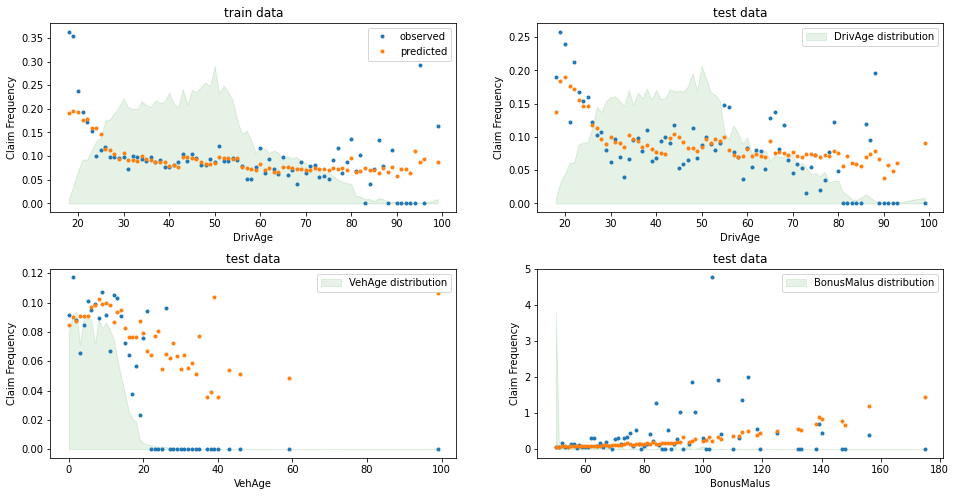

In [120]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

plot_obs_pred(
    df=df_train,
    feature="DrivAge",
    weight="Exposure",
    observed="Frequency",
    predicted=glm_freq.predict(X_train),
    y_label="Claim Frequency",
    title="train data",
    ax=ax[0, 0],
)

plot_obs_pred(
    df=df_test,
    feature="DrivAge",
    weight="Exposure",
    observed="Frequency",
    predicted=glm_freq.predict(X_test),
    y_label="Claim Frequency",
    title="test data",
    ax=ax[0, 1],
    fill_legend=True,
)

plot_obs_pred(
    df=df_test,
    feature="VehAge",
    weight="Exposure",
    observed="Frequency",
    predicted=glm_freq.predict(X_test),
    y_label="Claim Frequency",
    title="test data",
    ax=ax[1, 0],
    fill_legend=True,
)

plot_obs_pred(
    df=df_test,
    feature="BonusMalus",
    weight="Exposure",
    observed="Frequency",
    predicted=glm_freq.predict(X_test),
    y_label="Claim Frequency",
    title="test data",
    ax=ax[1, 1],
    fill_legend=True,
)

https://scikit-learn.org/stable/_images/sphx_glr_plot_tweedie_regression_insurance_claims_001.png

According to the observed data, the frequency of accidents is higher for drivers younger than 30 years old, and is positively correlated with the BonusMalus variable. Our model is able to mostly correctly model this behaviour.

***Severity Model - Gamma distribution***

The mean claim amount or severity (AvgClaimAmount) can be empirically shown to follow approximately a Gamma distribution. We fit a GLM model for the severity with the same features as the frequency model.

Note:
*  We filter out ClaimAmount == 0 as the Gamma distribution has support on (0, \infty), not [0, \infty).
*  We use ClaimNb as sample_weight to account for policies that contain more than one claim.

In [121]:
mask_train = df_train["ClaimAmount"] > 0
mask_test = df_test["ClaimAmount"] > 0

glm_sev = GammaRegressor(alpha=10.0, max_iter=10000)

glm_sev.fit(
    X_train[mask_train.values],
    df_train.loc[mask_train, "AvgClaimAmount"],
    sample_weight=df_train.loc[mask_train, "ClaimNb"],
)

scores = score_estimator(
    glm_sev,
    X_train[mask_train.values],
    X_test[mask_test.values],
    df_train[mask_train],
    df_test[mask_test],
    target="AvgClaimAmount",
    weights="ClaimNb",
)
print("Evaluation of GammaRegressor on target AvgClaimAmount")
print(scores)

Evaluation of GammaRegressor on target AvgClaimAmount
subset                     train          test
metric                                        
D² explained        4.300000e-03 -1.380000e-02
mean abs. error     1.699197e+03  2.027923e+03
mean squared error  4.548147e+07  6.094863e+07


Out:

    Evaluation of GammaRegressor on target AvgClaimAmount

subset                     train          test

metric

D² explained        4.300000e-03 -1.380000e-02

mean abs. error     1.699197e+03  2.027923e+03

mean squared error  4.548147e+07  6.094863e+07



Here, the scores for the test data call for caution as they are significantly worse than for the training data indicating an overfit despite the strong regularization.

Note that the resulting model is the average claim amount per claim. As such, it is conditional on having at least one claim, and cannot be used to predict the average claim amount per policy in general.

In [122]:
print(
    "Mean AvgClaim Amount per policy:              %.2f "
    % df_train["AvgClaimAmount"].mean()
)
print(
    "Mean AvgClaim Amount | NbClaim > 0:           %.2f"
    % df_train["AvgClaimAmount"][df_train["AvgClaimAmount"] > 0].mean()
)
print(
    "Predicted Mean AvgClaim Amount | NbClaim > 0: %.2f"
    % glm_sev.predict(X_train).mean()
)

Mean AvgClaim Amount per policy:              97.89 
Mean AvgClaim Amount | NbClaim > 0:           1899.60
Predicted Mean AvgClaim Amount | NbClaim > 0: 1884.40


Out:

Mean AvgClaim Amount per policy:              97.89

Mean AvgClaim Amount | NbClaim > 0:           1899.60

Predicted Mean AvgClaim Amount | NbClaim > 0: 1884.40



We can visually compare observed and predicted values, aggregated for the drivers age (DrivAge).

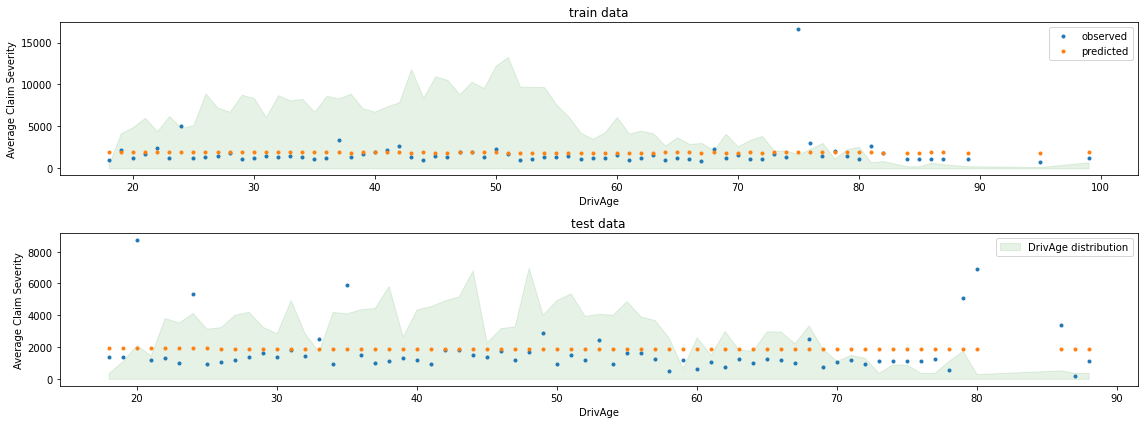

In [123]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(16, 6))

plot_obs_pred(
    df=df_train.loc[mask_train],
    feature="DrivAge",
    weight="Exposure",
    observed="AvgClaimAmount",
    predicted=glm_sev.predict(X_train[mask_train.values]),
    y_label="Average Claim Severity",
    title="train data",
    ax=ax[0],
)

plot_obs_pred(
    df=df_test.loc[mask_test],
    feature="DrivAge",
    weight="Exposure",
    observed="AvgClaimAmount",
    predicted=glm_sev.predict(X_test[mask_test.values]),
    y_label="Average Claim Severity",
    title="test data",
    ax=ax[1],
    fill_legend=True,
)
plt.tight_layout()


https://scikit-learn.org/stable/_images/sphx_glr_plot_tweedie_regression_insurance_claims_002.png

Overall, the drivers age (DrivAge) has a weak impact on the claim severity, both in observed and predicted data.


***Pure Premium Modeling via a Product Model vs single TweedieRegressor***

As mentioned in the introduction, the total claim amount per unit of exposure can be modeled as the product of the prediction of the frequency model by the prediction of the severity model.

Alternatively, one can directly model the total loss with a unique Compound Poisson Gamma generalized linear model (with a log link function). This model is a special case of the Tweedie GLM with a “power” parameter p \in (1, 2). Here, we fix apriori the power parameter of the Tweedie model to some arbitrary value (1.9) in the valid range. Ideally one would select this value via grid-search by minimizing the negative log-likelihood of the Tweedie model, but unfortunately the current implementation does not allow for this (yet).

We will compare the performance of both approaches. To quantify the performance of both models, one can compute the mean deviance of the train and test data assuming a Compound Poisson-Gamma distribution of the total claim amount. This is equivalent to a Tweedie distribution with a power parameter between 1 and 2.

The [sklearn.metrics.mean_tweedie_deviance](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_tweedie_deviance.html#sklearn.metrics.mean_tweedie_deviance) depends on a power parameter. As we do not know the true value of the power parameter, we here compute the mean deviances for a grid of possible values, and compare the models side by side, i.e. we compare them at identical values of power. Ideally, we hope that one model will be consistently better than the other, regardless of power.

In [124]:
glm_pure_premium = TweedieRegressor(power=1.9, alpha=0.1, max_iter=10000)
glm_pure_premium.fit(
    X_train, df_train["PurePremium"], sample_weight=df_train["Exposure"]
)

tweedie_powers = [1.5, 1.7, 1.8, 1.9, 1.99, 1.999, 1.9999]

scores_product_model = score_estimator(
    (glm_freq, glm_sev),
    X_train,
    X_test,
    df_train,
    df_test,
    target="PurePremium",
    weights="Exposure",
    tweedie_powers=tweedie_powers,
)

scores_glm_pure_premium = score_estimator(
    glm_pure_premium,
    X_train,
    X_test,
    df_train,
    df_test,
    target="PurePremium",
    weights="Exposure",
    tweedie_powers=tweedie_powers,
)

scores = pd.concat(
    [scores_product_model, scores_glm_pure_premium],
    axis=1,
    sort=True,
    keys=("Product Model", "TweedieRegressor"),
)
print("Evaluation of the Product Model and the Tweedie Regressor on target PurePremium")
with pd.option_context("display.expand_frame_repr", False):
    print(scores)

Evaluation of the Product Model and the Tweedie Regressor on target PurePremium
                          Product Model               TweedieRegressor              
subset                            train          test            train          test
D² explained                        NaN           NaN     2.550000e-02  2.480000e-02
mean Tweedie dev p=1.5000  8.216990e+01  8.641380e+01     7.960760e+01  8.618720e+01
mean Tweedie dev p=1.7000  3.833380e+01  3.920850e+01     3.737380e+01  3.917470e+01
mean Tweedie dev p=1.8000  3.106690e+01  3.149010e+01     3.047890e+01  3.148130e+01
mean Tweedie dev p=1.9000  3.396110e+01  3.420760e+01     3.360060e+01  3.420830e+01
mean Tweedie dev p=1.9900  1.989234e+02  1.996429e+02     1.986910e+02  1.996461e+02
mean Tweedie dev p=1.9990  1.886428e+03  1.892750e+03     1.886206e+03  1.892753e+03
mean Tweedie dev p=1.9999  1.876452e+04  1.882692e+04     1.876430e+04  1.882692e+04
mean abs. error            3.246628e+02  3.469696e+02     3.202488e+02

Out:

Evaluation of the Product Model and the Tweedie Regressor on target PurePremium

                          Product Model               TweedieRegressor

    subset                            train          test            train          test

metric

D² explained                        NaN           NaN     2.550000e-02  2.480000e-02

mean Tweedie dev p=1.5000  8.217340e+01  8.646200e+01     7.960780e+01  8.618680e+01

mean Tweedie dev p=1.7000  3.833470e+01  3.922390e+01     3.737380e+01  3.917450e+01

mean Tweedie dev p=1.8000  3.106740e+01  3.149880e+01     3.047890e+01  3.148120e+01

mean Tweedie dev p=1.9000  3.396140e+01  3.421260e+01     3.360060e+01  3.420820e+01

mean Tweedie dev p=1.9900  1.989235e+02  1.996459e+02     1.986911e+02  1.996461e+02

mean Tweedie dev p=1.9990  1.886428e+03  1.892752e+03     1.886206e+03  1.892753e+03

mean Tweedie dev p=1.9999  1.876452e+04  1.882692e+04     1.876430e+04  1.882692e+04

mean abs. error            3.246724e+02  3.469663e+02     3.202456e+02  3.397020e+02

mean squared error         1.469185e+08  3.325937e+07     1.469327e+08  3.325470e+07

In this example, both modeling approaches yield comparable performance metrics. For implementation reasons, the percentage of explained variance D^2 is not available for the product model.

We can additionally validate these models by comparing observed and predicted total claim amount over the test and train subsets. We see that, on average, both model tend to underestimate the total claim (but this behavior depends on the amount of regularization).

In [125]:
res = []
for subset_label, X, df in [
    ("train", X_train, df_train),
    ("test", X_test, df_test),
]:
    exposure = df["Exposure"].values
    res.append(
        {
            "subset": subset_label,
            "observed": df["ClaimAmount"].values.sum(),
            "predicted, frequency*severity model": np.sum(
                exposure * glm_freq.predict(X) * glm_sev.predict(X)
            ),
            "predicted, tweedie, power=%.2f"
            % glm_pure_premium.power: np.sum(exposure * glm_pure_premium.predict(X)),
        }
    )

print(pd.DataFrame(res).set_index("subset").T)

subset                                      train          test
observed                             4.577616e+06  1.725665e+06
predicted, frequency*severity model  4.565082e+06  1.495465e+06
predicted, tweedie, power=1.90       4.451652e+06  1.431986e+06


Out:

subset                                      train          test

observed                             4.577616e+06  1.725665e+06

predicted, frequency*severity model  4.565402e+06  1.495568e+06

predicted, tweedie, power=1.90       4.451547e+06  1.431960e+06



Finally, we can compare the two models using a plot of cumulated claims: for each model, the policyholders are ranked from safest to riskiest and the fraction of observed total cumulated claims is plotted on the y axis. This plot is often called the ordered Lorenz curve of the model.

The Gini coefficient (based on the area under the curve) can be used as a model selection metric to quantify the ability of the model to rank policyholders. Note that this metric does not reflect the ability of the models to make accurate predictions in terms of absolute value of total claim amounts but only in terms of relative amounts as a ranking metric.

Both models are able to rank policyholders by risky-ness significantly better than chance although they are also both far from perfect due to the natural difficulty of the prediction problem from few features.

Note that the Gini index only characterize the ranking performance of the model but not its calibration: any monotonic transformation of the predictions leaves the Gini index of the model unchanged.

Finally one should highlight that the Compound Poisson Gamma model that is directly fit on the pure premium is operationally simpler to develop and maintain as it consists in a single scikit-learn estimator instead of a pair of models, each with its own set of hyperparameters.

[]

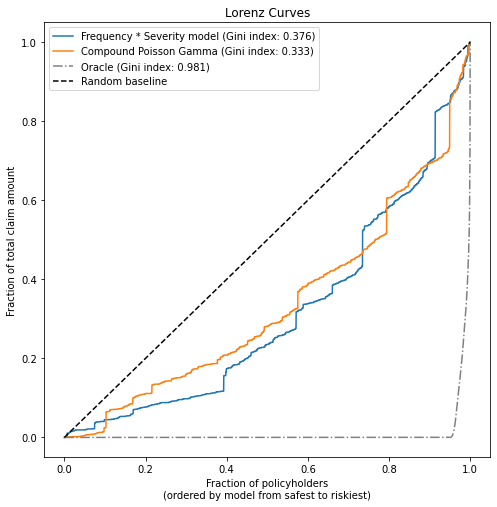

In [126]:
def lorenz_curve(y_true, y_pred, exposure):
    y_true, y_pred = np.asarray(y_true), np.asarray(y_pred)
    exposure = np.asarray(exposure)

    # order samples by increasing predicted risk:
    ranking = np.argsort(y_pred)
    ranked_exposure = exposure[ranking]
    ranked_pure_premium = y_true[ranking]
    cumulated_claim_amount = np.cumsum(ranked_pure_premium * ranked_exposure)
    cumulated_claim_amount /= cumulated_claim_amount[-1]
    cumulated_samples = np.linspace(0, 1, len(cumulated_claim_amount))
    return cumulated_samples, cumulated_claim_amount


fig, ax = plt.subplots(figsize=(8, 8))

y_pred_product = glm_freq.predict(X_test) * glm_sev.predict(X_test)
y_pred_total = glm_pure_premium.predict(X_test)

for label, y_pred in [
    ("Frequency * Severity model", y_pred_product),
    ("Compound Poisson Gamma", y_pred_total),
]:
    ordered_samples, cum_claims = lorenz_curve(
        df_test["PurePremium"], y_pred, df_test["Exposure"]
    )
    gini = 1 - 2 * auc(ordered_samples, cum_claims)
    label += " (Gini index: {:.3f})".format(gini)
    ax.plot(ordered_samples, cum_claims, linestyle="-", label=label)

# Oracle model: y_pred == y_test
ordered_samples, cum_claims = lorenz_curve(
    df_test["PurePremium"], df_test["PurePremium"], df_test["Exposure"]
)
gini = 1 - 2 * auc(ordered_samples, cum_claims)
label = "Oracle (Gini index: {:.3f})".format(gini)
ax.plot(ordered_samples, cum_claims, linestyle="-.", color="gray", label=label)

# Random baseline
ax.plot([0, 1], [0, 1], linestyle="--", color="black", label="Random baseline")
ax.set(
    title="Lorenz Curves",
    xlabel="Fraction of policyholders\n(ordered by model from safest to riskiest)",
    ylabel="Fraction of total claim amount",
)
ax.legend(loc="upper left")
plt.plot()

https://scikit-learn.org/stable/_images/sphx_glr_plot_tweedie_regression_insurance_claims_003.png

Out:

[]

**Total running time of the script:** ( 0 minutes 33.927 seconds)

#**1.12.2. Practical considerations**

The feature matrix X should be standardized before fitting. This ensures that the penalty treats features equally.

Since the linear predictor Xw can be negative and Poisson, Gamma and Inverse Gaussian distributions don’t support negative values, it is necessary to apply an inverse link function that guarantees the non-negativeness. For example with link='log', the inverse link function becomes h(Xw)=\exp(Xw).

If you want to model a relative frequency, i.e. counts per exposure (time, volume, …) you can do so by using a Poisson distribution and passing y=\frac{\mathrm{counts}}{\mathrm{exposure}} as target values together with \mathrm{exposure} as sample weights. For a concrete example see e.g. [Tweedie regression on insurance claims](https://scikit-learn.org/stable/auto_examples/linear_model/plot_tweedie_regression_insurance_claims.html#sphx-glr-auto-examples-linear-model-plot-tweedie-regression-insurance-claims-py).

When performing cross-validation for the power parameter of TweedieRegressor, it is advisable to specify an explicit scoring function, because the default scorer [TweedieRegressor.score](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TweedieRegressor.html#sklearn.linear_model.TweedieRegressor.score) is a function of power itself.

#**1.13. Stochastic Gradient Descent - SGD**

Stochastic gradient descent is a simple yet very efficient approach to fit linear models. It is particularly useful when the number of samples (and the number of features) is very large. The partial_fit method allows online/out-of-core learning.

The classes [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) and [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor) provide functionality to fit linear models for classification and regression using different (convex) loss functions and different penalties. E.g., with loss="log", [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) fits a logistic regression model, while with loss="hinge" it fits a linear support vector machine (SVM).

**References**

*  [Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/sgd.html#sgd)

#**1.14. Perceptron**

The [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron) is another simple classification algorithm suitable for large scale learning. By default:

*  It does not require a learning rate.
*  It is not regularized (penalized).
*  It updates its model only on mistakes.

The last characteristic implies that the Perceptron is slightly faster to train than SGD with the hinge loss and that the resulting models are sparser.

#**1.15. Passive Aggressive Algorithm**

The passive-aggressive algorithms are a family of algorithms for large-scale learning. They are similar to the Perceptron in that they do not require a learning rate. However, contrary to the Perceptron, they include a regularization parameter C.

For classification, [PassiveAggressiveClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html#sklearn.linear_model.PassiveAggressiveClassifier) can be used with loss='hinge' (PA-I) or loss='squared_hinge' (PA-II). For regression, [PassiveAggressiveRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveRegressor.html#sklearn.linear_model.PassiveAggressiveRegressor) can be used with loss='epsilon_insensitive' (PA-I) or loss='squared_epsilon_insensitive' (PA-II).

**References:**

*  [“Online Passive-Aggressive Algorithms”](http://jmlr.csail.mit.edu/papers/volume7/crammer06a/crammer06a.pdf) K. Crammer, O. Dekel, J. Keshat, S. Shalev-Shwartz, Y. Singer - JMLR 7 (2006)

#**1.16. Robustness regression: outliers and modeling errors**

Robust regression aims to fit a regression model in the presence of corrupt data: either outliers, or error in the model.

https://scikit-learn.org/stable/auto_examples/linear_model/plot_theilsen.html

#**1.16.1. Different scenario and useful concepts**

There are different things to keep in mind when dealing with data corrupted by outliers:

*  **Outliers in X or in y?**
   
   **Outliers in the y direction** 
   
   https://scikit-learn.org/stable/_images/sphx_glr_plot_robust_fit_003.png
   
   **Outliers in the X direction**
   
   https://scikit-learn.org/stable/_images/sphx_glr_plot_robust_fit_002.png

*  **Fraction of outliers versus amplitude of error**
   
   The number of outlying points matters, but also how much they are outliers.

   **Small outliers**
   
   https://scikit-learn.org/stable/_images/sphx_glr_plot_robust_fit_003.png
   
   **Large outliers**
   
   https://scikit-learn.org/stable/_images/sphx_glr_plot_robust_fit_005.png

An important notion of robust fitting is that of breakdown point: the fraction of data that can be outlying for the fit to start missing the inlying data.

Note that in general, robust fitting in high-dimensional setting (large n_features) is very hard. The robust models here will probably not work in these settings.


**Trade-offs: which estimator?**

Scikit-learn provides 3 robust regression estimators: [RANSAC](https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression), [Theil Sen](https://scikit-learn.org/stable/modules/linear_model.html#theil-sen-regression) and [HuberRegressor](https://scikit-learn.org/stable/modules/linear_model.html#huber-regression).

*  [HuberRegressor](https://scikit-learn.org/stable/modules/linear_model.html#huber-regression) should be faster than [RANSAC](https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression) and [Theil Sen](https://scikit-learn.org/stable/modules/linear_model.html#theil-sen-regression) unless the number of samples are very large, i.e n_samples >> n_features. This is because [RANSAC](https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression) and [Theil Sen](https://scikit-learn.org/stable/modules/linear_model.html#theil-sen-regression) fit on smaller subsets of the data. However, both [Theil Sen](https://scikit-learn.org/stable/modules/linear_model.html#theil-sen-regression) and [RANSAC](https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression) are unlikely to be as robust as [HuberRegressor](https://scikit-learn.org/stable/modules/linear_model.html#huber-regression) for the default parameters.
*  [RANSAC](https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression) is faster than [Theil Sen](https://scikit-learn.org/stable/modules/linear_model.html#theil-sen-regression) and scales much better with the number of samples.
*  [RANSAC](https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression) will deal better with large outliers in the y direction (most common situation).
*  [Theil Sen](https://scikit-learn.org/stable/modules/linear_model.html#theil-sen-regression) will cope better with medium-size outliers in the X direction, but this property will disappear in high-dimensional settings.

When in doubt, use [RANSAC](https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression).

#**1.16.2. RANSAC: RANdom SAmple Consensus**

RANSAC (RANdom SAmple Consensus) fits a model from random subsets of inliers from the complete data set.

RANSAC is a non-deterministic algorithm producing only a reasonable result with a certain probability, which is dependent on the number of iterations (see max_trials parameter). It is typically used for linear and non-linear regression problems and is especially popular in the field of photogrammetric computer vision.

The algorithm splits the complete input sample data into a set of inliers, which may be subject to noise, and outliers, which are e.g. caused by erroneous measurements or invalid hypotheses about the data. The resulting model is then estimated only from the determined inliers.

https://scikit-learn.org/stable/_images/sphx_glr_plot_ransac_001.png

#**1.16.2.1. Details of the algorithm**

Each iteration performs the following steps: 

1.   Select min_samples random samples from the original data and check whether the set of data is valid (see is_data_valid).
2.   Fit a model to the random subset (base_estimator.fit) and check whether the estimated model is valid (see is_model_valid).
3.   Classify all data as inliers or outliers by calculating the residuals to the estimated model (base_estimator.predict(X) - y) - all data samples with absolute residuals smaller than or equal to the residual_threshold are considered as inliers.
4.   Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

These steps are performed either a maximum number of times (max_trials) or until one of the special stop criteria are met (see stop_n_inliers and stop_score). The final model is estimated using all inlier samples (consensus set) of the previously determined best model.

The is_data_valid and is_model_valid functions allow to identify and reject degenerate combinations of random sub-samples. If the estimated model is not needed for identifying degenerate cases, is_data_valid should be used as it is called prior to fitting the model and thus leading to better computational performance.



**Examples:**

*  [Robust linear model estimation using RANSAC](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html#sphx-glr-auto-examples-linear-model-plot-ransac-py)
*  [Robust linear estimator fitting](https://scikit-learn.org/stable/auto_examples/linear_model/plot_robust_fit.html#sphx-glr-auto-examples-linear-model-plot-robust-fit-py)

**References:**

*  https://en.wikipedia.org/wiki/RANSAC
*  [“Random Sample Consensus: A Paradigm for Model Fitting with Applications to Image Analysis and Automated Cartography”](https://www.sri.com/sites/default/files/publications/ransac-publication.pdf) Martin A. Fischler and Robert C. Bolles - SRI International (1981)
*  [“Performance Evaluation of RANSAC Family”](http://www.bmva.org/bmvc/2009/Papers/Paper355/Paper355.pdf) Sunglok Choi, Taemin Kim and Wonpil Yu - BMVC (2009)

#Robust linear model estimation using RANSAC

In this example we see how to robustly fit a linear model to faulty data using the RANSAC algorithm.

https://scikit-learn.org/stable/_images/sphx_glr_plot_ransac_001.png

Out:

Estimated coefficients (true, linear regression, RANSAC):

82.1903908407869 [54.17236387] [82.08533159]

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


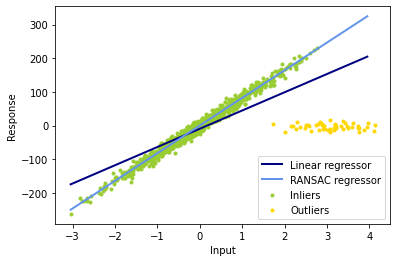

In [127]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

**Total running time of the script:** ( 0 minutes 0.170 seconds)

#Robust linear estimator fitting

Here a sine function is fit with a polynomial of order 3, for values close to zero.

Robust fitting is demoed in different situations:
*  No measurement errors, only modelling errors (fitting a sine with a polynomial)
*  Measurement errors in X
*  Measurement errors in y

The median absolute deviation to non corrupt new data is used to judge the quality of the prediction.

What we can see that:
*  RANSAC is good for strong outliers in the y direction
*  TheilSen is good for small outliers, both in direction X and y, but has a break point above which it performs worse than OLS.
*  The scores of HuberRegressor may not be compared directly to both TheilSen and RANSAC because it does not attempt to completely filter the outliers but lessen their effect.

https://scikit-learn.org/stable/_images/sphx_glr_plot_robust_fit_001.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_robust_fit_002.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_robust_fit_003.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_robust_fit_004.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_robust_fit_005.png

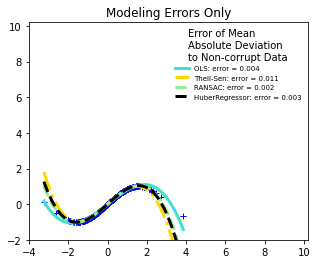

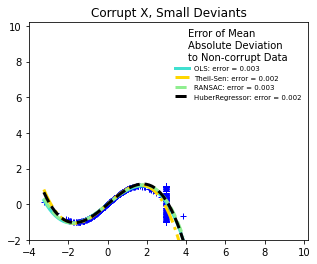

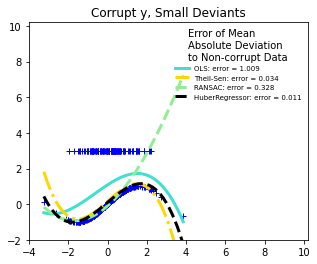

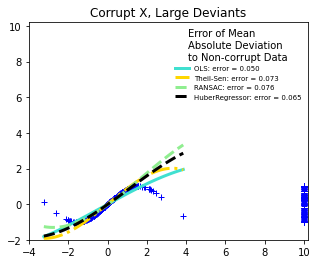

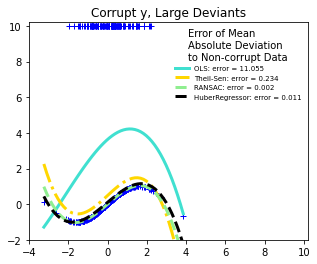

In [128]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import (
    LinearRegression,
    TheilSenRegressor,
    RANSACRegressor,
    HuberRegressor,
)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)

X = np.random.normal(size=400)
y = np.sin(X)
# Make sure that it X is 2D
X = X[:, np.newaxis]

X_test = np.random.normal(size=200)
y_test = np.sin(X_test)
X_test = X_test[:, np.newaxis]

y_errors = y.copy()
y_errors[::3] = 3

X_errors = X.copy()
X_errors[::3] = 3

y_errors_large = y.copy()
y_errors_large[::3] = 10

X_errors_large = X.copy()
X_errors_large[::3] = 10

estimators = [
    ("OLS", LinearRegression()),
    ("Theil-Sen", TheilSenRegressor(random_state=42)),
    ("RANSAC", RANSACRegressor(random_state=42)),
    ("HuberRegressor", HuberRegressor()),
]
colors = {
    "OLS": "turquoise",
    "Theil-Sen": "gold",
    "RANSAC": "lightgreen",
    "HuberRegressor": "black",
}
linestyle = {"OLS": "-", "Theil-Sen": "-.", "RANSAC": "--", "HuberRegressor": "--"}
lw = 3

x_plot = np.linspace(X.min(), X.max())
for title, this_X, this_y in [
    ("Modeling Errors Only", X, y),
    ("Corrupt X, Small Deviants", X_errors, y),
    ("Corrupt y, Small Deviants", X, y_errors),
    ("Corrupt X, Large Deviants", X_errors_large, y),
    ("Corrupt y, Large Deviants", X, y_errors_large),
]:
    plt.figure(figsize=(5, 4))
    plt.plot(this_X[:, 0], this_y, "b+")

    for name, estimator in estimators:
        model = make_pipeline(PolynomialFeatures(3), estimator)
        model.fit(this_X, this_y)
        mse = mean_squared_error(model.predict(X_test), y_test)
        y_plot = model.predict(x_plot[:, np.newaxis])
        plt.plot(
            x_plot,
            y_plot,
            color=colors[name],
            linestyle=linestyle[name],
            linewidth=lw,
            label="%s: error = %.3f" % (name, mse),
        )

    legend_title = "Error of Mean\nAbsolute Deviation\nto Non-corrupt Data"
    legend = plt.legend(
        loc="upper right", frameon=False, title=legend_title, prop=dict(size="x-small")
    )
    plt.xlim(-4, 10.2)
    plt.ylim(-2, 10.2)
    plt.title(title)
plt.show()

**Total running time of the script:** ( 0 minutes 3.294 seconds)

#**1.16.3. Theil-Sen estimator: generalized-median-based estimator**

The [TheilSenRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html#sklearn.linear_model.TheilSenRegressor) estimator uses a generalization of the median in multiple dimensions. It is thus robust to multivariate outliers. Note however that the robustness of the estimator decreases quickly with the dimensionality of the problem. It loses its robustness properties and becomes no better than an ordinary least squares in high dimension.



**Examples:**

*  [Theil-Sen Regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_theilsen.html#sphx-glr-auto-examples-linear-model-plot-theilsen-py)
*  [Robust linear estimator fitting](https://scikit-learn.org/stable/auto_examples/linear_model/plot_robust_fit.html#sphx-glr-auto-examples-linear-model-plot-robust-fit-py)

**References:**

*  https://en.wikipedia.org/wiki/Theil%E2%80%93Sen_estimator

#Theil-Sen Regression

Computes a Theil-Sen Regression on a synthetic dataset.

See [Theil-Sen estimator: generalized-median-based estimator](https://scikit-learn.org/stable/modules/linear_model.html#theil-sen-regression) for more information on the regressor.

Compared to the OLS (ordinary least squares) estimator, the Theil-Sen estimator is robust against outliers. It has a breakdown point of about 29.3% in case of a simple linear regression which means that it can tolerate arbitrary corrupted data (outliers) of up to 29.3% in the two-dimensional case.

The estimation of the model is done by calculating the slopes and intercepts of a subpopulation of all possible combinations of p subsample points. If an intercept is fitted, p must be greater than or equal to n_features + 1. The final slope and intercept is then defined as the spatial median of these slopes and intercepts.

In certain cases Theil-Sen performs better than [RANSAC](https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression) which is also a robust method. This is illustrated in the second example below where outliers with respect to the x-axis perturb RANSAC. Tuning the residual_threshold parameter of RANSAC remedies this but in general a priori knowledge about the data and the nature of the outliers is needed. Due to the computational complexity of Theil-Sen it is recommended to use it only for small problems in terms of number of samples and features. For larger problems the max_subpopulation parameter restricts the magnitude of all possible combinations of p subsample points to a randomly chosen subset and therefore also limits the runtime. Therefore, Theil-Sen is applicable to larger problems with the drawback of losing some of its mathematical properties since it then works on a random subset.

https://scikit-learn.org/stable/_images/sphx_glr_plot_theilsen_001.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_theilsen_002.png



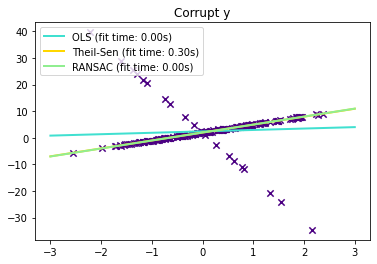

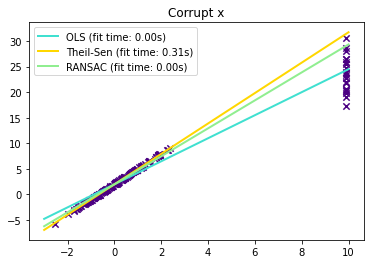

In [129]:
# Author: Florian Wilhelm -- <florian.wilhelm@gmail.com>
# License: BSD 3 clause

import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.linear_model import RANSACRegressor

estimators = [
    ("OLS", LinearRegression()),
    ("Theil-Sen", TheilSenRegressor(random_state=42)),
    ("RANSAC", RANSACRegressor(random_state=42)),
]
colors = {"OLS": "turquoise", "Theil-Sen": "gold", "RANSAC": "lightgreen"}
lw = 2

# #############################################################################
# Outliers only in the y direction

np.random.seed(0)
n_samples = 200
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
w = 3.0
c = 2.0
noise = 0.1 * np.random.randn(n_samples)
y = w * x + c + noise
# 10% outliers
y[-20:] += -20 * x[-20:]
X = x[:, np.newaxis]

plt.scatter(x, y, color="indigo", marker="x", s=40)
line_x = np.array([-3, 3])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(
        line_x,
        y_pred,
        color=colors[name],
        linewidth=lw,
        label="%s (fit time: %.2fs)" % (name, elapsed_time),
    )

plt.axis("tight")
plt.legend(loc="upper left")
plt.title("Corrupt y")

# #############################################################################
# Outliers in the X direction

np.random.seed(0)
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
noise = 0.1 * np.random.randn(n_samples)
y = 3 * x + 2 + noise
# 10% outliers
x[-20:] = 9.9
y[-20:] += 22
X = x[:, np.newaxis]

plt.figure()
plt.scatter(x, y, color="indigo", marker="x", s=40)

line_x = np.array([-3, 10])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(
        line_x,
        y_pred,
        color=colors[name],
        linewidth=lw,
        label="%s (fit time: %.2fs)" % (name, elapsed_time),
    )

plt.axis("tight")
plt.legend(loc="upper left")
plt.title("Corrupt x")
plt.show()

**Total running time of the script:** ( 0 minutes 1.037 seconds)

# Robust linear estimator fitting

Here a sine function is fit with a polynomial of order 3, for values close to zero.

Robust fitting is demoed in different situations:
*  No measurement errors, only modelling errors (fitting a sine with a polynomial)
*  Measurement errors in X
*  Measurement errors in y

The median absolute deviation to non corrupt new data is used to judge the quality of the prediction.

What we can see that:
*  RANSAC is good for strong outliers in the y direction
*  TheilSen is good for small outliers, both in direction X and y, but has a break point above which it performs worse than OLS.
*  The scores of HuberRegressor may not be compared directly to both TheilSen and RANSAC because it does not attempt to completely filter the outliers but lessen their effect.

https://scikit-learn.org/stable/_images/sphx_glr_plot_robust_fit_001.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_robust_fit_002.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_robust_fit_003.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_robust_fit_004.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_robust_fit_005.png



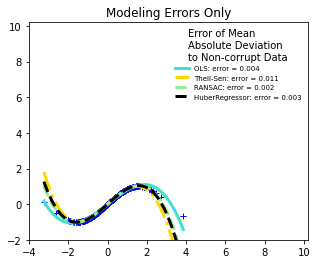

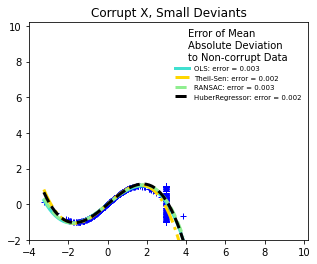

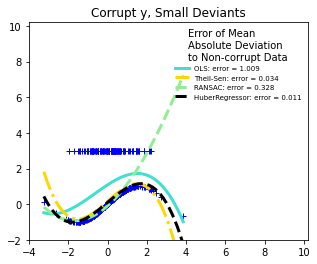

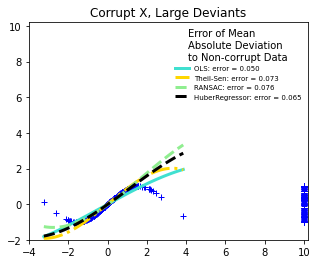

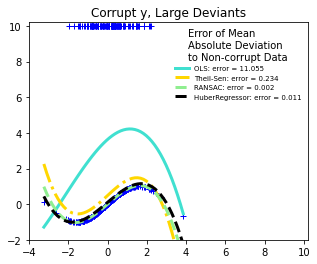

In [130]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import (
    LinearRegression,
    TheilSenRegressor,
    RANSACRegressor,
    HuberRegressor,
)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)

X = np.random.normal(size=400)
y = np.sin(X)
# Make sure that it X is 2D
X = X[:, np.newaxis]

X_test = np.random.normal(size=200)
y_test = np.sin(X_test)
X_test = X_test[:, np.newaxis]

y_errors = y.copy()
y_errors[::3] = 3

X_errors = X.copy()
X_errors[::3] = 3

y_errors_large = y.copy()
y_errors_large[::3] = 10

X_errors_large = X.copy()
X_errors_large[::3] = 10

estimators = [
    ("OLS", LinearRegression()),
    ("Theil-Sen", TheilSenRegressor(random_state=42)),
    ("RANSAC", RANSACRegressor(random_state=42)),
    ("HuberRegressor", HuberRegressor()),
]
colors = {
    "OLS": "turquoise",
    "Theil-Sen": "gold",
    "RANSAC": "lightgreen",
    "HuberRegressor": "black",
}
linestyle = {"OLS": "-", "Theil-Sen": "-.", "RANSAC": "--", "HuberRegressor": "--"}
lw = 3

x_plot = np.linspace(X.min(), X.max())
for title, this_X, this_y in [
    ("Modeling Errors Only", X, y),
    ("Corrupt X, Small Deviants", X_errors, y),
    ("Corrupt y, Small Deviants", X, y_errors),
    ("Corrupt X, Large Deviants", X_errors_large, y),
    ("Corrupt y, Large Deviants", X, y_errors_large),
]:
    plt.figure(figsize=(5, 4))
    plt.plot(this_X[:, 0], this_y, "b+")

    for name, estimator in estimators:
        model = make_pipeline(PolynomialFeatures(3), estimator)
        model.fit(this_X, this_y)
        mse = mean_squared_error(model.predict(X_test), y_test)
        y_plot = model.predict(x_plot[:, np.newaxis])
        plt.plot(
            x_plot,
            y_plot,
            color=colors[name],
            linestyle=linestyle[name],
            linewidth=lw,
            label="%s: error = %.3f" % (name, mse),
        )

    legend_title = "Error of Mean\nAbsolute Deviation\nto Non-corrupt Data"
    legend = plt.legend(
        loc="upper right", frameon=False, title=legend_title, prop=dict(size="x-small")
    )
    plt.xlim(-4, 10.2)
    plt.ylim(-2, 10.2)
    plt.title(title)
plt.show()

**Total running time of the script:** ( 0 minutes 3.294 seconds)

#**1.16.3.1. Theoretical considerations**

[TheilSenRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html#sklearn.linear_model.TheilSenRegressor) is comparable to the [Ordinary Least Squares (OLS)](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) in terms of asymptotic efficiency and as an unbiased estimator. In contrast to OLS, Theil-Sen is a non-parametric method which means it makes no assumption about the underlying distribution of the data. Since Theil-Sen is a median-based estimator, it is more robust against corrupted data aka outliers. In univariate setting, Theil-Sen has a breakdown point of about 29.3% in case of a simple linear regression which means that it can tolerate arbitrary corrupted data of up to 29.3%.

https://scikit-learn.org/stable/_images/sphx_glr_plot_theilsen_001.png

The implementation of [TheilSenRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html#sklearn.linear_model.TheilSenRegressor) in scikit-learn follows a generalization to a multivariate linear regression model [[12](https://scikit-learn.org/stable/modules/linear_model.html#f1)] using the spatial median which is a generalization of the median to multiple dimensions [[13](https://scikit-learn.org/stable/modules/linear_model.html#f2)].

In terms of time and space complexity, Theil-Sen scales according to

\binom{n_{\text{samples}}}{n_{\text{subsamples}}}

which makes it infeasible to be applied exhaustively to problems with a large number of samples and features. Therefore, the magnitude of a subpopulation can be chosen to limit the time and space complexity by considering only a random subset of all possible combinations.

**Examples:**

*  [Theil-Sen Regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_theilsen.html#sphx-glr-auto-examples-linear-model-plot-theilsen-py)

**References:**

[[12](https://scikit-learn.org/stable/modules/linear_model.html#id37)] Xin Dang, Hanxiang Peng, Xueqin Wang and Heping Zhang: [Theil-Sen Estimators in a Multiple Linear Regression Model](http://home.olemiss.edu/~xdang/papers/MTSE.pdf).

[[13](https://scikit-learn.org/stable/modules/linear_model.html#id38)] Kärkkäinen and S. Äyrämö: [On Computation of Spatial Median for Robust Data Mining](http://users.jyu.fi/~samiayr/pdf/ayramo_eurogen05.pdf).

#Theil-Sen Regression

Computes a Theil-Sen Regression on a synthetic dataset.

See [Theil-Sen estimator: generalized-median-based estimator](https://scikit-learn.org/stable/modules/linear_model.html#theil-sen-regression) for more information on the regressor.

Compared to the OLS (ordinary least squares) estimator, the Theil-Sen estimator is robust against outliers. It has a breakdown point of about 29.3% in case of a simple linear regression which means that it can tolerate arbitrary corrupted data (outliers) of up to 29.3% in the two-dimensional case.

The estimation of the model is done by calculating the slopes and intercepts of a subpopulation of all possible combinations of p subsample points. If an intercept is fitted, p must be greater than or equal to n_features + 1. The final slope and intercept is then defined as the spatial median of these slopes and intercepts.

In certain cases Theil-Sen performs better than [RANSAC](https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression) which is also a robust method. This is illustrated in the second example below where outliers with respect to the x-axis perturb RANSAC. Tuning the residual_threshold parameter of RANSAC remedies this but in general a priori knowledge about the data and the nature of the outliers is needed. Due to the computational complexity of Theil-Sen it is recommended to use it only for small problems in terms of number of samples and features. For larger problems the max_subpopulation parameter restricts the magnitude of all possible combinations of p subsample points to a randomly chosen subset and therefore also limits the runtime. Therefore, Theil-Sen is applicable to larger problems with the drawback of losing some of its mathematical properties since it then works on a random subset.

https://scikit-learn.org/stable/_images/sphx_glr_plot_theilsen_001.png

https://scikit-learn.org/stable/_images/sphx_glr_plot_theilsen_002.png



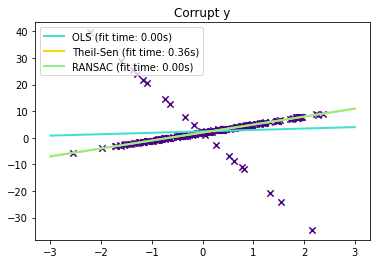

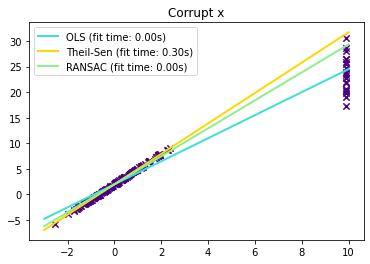

In [131]:
# Author: Florian Wilhelm -- <florian.wilhelm@gmail.com>
# License: BSD 3 clause

import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.linear_model import RANSACRegressor

estimators = [
    ("OLS", LinearRegression()),
    ("Theil-Sen", TheilSenRegressor(random_state=42)),
    ("RANSAC", RANSACRegressor(random_state=42)),
]
colors = {"OLS": "turquoise", "Theil-Sen": "gold", "RANSAC": "lightgreen"}
lw = 2

# #############################################################################
# Outliers only in the y direction

np.random.seed(0)
n_samples = 200
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
w = 3.0
c = 2.0
noise = 0.1 * np.random.randn(n_samples)
y = w * x + c + noise
# 10% outliers
y[-20:] += -20 * x[-20:]
X = x[:, np.newaxis]

plt.scatter(x, y, color="indigo", marker="x", s=40)
line_x = np.array([-3, 3])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(
        line_x,
        y_pred,
        color=colors[name],
        linewidth=lw,
        label="%s (fit time: %.2fs)" % (name, elapsed_time),
    )

plt.axis("tight")
plt.legend(loc="upper left")
plt.title("Corrupt y")

# #############################################################################
# Outliers in the X direction

np.random.seed(0)
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
noise = 0.1 * np.random.randn(n_samples)
y = 3 * x + 2 + noise
# 10% outliers
x[-20:] = 9.9
y[-20:] += 22
X = x[:, np.newaxis]

plt.figure()
plt.scatter(x, y, color="indigo", marker="x", s=40)

line_x = np.array([-3, 10])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(
        line_x,
        y_pred,
        color=colors[name],
        linewidth=lw,
        label="%s (fit time: %.2fs)" % (name, elapsed_time),
    )

plt.axis("tight")
plt.legend(loc="upper left")
plt.title("Corrupt x")
plt.show()

**Total running time of the script:** ( 0 minutes 1.037 seconds)

#**1.16.4. Huber Regression**

The [HuberRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor) is different to [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) because it applies a linear loss to samples that are classified as outliers. A sample is classified as an inlier if the absolute error of that sample is lesser than a certain threshold. It differs from [TheilSenRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html#sklearn.linear_model.TheilSenRegressor) and [RANSACRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor) because it does not ignore the effect of the outliers but gives a lesser weight to them.

https://scikit-learn.org/stable/_images/sphx_glr_plot_huber_vs_ridge_001.png


The loss function that [HuberRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor) minimizes is given by

\min_{w, \sigma} {\sum_{i=1}^n\left(\sigma + H_{\epsilon}\left(\frac{X_{i}w - y_{i}}{\sigma}\right)\sigma\right) + \alpha {||w||_2}^2}
 
where

\begin{split}H_{\epsilon}(z) = \begin{cases}
       z^2, & \text {if } |z| < \epsilon, \\
       2\epsilon|z| - \epsilon^2, & \text{otherwise}
\end{cases}\end{split}
 
It is advised to set the parameter epsilon to 1.35 to achieve 95% statistical efficiency.

#**1.16.5. Notes**

The [HuberRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor) differs from using [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor) with loss set to huber in the following ways.

*  [HuberRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor) is scaling invariant. Once epsilon is set, scaling X and y down or up by different values would produce the same robustness to outliers as before. as compared to [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor) where epsilon has to be set again when X and y are scaled.
*  [HuberRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor) should be more efficient to use on data with small number of samples while [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor) needs a number of passes on the training data to produce the same robustness.

**Examples:**

*  [HuberRegressor vs Ridge on dataset with strong outliers](https://scikit-learn.org/stable/auto_examples/linear_model/plot_huber_vs_ridge.html#sphx-glr-auto-examples-linear-model-plot-huber-vs-ridge-py)

**References:**

*  Peter J. Huber, Elvezio M. Ronchetti: Robust Statistics, Concomitant scale estimates, pg 172

Note that this estimator is different from the R implementation of Robust Regression (http://www.ats.ucla.edu/stat/r/dae/rreg.htm) because the R implementation does a weighted least squares implementation with weights given to each sample on the basis of how much the residual is greater than a certain threshold.

#HuberRegressor vs Ridge on dataset with strong outliers

Fit Ridge and HuberRegressor on a dataset with outliers.

The example shows that the predictions in ridge are strongly influenced by the outliers present in the dataset. The Huber regressor is less influenced by the outliers since the model uses the linear loss for these. As the parameter epsilon is increased for the Huber regressor, the decision function approaches that of the ridge.

https://scikit-learn.org/stable/_images/sphx_glr_plot_huber_vs_ridge_001.png



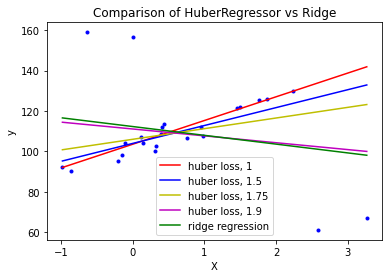

In [132]:
# Authors: Manoj Kumar mks542@nyu.edu
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge

# Generate toy data.
rng = np.random.RandomState(0)
X, y = make_regression(
    n_samples=20, n_features=1, random_state=0, noise=4.0, bias=100.0
)

# Add four strong outliers to the dataset.
X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)
X_outliers[:2, :] += X.max() + X.mean() / 4.0
X_outliers[2:, :] += X.min() - X.mean() / 4.0
y_outliers[:2] += y.min() - y.mean() / 4.0
y_outliers[2:] += y.max() + y.mean() / 4.0
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))
plt.plot(X, y, "b.")

# Fit the huber regressor over a series of epsilon values.
colors = ["r-", "b-", "y-", "m-"]

x = np.linspace(X.min(), X.max(), 7)
epsilon_values = [1, 1.5, 1.75, 1.9]
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(alpha=0.0, epsilon=epsilon)
    huber.fit(X, y)
    coef_ = huber.coef_ * x + huber.intercept_
    plt.plot(x, coef_, colors[k], label="huber loss, %s" % epsilon)

# Fit a ridge regressor to compare it to huber regressor.
ridge = Ridge(alpha=0.0, random_state=0)
ridge.fit(X, y)
coef_ridge = ridge.coef_
coef_ = ridge.coef_ * x + ridge.intercept_
plt.plot(x, coef_, "g-", label="ridge regression")

plt.title("Comparison of HuberRegressor vs Ridge")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc=0)
plt.show()

**Total running time of the script:** ( 0 minutes 0.189 seconds)

#**1.17. Quantile Regression**

Quantile regression estimates the median or other quantiles of y conditional on X, while ordinary least squares (OLS) estimates the conditional mean.

As a linear model, the [QuantileRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html#sklearn.linear_model.QuantileRegressor) gives linear predictions \hat{y}(w, X) = Xw for the q-th quantile, q \in (0, 1). The weights or coefficients  are then found by the following minimization problem:

\min_{w} {\frac{1}{n_{\text{samples}}}
\sum_i PB_q(y_i - X_i w) + \alpha ||w||_1}.

This consists of the pinball loss (also known as linear loss), see also [mean_pinball_loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_pinball_loss.html#sklearn.metrics.mean_pinball_loss),

\begin{split}PB_q(t) = q \max(t, 0) + (1 - q) \max(-t, 0) =
\begin{cases}
    q t, & t > 0, \\
    0,    & t = 0, \\
    (1-q) t, & t < 0
\end{cases}\end{split}

and the L1 penalty controlled by parameter alpha, similar to [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso).

As the pinball loss is only linear in the residuals, quantile regression is much more robust to outliers than squared error based estimation of the mean. Somewhat in between is the [HuberRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor).

Quantile regression may be useful if one is interested in predicting an interval instead of point prediction. Sometimes, prediction intervals are calculated based on the assumption that prediction error is distributed normally with zero mean and constant variance. Quantile regression provides sensible prediction intervals even for errors with non-constant (but predictable) variance or non-normal distribution.

https://scikit-learn.org/stable/_images/sphx_glr_plot_quantile_regression_002.png

Based on minimizing the pinball loss, conditional quantiles can also be estimated by models other than linear models. For example, [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) can predict conditional quantiles if its parameter loss is set to "quantile" and parameter alpha is set to the quantile that should be predicted. See the example in [Prediction Intervals for Gradient Boosting Regression](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_quantile.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-quantile-py).

Most implementations of quantile regression are based on linear programming problem. The current implementation is based on [scipy.optimize.linprog](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog).

**Examples:**

*  [Quantile regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_quantile_regression.html#sphx-glr-auto-examples-linear-model-plot-quantile-regression-py)

**References:**

*  Koenker, R., & Bassett Jr, G. (1978). [Regression quantiles](https://gib.people.uic.edu/RQ.pdf). Econometrica: journal of the Econometric Society, 33-50.
*  Portnoy, S., & Koenker, R. (1997). [The Gaussian hare and the Laplacian tortoise: computability of squared-error versus absolute-error estimators. Statistical Science, 12, 279-300](https://doi.org/10.1214/ss/1030037960).
*  Koenker, R. (2005). [Quantile Regression](https://doi.org/10.1017/CBO9780511754098). Cambridge University Press.

#Quantile regression

This example illustrates how quantile regression can predict non-trivial conditional quantiles.

The left figure shows the case when the error distribution is normal, but has non-constant variance, i.e. with heteroscedasticity.

The right figure shows an example of an asymmetric error distribution, namely the Pareto distribution.

In [133]:
# Authors: David Dale <dale.david@mail.ru>
#          Christian Lorentzen <lorentzen.ch@gmail.com>
#          Guillaume Lemaitre <glemaitre58@gmail.com>
# License: BSD 3 clause

***Dataset generation***

To illustrate the behaviour of quantile regression, we will generate two synthetic datasets. The true generative random processes for both datasets will be composed by the same expected value with a linear relationship with a single feature x.

In [134]:
import numpy as np

rng = np.random.RandomState(42)
x = np.linspace(start=0, stop=10, num=100)
X = x[:, np.newaxis]
y_true_mean = 10 + 0.5 * x

We will create two subsequent problems by changing the distribution of the target y while keeping the same expected value:
*  in the first case, a heteroscedastic Normal noise is added;
*  in the second case, an asymmetric Pareto noise is added.



In [135]:
y_normal = y_true_mean + rng.normal(loc=0, scale=0.5 + 0.5 * x, size=x.shape[0])
a = 5
y_pareto = y_true_mean + 10 * (rng.pareto(a, size=x.shape[0]) - 1 / (a - 1))

Let’s first visualize the datasets as well as the distribution of the residuals y - mean(y).

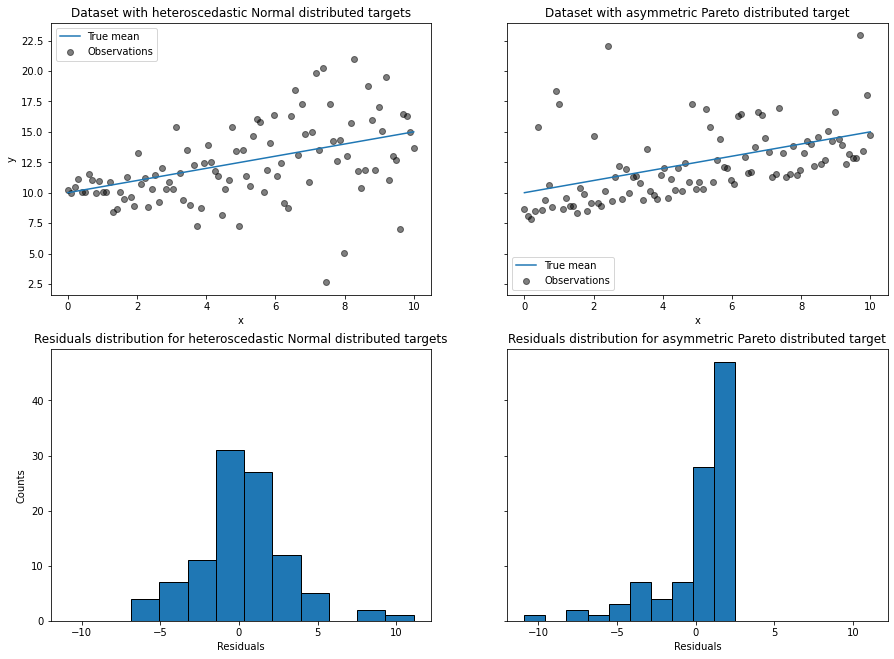

In [136]:
import matplotlib.pyplot as plt

_, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11), sharex="row", sharey="row")

axs[0, 0].plot(x, y_true_mean, label="True mean")
axs[0, 0].scatter(x, y_normal, color="black", alpha=0.5, label="Observations")
axs[1, 0].hist(y_true_mean - y_normal, edgecolor="black")


axs[0, 1].plot(x, y_true_mean, label="True mean")
axs[0, 1].scatter(x, y_pareto, color="black", alpha=0.5, label="Observations")
axs[1, 1].hist(y_true_mean - y_pareto, edgecolor="black")

axs[0, 0].set_title("Dataset with heteroscedastic Normal distributed targets")
axs[0, 1].set_title("Dataset with asymmetric Pareto distributed target")
axs[1, 0].set_title(
    "Residuals distribution for heteroscedastic Normal distributed targets"
)
axs[1, 1].set_title("Residuals distribution for asymmetric Pareto distributed target")
axs[0, 0].legend()
axs[0, 1].legend()
axs[0, 0].set_ylabel("y")
axs[1, 0].set_ylabel("Counts")
axs[0, 1].set_xlabel("x")
axs[0, 0].set_xlabel("x")
axs[1, 0].set_xlabel("Residuals")
_ = axs[1, 1].set_xlabel("Residuals")

https://scikit-learn.org/stable/_images/sphx_glr_plot_quantile_regression_001.png

With the heteroscedastic Normal distributed target, we observe that the variance of the noise is increasing when the value of the feature x is increasing.

With the asymmetric Pareto distributed target, we observe that the positive residuals are bounded.

These types of noisy targets make the estimation via [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) less efficient, i.e. we need more data to get stable results and, in addition, large outliers can have a huge impact on the fitted coefficients. (Stated otherwise: in a setting with constant variance, ordinary least squares estimators converge much faster to the true coefficients with increasing sample size.)

In this asymmetric setting, the median or different quantiles give additional insights. On top of that, median estimation is much more robust to outliers and heavy tailed distributions. But note that extreme quantiles are estimated by very view data points. 95% quantile are more or less estimated by the 5% largest values and thus also a bit sensitive outliers.

In the remainder of this tutorial, we will show how [QuantileRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html#sklearn.linear_model.QuantileRegressor) can be used in practice and give the intuition into the properties of the fitted models. Finally, we will compare the both [QuantileRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html#sklearn.linear_model.QuantileRegressor) and [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

***Fitting a QuantileRegressor***

In this section, we want to estimate the conditional median as well as a low and high quantile fixed at 5% and 95%, respectively. Thus, we will get three linear models, one for each quantile.

We will use the quantiles at 5% and 95% to find the outliers in the training sample beyond the central 90% interval.

In [137]:
from sklearn.linear_model import QuantileRegressor

quantiles = [0.05, 0.5, 0.95]
predictions = {}
out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0)
    y_pred = qr.fit(X, y_normal).predict(X)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_normal
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_normal
        )

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differe

Now, we can plot the three linear models and the distinguished samples that are within the central 90% interval from samples that are outside this interval.

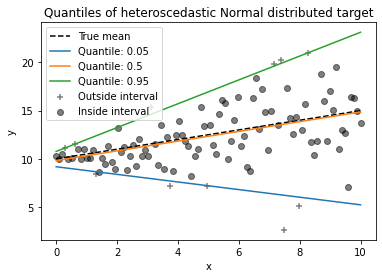

In [138]:
plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="True mean")

for quantile, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f"Quantile: {quantile}")

plt.scatter(
    x[out_bounds_predictions],
    y_normal[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    x[~out_bounds_predictions],
    y_normal[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Quantiles of heteroscedastic Normal distributed target")

https://scikit-learn.org/stable/_images/sphx_glr_plot_quantile_regression_002.png

Since the noise is still Normally distributed, in particular is symmetric, the true conditional mean and the true conditional median coincide. Indeed, we see that the estimated median almost hits the true mean. We observe the effect of having an increasing noise variance on the 5% and 95% quantiles: the slopes of those quantiles are very different and the interval between them becomes wider with increasing x.

To get an additional intuition regarding the meaning of the 5% and 95% quantiles estimators, one can count the number of samples above and below the predicted quantiles (represented by a cross on the above plot), considering that we have a total of 100 samples.

We can repeat the same experiment using the asymmetric Pareto distributed target.

In [139]:
quantiles = [0.05, 0.5, 0.95]
predictions = {}
out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0)
    y_pred = qr.fit(X, y_pareto).predict(X)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_pareto
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_pareto
        )

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differe

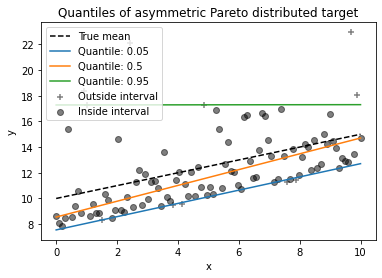

In [140]:
plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="True mean")

for quantile, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f"Quantile: {quantile}")

plt.scatter(
    x[out_bounds_predictions],
    y_pareto[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    x[~out_bounds_predictions],
    y_pareto[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Quantiles of asymmetric Pareto distributed target")

https://scikit-learn.org/stable/_images/sphx_glr_plot_quantile_regression_003.png

Due to the asymmetry of the distribution of the noise, we observe that the true mean and estimated conditional median are different. We also observe that each quantile model has different parameters to better fit the desired quantile. Note that ideally, all quantiles would be parallel in this case, which would become more visible with more data points or less extreme quantiles, e.g. 10% and 90%.

***Comparing QuantileRegressor and LinearRegression***

In this section, we will linger on the difference regarding the error that [QuantileRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html#sklearn.linear_model.QuantileRegressor) and [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) are minimizing.

Indeed, [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) is a least squares approach minimizing the mean squared error (MSE) between the training and predicted targets. In contrast, [QuantileRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html#sklearn.linear_model.QuantileRegressor) with quantile=0.5 minimizes the mean absolute error (MAE) instead.

Let’s first compute the training errors of such models in terms of mean squared error and mean absolute error. We will use the asymmetric Pareto distributed target to make it more interesting as mean and median are not equal.

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression()
quantile_regression = QuantileRegressor(quantile=0.5, alpha=0)

y_pred_lr = linear_regression.fit(X, y_pareto).predict(X)
y_pred_qr = quantile_regression.fit(X, y_pareto).predict(X)

print(
    f"""Training error (in-sample performance)
    {linear_regression.__class__.__name__}:
    MAE = {mean_absolute_error(y_pareto, y_pred_lr):.3f}
    MSE = {mean_squared_error(y_pareto, y_pred_lr):.3f}
    {quantile_regression.__class__.__name__}:
    MAE = {mean_absolute_error(y_pareto, y_pred_qr):.3f}
    MSE = {mean_squared_error(y_pareto, y_pred_qr):.3f}
    """
)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Training error (in-sample performance)
    LinearRegression:
    MAE = 1.805
    MSE = 6.486
    QuantileRegressor:
    MAE = 1.670
    MSE = 7.025
    


Out:

Training error (in-sample performance)

    LinearRegression:
    MAE = 1.805
    MSE = 6.486
    QuantileRegressor:
    MAE = 1.670
    MSE = 7.025

    

On the training set, we see that MAE is lower for [QuantileRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html#sklearn.linear_model.QuantileRegressor) than [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression). In contrast to that, MSE is lower for [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) than [QuantileRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html#sklearn.linear_model.QuantileRegressor). These results confirms that MAE is the loss minimized by QuantileRegressor while MSE is the loss minimized [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

We can make a similar evaluation but looking a the test error obtained by cross-validation.

In [142]:
from sklearn.model_selection import cross_validate

cv_results_lr = cross_validate(
    linear_regression,
    X,
    y_pareto,
    cv=3,
    scoring=["neg_mean_absolute_error", "neg_mean_squared_error"],
)
cv_results_qr = cross_validate(
    quantile_regression,
    X,
    y_pareto,
    cv=3,
    scoring=["neg_mean_absolute_error", "neg_mean_squared_error"],
)
print(
    f"""Test error (cross-validated performance)
    {linear_regression.__class__.__name__}:
    MAE = {-cv_results_lr["test_neg_mean_absolute_error"].mean():.3f}
    MSE = {-cv_results_lr["test_neg_mean_squared_error"].mean():.3f}
    {quantile_regression.__class__.__name__}:
    MAE = {-cv_results_qr["test_neg_mean_absolute_error"].mean():.3f}
    MSE = {-cv_results_qr["test_neg_mean_squared_error"].mean():.3f}
    """
)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Test error (cross-validated performance)
    LinearRegression:
    MAE = 1.732
    MSE = 6.690
    QuantileRegressor:
    MAE = 1.679
    MSE = 7.129
    


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Out:

Test error (cross-validated performance)

    LinearRegression:
    MAE = 1.732
    MSE = 6.690
    QuantileRegressor:
    MAE = 1.679
    MSE = 7.129

We reach similar conclusions on the out-of-sample evaluation.

**Total running time of the script:** ( 0 minutes 1.650 seconds)

#**1.18. Polynomial regression: extending linear models with basis functions**

One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

For example, a simple linear regression can be extended by constructing **polynomial features** from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2

If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2

The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new set of features

z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]

With this re-labeling of the data, our problem can be written

\hat{y}(w, z) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5

We see that the resulting polynomial regression is in the same class of linear models we considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.

Here is an example of applying this idea to one-dimensional data, using polynomial features of varying degrees:

https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_001.png


This figure is created using the [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) transformer, which transforms an input data matrix into a new data matrix of a given degree. It can be used as follows:



In [143]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(6).reshape(3, 2)
X
#array([[0, 1],
#       [2, 3],
#       [4, 5]])
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)
#array([[ 1.,  0.,  1.,  0.,  0.,  1.],
#       [ 1.,  2.,  3.,  4.,  6.,  9.],
#       [ 1.,  4.,  5., 16., 20., 25.]])

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

The features of X have been transformed from [x_1, x_2] to [1, x_1, x_2, x_1^2, x_1 x_2, x_2^2], and can now be used within any linear model.

This sort of preprocessing can be streamlined with the [Pipeline](https://scikit-learn.org/stable/modules/compose.html#pipeline) tools. A single object representing a simple polynomial regression can be created and used as follows:

In [144]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_
#array([ 3., -2.,  1., -1.])

array([ 3., -2.,  1., -1.])

The linear model trained on polynomial features is able to exactly recover the input polynomial coefficients.

In some cases it’s not necessary to include higher powers of any single feature, but only the so-called interaction features that multiply together at most d distinct features. These can be gotten from [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) with the setting interaction_only=True.

For example, when dealing with boolean features, x_i^n = x_i for all  and is therefore useless; but x_i x_j represents the conjunction of two booleans. This way, we can solve the XOR problem with a linear classifier:

In [145]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] ^ X[:, 1]
y
#array([0, 1, 1, 0])
X = PolynomialFeatures(interaction_only=True).fit_transform(X).astype(int)
X
#array([[1, 0, 0, 0],
#       [1, 0, 1, 0],
#       [1, 1, 0, 0],
#       [1, 1, 1, 1]])
clf = Perceptron(fit_intercept=False, max_iter=10, tol=None,
                  shuffle=False).fit(X, y)

And the classifier “predictions” are perfect:

In [146]:
clf.predict(X)
#array([0, 1, 1, 0])
clf.score(X, y)
#1.0

1.0